# 🚀 Análise de Dados de Comissionamento e Logística do iFood
 
    Bem-vindo(a)! Este notebook vai te mostrar, de forma simples e visual, como as taxas e custos impactam a rentabilidade dos restaurantes e do próprio iFood

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

arquivo = "Base de Dados.xlsx"  
xls = pd.ExcelFile(arquivo)

df = xls.parse("DF")

df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], format="%d/%m/%Y")
df["performance_classification"] = df["performance_classification"].replace("CONTA ESTRATEGICA", "KEY ACCOUNT")
df['delivery_cost'] = df['delivery_cost'].fillna(0)
df['occurrences_cost'] = df['occurrences_cost'].fillna(0)
df

,reference_month,frn_id,group_name,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,anticipation_fee,olp_fee,delivery_cost,occurrences_cost
0,2024-10-01,1533443,SEM MARCA,LONG TAIL,MARKETPLACE,207,5639.51,182.00,182.00,564.66,96.03,0,95.70,0.000000,0.000000
1,2024-08-01,2897981,SEM MARCA,LONG TAIL,MARKETPLACE,105,9371.00,1072.00,1072.00,1026.12,0.00,0,221.39,0.000000,0.000000
2,2024-09-01,1431197,PYTUDAY,KEY ACCOUNT,MARKETPLACE,1286,84279.58,1707.26,1688.27,6711.43,0.00,0,1371.46,0.000000,0.000000
3,2024-10-01,2828209,SEM MARCA,LONG TAIL,MARKETPLACE,777,57726.88,4366.58,3663.73,6320.22,0.00,0,1358.12,0.000000,-50.870054
4,2024-08-01,2485361,ZAYVPKY,KEY ACCOUNT,FULL_SERVICE,1788,64321.02,12811.12,11510.37,11774.30,770.22,0,1752.40,-12534.485556,-647.336556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128598,2024-09-01,1867858,SEM MARCA,LONG TAIL,FULL_SERVICE,1,29.44,22.99,22.99,0.00,0.00,0,0.00,0.000000,0.000000
128599,2024-09-01,3258593,SEM MARCA,LONG TAIL,FULL_SERVICE,1,35.90,5.99,0.00,8.26,0.00,0,1.15,-7.960000,0.000000
128600,2024-09-01,2916109,SEM MARCA,LONG TAIL,FULL_SERVICE,1,46.00,3.99,0.00,10.58,0.00,0,1.47,-7.040000,0.000000
128601,2024-10-01,3142091,SEM MARCA,LONG TAIL,FULL_SERVICE,1,21.00,3.99,3.99,0.00,0.00,0,0.00,0.000000,0.000000


In [2]:
df['aov'] = df['gmv_basket'] / df['orders']

q1 = df['aov'].quantile(0.25)
q3 = df['aov'].quantile(0.75)

df['aov_classificacao'] = df['aov'].apply(lambda x: "baixo" if x < q1 else ("alto" if x > q3 else "medio"))

df


,reference_month,frn_id,group_name,performance_classification,business_model,orders,gmv_basket,delivery_fee,paid_delivery_fee,commission,service_fee,anticipation_fee,olp_fee,delivery_cost,occurrences_cost,aov,aov_classificacao
0,2024-10-01,1533443,SEM MARCA,LONG TAIL,MARKETPLACE,207,5639.51,182.00,182.00,564.66,96.03,0,95.70,0.000000,0.000000,27.244010,baixo
1,2024-08-01,2897981,SEM MARCA,LONG TAIL,MARKETPLACE,105,9371.00,1072.00,1072.00,1026.12,0.00,0,221.39,0.000000,0.000000,89.247619,alto
2,2024-09-01,1431197,PYTUDAY,KEY ACCOUNT,MARKETPLACE,1286,84279.58,1707.26,1688.27,6711.43,0.00,0,1371.46,0.000000,0.000000,65.536221,alto
3,2024-10-01,2828209,SEM MARCA,LONG TAIL,MARKETPLACE,777,57726.88,4366.58,3663.73,6320.22,0.00,0,1358.12,0.000000,-50.870054,74.294569,alto
4,2024-08-01,2485361,ZAYVPKY,KEY ACCOUNT,FULL_SERVICE,1788,64321.02,12811.12,11510.37,11774.30,770.22,0,1752.40,-12534.485556,-647.336556,35.973725,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128598,2024-09-01,1867858,SEM MARCA,LONG TAIL,FULL_SERVICE,1,29.44,22.99,22.99,0.00,0.00,0,0.00,0.000000,0.000000,29.440000,baixo
128599,2024-09-01,3258593,SEM MARCA,LONG TAIL,FULL_SERVICE,1,35.90,5.99,0.00,8.26,0.00,0,1.15,-7.960000,0.000000,35.900000,medio
128600,2024-09-01,2916109,SEM MARCA,LONG TAIL,FULL_SERVICE,1,46.00,3.99,0.00,10.58,0.00,0,1.47,-7.040000,0.000000,46.000000,medio
128601,2024-10-01,3142091,SEM MARCA,LONG TAIL,FULL_SERVICE,1,21.00,3.99,3.99,0.00,0.00,0,0.00,0.000000,0.000000,21.000000,baixo


-----------------------------------------------------------------

## Estratégia 1 - Hierárquica
"Foca em quem vende mais e vende bem"

Sistema de Incentivos: Cria uma escada clara onde cada degrau tem benefícios/pressões proporcionais ao valor gerado

Pressão Migratória Estruturada: Os restaurantes MP de alto valor enfrentam aumentos significativos, tornando o FS muito mais atrativo

Proteção Anti-Churn: AOV baixo recebe proteção tanto no FS quanto no MP, evitando perdas

Neutralidade Financeira: Mantém a receita total praticamente inalterada

Baseada em Performance Real: Combina AOV + Volume, capturando o verdadeiro valor dos restaurantes

Resultados Esperados:
- Migração MP→FS: Especialmente das prioridades 1 e 2 (Alto AOV)
- Crescimento da Base FS: Aumento da penetração de logística completa
- Otimização de Receita: Foco nos segmentos que geram mais valor
- Competitividade: Torna o iFood mais atrativo para parceiros valiosos

------------------------

In [3]:
fs_data = df[df['business_model'] == 'FULL_SERVICE'].copy()
mp_data = df[df['business_model'] == 'MARKETPLACE'].copy()


def calcular_thresholds_volume(data):
    volumes_por_restaurante = data.groupby('frn_id')['orders'].sum()
    p33 = volumes_por_restaurante.quantile(0.33)
    p67 = volumes_por_restaurante.quantile(0.67)
    return p33, p67

vol_p33_fs, vol_p67_fs = calcular_thresholds_volume(fs_data)
vol_p33_mp, vol_p67_mp = calcular_thresholds_volume(mp_data)

print(f"CRITÉRIOS DE CLASSIFICAÇÃO:")
print(f"   FULL SERVICE:")
print(f"     Volume Baixo: ≤ {vol_p33_fs:.0f} pedidos")
print(f"     Volume Médio: {vol_p33_fs:.0f} - {vol_p67_fs:.0f} pedidos")
print(f"     Volume Alto: > {vol_p67_fs:.0f} pedidos")
print(f"   MARKETPLACE:")
print(f"     Volume Baixo: ≤ {vol_p33_mp:.0f} pedidos")
print(f"     Volume Médio: {vol_p33_mp:.0f} - {vol_p67_mp:.0f} pedidos")
print(f"     Volume Alto: > {vol_p67_mp:.0f} pedidos")
print(f"   AOV: Alto (top 25%), Médio (25%-75%), Baixo (bottom 25%)")

fs_data, mp_data, vol_p33_fs, vol_p67_fs, vol_p33_mp, vol_p67_mp

CRITÉRIOS DE CLASSIFICAÇÃO:
   FULL SERVICE:
     Volume Baixo: ≤ 13 pedidos
     Volume Médio: 13 - 71 pedidos
     Volume Alto: > 71 pedidos
   MARKETPLACE:
     Volume Baixo: ≤ 51 pedidos
     Volume Médio: 51 - 306 pedidos
     Volume Alto: > 306 pedidos
   AOV: Alto (top 25%), Médio (25%-75%), Baixo (bottom 25%)


(       reference_month   frn_id group_name performance_classification  \
 4           2024-08-01  2485361    ZAYVPKY                KEY ACCOUNT   
 6           2024-09-01   290576  SEM MARCA                KEY ACCOUNT   
 7           2024-10-01  3241408  SEM MARCA                  LONG TAIL   
 8           2024-09-01  2614025    FFUSGEZ                KEY ACCOUNT   
 12          2024-10-01  2632421  SEM MARCA                  LONG TAIL   
 ...                ...      ...        ...                        ...   
 128598      2024-09-01  1867858  SEM MARCA                  LONG TAIL   
 128599      2024-09-01  3258593  SEM MARCA                  LONG TAIL   
 128600      2024-09-01  2916109  SEM MARCA                  LONG TAIL   
 128601      2024-10-01  3142091  SEM MARCA                  LONG TAIL   
 128602      2024-10-01  2483903  SEM MARCA                  LONG TAIL   
 
        business_model  orders  gmv_basket  delivery_fee  paid_delivery_fee  \
 4        FULL_SERVICE    1788 

In [4]:
vol_p33_fs, vol_p67_fs, vol_p33_mp, vol_p67_mp
def classificar_restaurantes_hierarquia_3_niveis(data, vol_p33, vol_p67, business_model):

    rest_analysis = data.groupby('frn_id').agg({
        'orders': 'sum',
        'aov_classificacao': 'first',
        'commission': 'sum',
        'gmv_basket': 'sum',
        'aov': 'mean'
    }).reset_index()
    
    def classificar_volume(orders):
        if orders <= vol_p33:
            return 'baixo'
        elif orders <= vol_p67:
            return 'medio'
        else:
            return 'alto'
    
    rest_analysis['volume_classificacao'] = rest_analysis['orders'].apply(classificar_volume)
    
    def definir_prioridade_9_niveis(row):
        aov = row['aov_classificacao']
        vol = row['volume_classificacao']
        
        prioridade_matrix = {
            ('alto', 'alto'): 1,     # Máxima prioridade
            ('alto', 'medio'): 2,
            ('alto', 'baixo'): 3,
            ('medio', 'alto'): 4,
            ('medio', 'medio'): 5,
            ('medio', 'baixo'): 6,
            ('baixo', 'alto'): 7,
            ('baixo', 'medio'): 8,
            ('baixo', 'baixo'): 9     # Mínima prioridade
        }
        
        return prioridade_matrix.get((aov, vol), 9)
    
    rest_analysis['prioridade'] = rest_analysis.apply(definir_prioridade_9_niveis, axis=1)
    rest_analysis['segmento'] = rest_analysis.apply(
        lambda row: f"{row['aov_classificacao'].title()}_AOV + {row['volume_classificacao'].title()}_Vol", axis=1
    )
    
    return rest_analysis

fs_hierarquia = classificar_restaurantes_hierarquia_3_niveis(fs_data, vol_p33_fs, vol_p67_fs, 'FULL_SERVICE')
mp_hierarquia = classificar_restaurantes_hierarquia_3_niveis(mp_data, vol_p33_mp, vol_p67_mp, 'MARKETPLACE')

print(f"FS: {len(fs_hierarquia)} restaurantes classificados")
print(f"MP: {len(mp_hierarquia)} restaurantes classificados")

print(f"\nDISTRIBUIÇÃO POR PRIORIDADE - FULL SERVICE:")
fs_dist = fs_hierarquia['prioridade'].value_counts().sort_index()
for p in range(1, 10):
    count = fs_dist.get(p, 0)
    print(f"   P{p}: {count:,} restaurantes")

print(f"\nDISTRIBUIÇÃO POR PRIORIDADE - MARKETPLACE:")
mp_dist = mp_hierarquia['prioridade'].value_counts().sort_index()
for p in range(1, 10):
    count = mp_dist.get(p, 0)
    print(f"   P{p}: {count:,} restaurantes")

fs_hierarquia.head(), mp_hierarquia.head()



FS: 15771 restaurantes classificados
MP: 35969 restaurantes classificados

DISTRIBUIÇÃO POR PRIORIDADE - FULL SERVICE:
   P1: 761 restaurantes
   P2: 743 restaurantes
   P3: 688 restaurantes
   P4: 2,662 restaurantes
   P5: 2,366 restaurantes
   P6: 2,334 restaurantes
   P7: 1,739 restaurantes
   P8: 2,124 restaurantes
   P9: 2,354 restaurantes

DISTRIBUIÇÃO POR PRIORIDADE - MARKETPLACE:
   P1: 3,333 restaurantes
   P2: 3,853 restaurantes
   P3: 2,613 restaurantes
   P4: 6,015 restaurantes
   P5: 6,002 restaurantes
   P6: 6,255 restaurantes
   P7: 2,514 restaurantes
   P8: 2,365 restaurantes
   P9: 3,019 restaurantes


(   frn_id  orders aov_classificacao  commission  gmv_basket         aov  \
 0   23237     389              alto    14907.07    71465.17  183.832292   
 1   23310     139              alto     2128.86     9745.13   69.323561   
 2   23993    1168              alto    11566.17    69158.50   59.226512   
 3   33093      26              alto      379.88     1758.69   64.949286   
 4   33524      90             medio     1040.76     4896.90   54.273619   
 
   volume_classificacao  prioridade              segmento  
 0                 alto           1   Alto_AOV + Alto_Vol  
 1                 alto           1   Alto_AOV + Alto_Vol  
 2                 alto           1   Alto_AOV + Alto_Vol  
 3                medio           2  Alto_AOV + Medio_Vol  
 4                 alto           4  Medio_AOV + Alto_Vol  ,
    frn_id  orders aov_classificacao  commission  gmv_basket        aov  \
 0    3340    2520              alto    15001.16   142774.13  56.728110   
 1   13871      14             

In [32]:

from scipy.optimize import minimize
import numpy as np

def definir_estrategias_3_niveis():
    """
    Define 3 níveis de estratégia com diferentes graus de agressividade
    """
    
    estrategias = {
        'CONSERVADORA': {
            'tolerancia_receita': 0.001,  # 0.1% máximo de variação
            'reducao_fs': {
                1: {'min': 0.03, 'max': 0.08, 'desc': 'Alto AOV + Alto Volume'},
                2: {'min': 0.03, 'max': 0.07, 'desc': 'Alto AOV + Médio Volume'},
                3: {'min': 0.02, 'max': 0.06, 'desc': 'Alto AOV + Baixo Volume'},
                4: {'min': 0.02, 'max': 0.05, 'desc': 'Médio AOV + Alto Volume'},
                5: {'min': 0.02, 'max': 0.04, 'desc': 'Médio AOV + Médio Volume'},
                6: {'min': 0.01, 'max': 0.03, 'desc': 'Médio AOV + Baixo Volume'},
                7: {'min': 0.01, 'max': 0.02, 'desc': 'Baixo AOV + Alto Volume'},
                8: {'min': 0.01, 'max': 0.02, 'desc': 'Baixo AOV + Médio Volume'},
                9: {'min': 0.00, 'max': 0.01, 'desc': 'Baixo AOV + Baixo Volume'}
            },
            'aumento_mp': {
                1: {'min': 0.05, 'max': 0.15, 'desc': 'Alto AOV + Alto Volume'},
                2: {'min': 0.04, 'max': 0.12, 'desc': 'Alto AOV + Médio Volume'},
                3: {'min': 0.03, 'max': 0.10, 'desc': 'Alto AOV + Baixo Volume'},
                4: {'min': 0.03, 'max': 0.08, 'desc': 'Médio AOV + Alto Volume'},
                5: {'min': 0.02, 'max': 0.07, 'desc': 'Médio AOV + Médio Volume'},
                6: {'min': 0.02, 'max': 0.05, 'desc': 'Médio AOV + Baixo Volume'},
                7: {'min': 0.01, 'max': 0.04, 'desc': 'Baixo AOV + Alto Volume'},
                8: {'min': 0.01, 'max': 0.03, 'desc': 'Baixo AOV + Médio Volume'},
                9: {'min': 0.00, 'max': 0.02, 'desc': 'Baixo AOV + Baixo Volume'}
            }
        },
        
        'MODERADA': {
            'tolerancia_receita': 0.005,  # 0.5% máximo de variação
            'reducao_fs': {
                1: {'min': 0.08, 'max': 0.15, 'desc': 'Alto AOV + Alto Volume'},
                2: {'min': 0.07, 'max': 0.13, 'desc': 'Alto AOV + Médio Volume'},
                3: {'min': 0.05, 'max': 0.10, 'desc': 'Alto AOV + Baixo Volume'},
                4: {'min': 0.05, 'max': 0.10, 'desc': 'Médio AOV + Alto Volume'},
                5: {'min': 0.04, 'max': 0.08, 'desc': 'Médio AOV + Médio Volume'},
                6: {'min': 0.03, 'max': 0.06, 'desc': 'Médio AOV + Baixo Volume'},
                7: {'min': 0.02, 'max': 0.05, 'desc': 'Baixo AOV + Alto Volume'},
                8: {'min': 0.01, 'max': 0.03, 'desc': 'Baixo AOV + Médio Volume'},
                9: {'min': 0.01, 'max': 0.02, 'desc': 'Baixo AOV + Baixo Volume'}
            },
            'aumento_mp': {
                1: {'min': 0.10, 'max': 0.22, 'desc': 'Alto AOV + Alto Volume'},
                2: {'min': 0.08, 'max': 0.18, 'desc': 'Alto AOV + Médio Volume'},
                3: {'min': 0.06, 'max': 0.15, 'desc': 'Alto AOV + Baixo Volume'},
                4: {'min': 0.06, 'max': 0.15, 'desc': 'Médio AOV + Alto Volume'},
                5: {'min': 0.05, 'max': 0.12, 'desc': 'Médio AOV + Médio Volume'},
                6: {'min': 0.04, 'max': 0.10, 'desc': 'Médio AOV + Baixo Volume'},
                7: {'min': 0.03, 'max': 0.07, 'desc': 'Baixo AOV + Alto Volume'},
                8: {'min': 0.02, 'max': 0.05, 'desc': 'Baixo AOV + Médio Volume'},
                9: {'min': 0.01, 'max': 0.03, 'desc': 'Baixo AOV + Baixo Volume'}
            }
        },
        
        'AGRESSIVA': {
            'tolerancia_receita': 0.015,  # 1.5% máximo de variação 
            'reducao_fs': {
                1: {'min': 0.15, 'max': 0.25, 'desc': 'Alto AOV + Alto Volume'},
                2: {'min': 0.12, 'max': 0.20, 'desc': 'Alto AOV + Médio Volume'},
                3: {'min': 0.08, 'max': 0.15, 'desc': 'Alto AOV + Baixo Volume'},
                4: {'min': 0.10, 'max': 0.18, 'desc': 'Médio AOV + Alto Volume'},
                5: {'min': 0.06, 'max': 0.12, 'desc': 'Médio AOV + Médio Volume'},
                6: {'min': 0.03, 'max': 0.08, 'desc': 'Médio AOV + Baixo Volume'},
                7: {'min': 0.05, 'max': 0.10, 'desc': 'Baixo AOV + Alto Volume'},
                8: {'min': 0.02, 'max': 0.06, 'desc': 'Baixo AOV + Médio Volume'},
                9: {'min': 0.01, 'max': 0.04, 'desc': 'Baixo AOV + Baixo Volume'}
            },
            'aumento_mp': {
                1: {'min': 0.20, 'max': 0.40, 'desc': 'Alto AOV + Alto Volume'},
                2: {'min': 0.15, 'max': 0.30, 'desc': 'Alto AOV + Médio Volume'},
                3: {'min': 0.10, 'max': 0.25, 'desc': 'Alto AOV + Baixo Volume'},
                4: {'min': 0.12, 'max': 0.22, 'desc': 'Médio AOV + Alto Volume'},
                5: {'min': 0.08, 'max': 0.18, 'desc': 'Médio AOV + Médio Volume'},
                6: {'min': 0.05, 'max': 0.12, 'desc': 'Médio AOV + Baixo Volume'},
                7: {'min': 0.06, 'max': 0.10, 'desc': 'Baixo AOV + Alto Volume'},
                8: {'min': 0.02, 'max': 0.06, 'desc': 'Baixo AOV + Médio Volume'},
                9: {'min': 0.00, 'max': 0.03, 'desc': 'Baixo AOV + Baixo Volume'}
            }
        }
    }
    
    return estrategias

def otimizar_taxas_para_neutralidade(fs_hierarquia, mp_hierarquia, estrategia_config, nome_estrategia):
    receita_atual_total = fs_hierarquia['commission'].sum() + mp_hierarquia['commission'].sum()
    tolerancia = estrategia_config['tolerancia_receita']
    fs_por_prioridade = {}
    mp_por_prioridade = {}
    
    for p in range(1, 10):
        fs_por_prioridade[p] = fs_hierarquia[fs_hierarquia['prioridade'] == p]['commission'].sum()
        mp_por_prioridade[p] = mp_hierarquia[mp_hierarquia['prioridade'] == p]['commission'].sum()
    
    def calcular_receita_nova(params):
        reducoes_fs = params[:9] 
        aumentos_mp = params[9:]
        receita_nova_fs = 0
        receita_nova_mp = 0
        
        for p in range(1, 10):
            receita_nova_fs += fs_por_prioridade[p] * (1 - reducoes_fs[p-1])
            receita_nova_mp += mp_por_prioridade[p] * (1 + aumentos_mp[p-1])
        
        return receita_nova_fs + receita_nova_mp
    
    def funcao_objetivo(params):
        receita_nova = calcular_receita_nova(params)
        diferenca_abs = abs(receita_nova - receita_atual_total)
        return diferenca_abs
    
    bounds = []
    
    for p in range(1, 10):
        min_red = estrategia_config['reducao_fs'][p]['min']
        max_red = estrategia_config['reducao_fs'][p]['max']
        bounds.append((min_red, max_red))
    
    for p in range(1, 10):
        min_aum = estrategia_config['aumento_mp'][p]['min']
        max_aum = estrategia_config['aumento_mp'][p]['max']
        bounds.append((min_aum, max_aum))
    
    x0 = []
    for p in range(1, 10):
        min_red = estrategia_config['reducao_fs'][p]['min']
        max_red = estrategia_config['reducao_fs'][p]['max']
        x0.append((min_red + max_red) / 2)
    
    for p in range(1, 10):
        min_aum = estrategia_config['aumento_mp'][p]['min']
        max_aum = estrategia_config['aumento_mp'][p]['max']
        x0.append((min_aum + max_aum) / 2)
    
    resultado_otimizacao = minimize(
        funcao_objetivo,
        x0,
        method='L-BFGS-B',
        bounds=bounds,
        options={'maxiter': 1000, 'ftol': 1e-9}
    )
    
    if not resultado_otimizacao.success:
        taxas_otimizadas = x0
    else:
        taxas_otimizadas = resultado_otimizacao.x
    
    reducoes_fs_otimizadas = taxas_otimizadas[:9]
    aumentos_mp_otimizados = taxas_otimizadas[9:]
    
    fs_estrategia = fs_hierarquia.copy()
    mp_estrategia = mp_hierarquia.copy()

    taxas_fs_map = {p+1: reducoes_fs_otimizadas[p] for p in range(9)}
    taxas_mp_map = {p+1: aumentos_mp_otimizados[p] for p in range(9)}
    
    fs_estrategia['pct_reducao'] = fs_estrategia['prioridade'].map(taxas_fs_map)
    fs_estrategia['comissao_nova'] = fs_estrategia['commission'] * (1 - fs_estrategia['pct_reducao'])
    fs_estrategia['reducao_absoluta'] = fs_estrategia['commission'] - fs_estrategia['comissao_nova']
    
    mp_estrategia['pct_aumento'] = mp_estrategia['prioridade'].map(taxas_mp_map)
    mp_estrategia['comissao_nova'] = mp_estrategia['commission'] * (1 + mp_estrategia['pct_aumento'])
    mp_estrategia['aumento_absoluto'] = mp_estrategia['comissao_nova'] - mp_estrategia['commission']
    
    receita_atual_fs = fs_hierarquia['commission'].sum()
    receita_atual_mp = mp_hierarquia['commission'].sum()
    receita_nova_fs = fs_estrategia['comissao_nova'].sum()
    receita_nova_mp = mp_estrategia['comissao_nova'].sum()
    receita_nova_total = receita_nova_fs + receita_nova_mp
    
    diferenca = receita_nova_total - receita_atual_total
    diferenca_pct = (diferenca / receita_atual_total) * 100
    
    resumo_fs = fs_estrategia.groupby('prioridade').agg({
        'frn_id': 'count',
        'commission': 'sum',
        'comissao_nova': 'sum',
        'reducao_absoluta': 'sum',
        'pct_reducao': 'mean'
    }).round(4)
    resumo_fs.columns = ['Restaurantes', 'Comissao_Atual', 'Comissao_Nova', 'Reducao_Absoluta', 'Pct_Reducao_Otimizada']
    
    resumo_mp = mp_estrategia.groupby('prioridade').agg({
        'frn_id': 'count',
        'commission': 'sum', 
        'comissao_nova': 'sum',
        'aumento_absoluto': 'sum',
        'pct_aumento': 'mean'
    }).round(4)
    resumo_mp.columns = ['Restaurantes', 'Comissao_Atual', 'Comissao_Nova', 'Aumento_Absoluto', 'Pct_Aumento_Otimizado']
    dentro_tolerancia = abs(diferenca_pct) <= (tolerancia * 100)
    
    resultado = {
        'nome': nome_estrategia,
        'receita_atual_total': receita_atual_total,
        'receita_nova_total': receita_nova_total,
        'diferenca_absoluta': diferenca,
        'diferenca_percentual': diferenca_pct,
        'tolerancia_maxima': tolerancia * 100,
        'dentro_tolerancia': dentro_tolerancia,
        'receita_atual_fs': receita_atual_fs,
        'receita_nova_fs': receita_nova_fs,
        'receita_atual_mp': receita_atual_mp,
        'receita_nova_mp': receita_nova_mp,
        'fs_estrategia': fs_estrategia,
        'mp_estrategia': mp_estrategia,
        'resumo_fs': resumo_fs,
        'resumo_mp': resumo_mp,
        'taxas_otimizadas_fs': taxas_fs_map,
        'taxas_otimizadas_mp': taxas_mp_map,
        'convergiu': resultado_otimizacao.success if 'resultado_otimizacao' in locals() else False
    }
    
    return resultado

estrategias_config = definir_estrategias_3_niveis()
resultados_otimizados = {}


for nome, config in estrategias_config.items():
    resultado = otimizar_taxas_para_neutralidade(fs_hierarquia, mp_hierarquia, config, nome)
    resultados_otimizados[nome] = resultado
    
    print(f"\n ESTRATÉGIA {nome} - RESULTADO DA OTIMIZAÇÃO:")
    print(f"   Receita Atual Total: R$ {resultado['receita_atual_total']:,.2f}")
    print(f"   Receita Nova Total: R$ {resultado['receita_nova_total']:,.2f}")
    print(f"   Diferença: R$ {resultado['diferenca_absoluta']:,.2f} ({resultado['diferenca_percentual']:+.4f}%)")
    print(f"   Tolerância Máxima: ±{resultado['tolerancia_maxima']:.3f}%")

    
    print(f"  Full Service: R$ {resultado['receita_atual_fs']:,.0f} → R$ {resultado['receita_nova_fs']:,.0f}")
    print(f"  Marketplace: R$ {resultado['receita_atual_mp']:,.0f} → R$ {resultado['receita_nova_mp']:,.0f}")



 ESTRATÉGIA CONSERVADORA - RESULTADO DA OTIMIZAÇÃO:
   Receita Atual Total: R$ 93,027,869.86
   Receita Nova Total: R$ 94,377,616.47
   Diferença: R$ 1,349,746.61 (+1.4509%)
   Tolerância Máxima: ±0.100%
  Full Service: R$ 21,162,184 → R$ 20,021,064
  Marketplace: R$ 71,865,686 → R$ 74,356,552

 ESTRATÉGIA MODERADA - RESULTADO DA OTIMIZAÇÃO:
   Receita Atual Total: R$ 93,027,869.86
   Receita Nova Total: R$ 95,882,850.24
   Diferença: R$ 2,854,980.38 (+3.0690%)
   Tolerância Máxima: ±0.500%
  Full Service: R$ 21,162,184 → R$ 18,918,873
  Marketplace: R$ 71,865,686 → R$ 76,963,977

 ESTRATÉGIA AGRESSIVA - RESULTADO DA OTIMIZAÇÃO:
   Receita Atual Total: R$ 93,027,869.86
   Receita Nova Total: R$ 99,145,411.68
   Diferença: R$ 6,117,541.82 (+6.5760%)
   Tolerância Máxima: ±1.500%
  Full Service: R$ 21,162,184 → R$ 17,246,825
  Marketplace: R$ 71,865,686 → R$ 81,898,586


In [6]:
def mostrar_taxas_otimizadas():
    
    print("\n" + "="*80)
    print("TAXAS POR ESTRATÉGIA")
    print("="*80)
    
    for nome, resultado in resultados_otimizados.items():
        print(f"\nESTRATÉGIA {nome}:")
        print(f"   Diferença de Receita: {resultado['diferenca_percentual']:+.4f}% (Tolerância: ±{resultado['tolerancia_maxima']:.3f}%)")
        print("-" * 50)
        
        print(f"\n - TAXAS DE REDUÇÃO FULL SERVICE:")
        for p in range(1, 10):
            taxa_otimizada = resultado['taxas_otimizadas_fs'][p] * 100
            config_original = estrategias_config[nome]['reducao_fs'][p]
            min_range = config_original['min'] * 100
            max_range = config_original['max'] * 100
            desc = config_original['desc']
            
            print(f"   P{p}: {taxa_otimizada:.3f}% (Range: {min_range:.1f}%-{max_range:.1f}%) | {desc}")
        
        print(f"\n - TAXAS DE AUMENTO MARKETPLACE:")
        for p in range(1, 10):
            taxa_otimizada = resultado['taxas_otimizadas_mp'][p] * 100
            config_original = estrategias_config[nome]['aumento_mp'][p]
            min_range = config_original['min'] * 100
            max_range = config_original['max'] * 100
            desc = config_original['desc']
            
            print(f"   P{p}: {taxa_otimizada:.3f}% (Range: {min_range:.1f}%-{max_range:.1f}%) | {desc}")

mostrar_taxas_otimizadas()


TAXAS POR ESTRATÉGIA

ESTRATÉGIA CONSERVADORA:
   Diferença de Receita: +1.4509% (Tolerância: ±0.100%)
--------------------------------------------------

 - TAXAS DE REDUÇÃO FULL SERVICE:
   P1: 8.000% (Range: 3.0%-8.0%) | Alto AOV + Alto Volume
   P2: 7.000% (Range: 3.0%-7.0%) | Alto AOV + Médio Volume
   P3: 6.000% (Range: 2.0%-6.0%) | Alto AOV + Baixo Volume
   P4: 5.000% (Range: 2.0%-5.0%) | Médio AOV + Alto Volume
   P5: 4.000% (Range: 2.0%-4.0%) | Médio AOV + Médio Volume
   P6: 3.000% (Range: 1.0%-3.0%) | Médio AOV + Baixo Volume
   P7: 2.000% (Range: 1.0%-2.0%) | Baixo AOV + Alto Volume
   P8: 2.000% (Range: 1.0%-2.0%) | Baixo AOV + Médio Volume
   P9: 1.000% (Range: 0.0%-1.0%) | Baixo AOV + Baixo Volume

 - TAXAS DE AUMENTO MARKETPLACE:
   P1: 5.000% (Range: 5.0%-15.0%) | Alto AOV + Alto Volume
   P2: 4.000% (Range: 4.0%-12.0%) | Alto AOV + Médio Volume
   P3: 3.000% (Range: 3.0%-10.0%) | Alto AOV + Baixo Volume
   P4: 3.000% (Range: 3.0%-8.0%) | Médio AOV + Alto Volume
   P

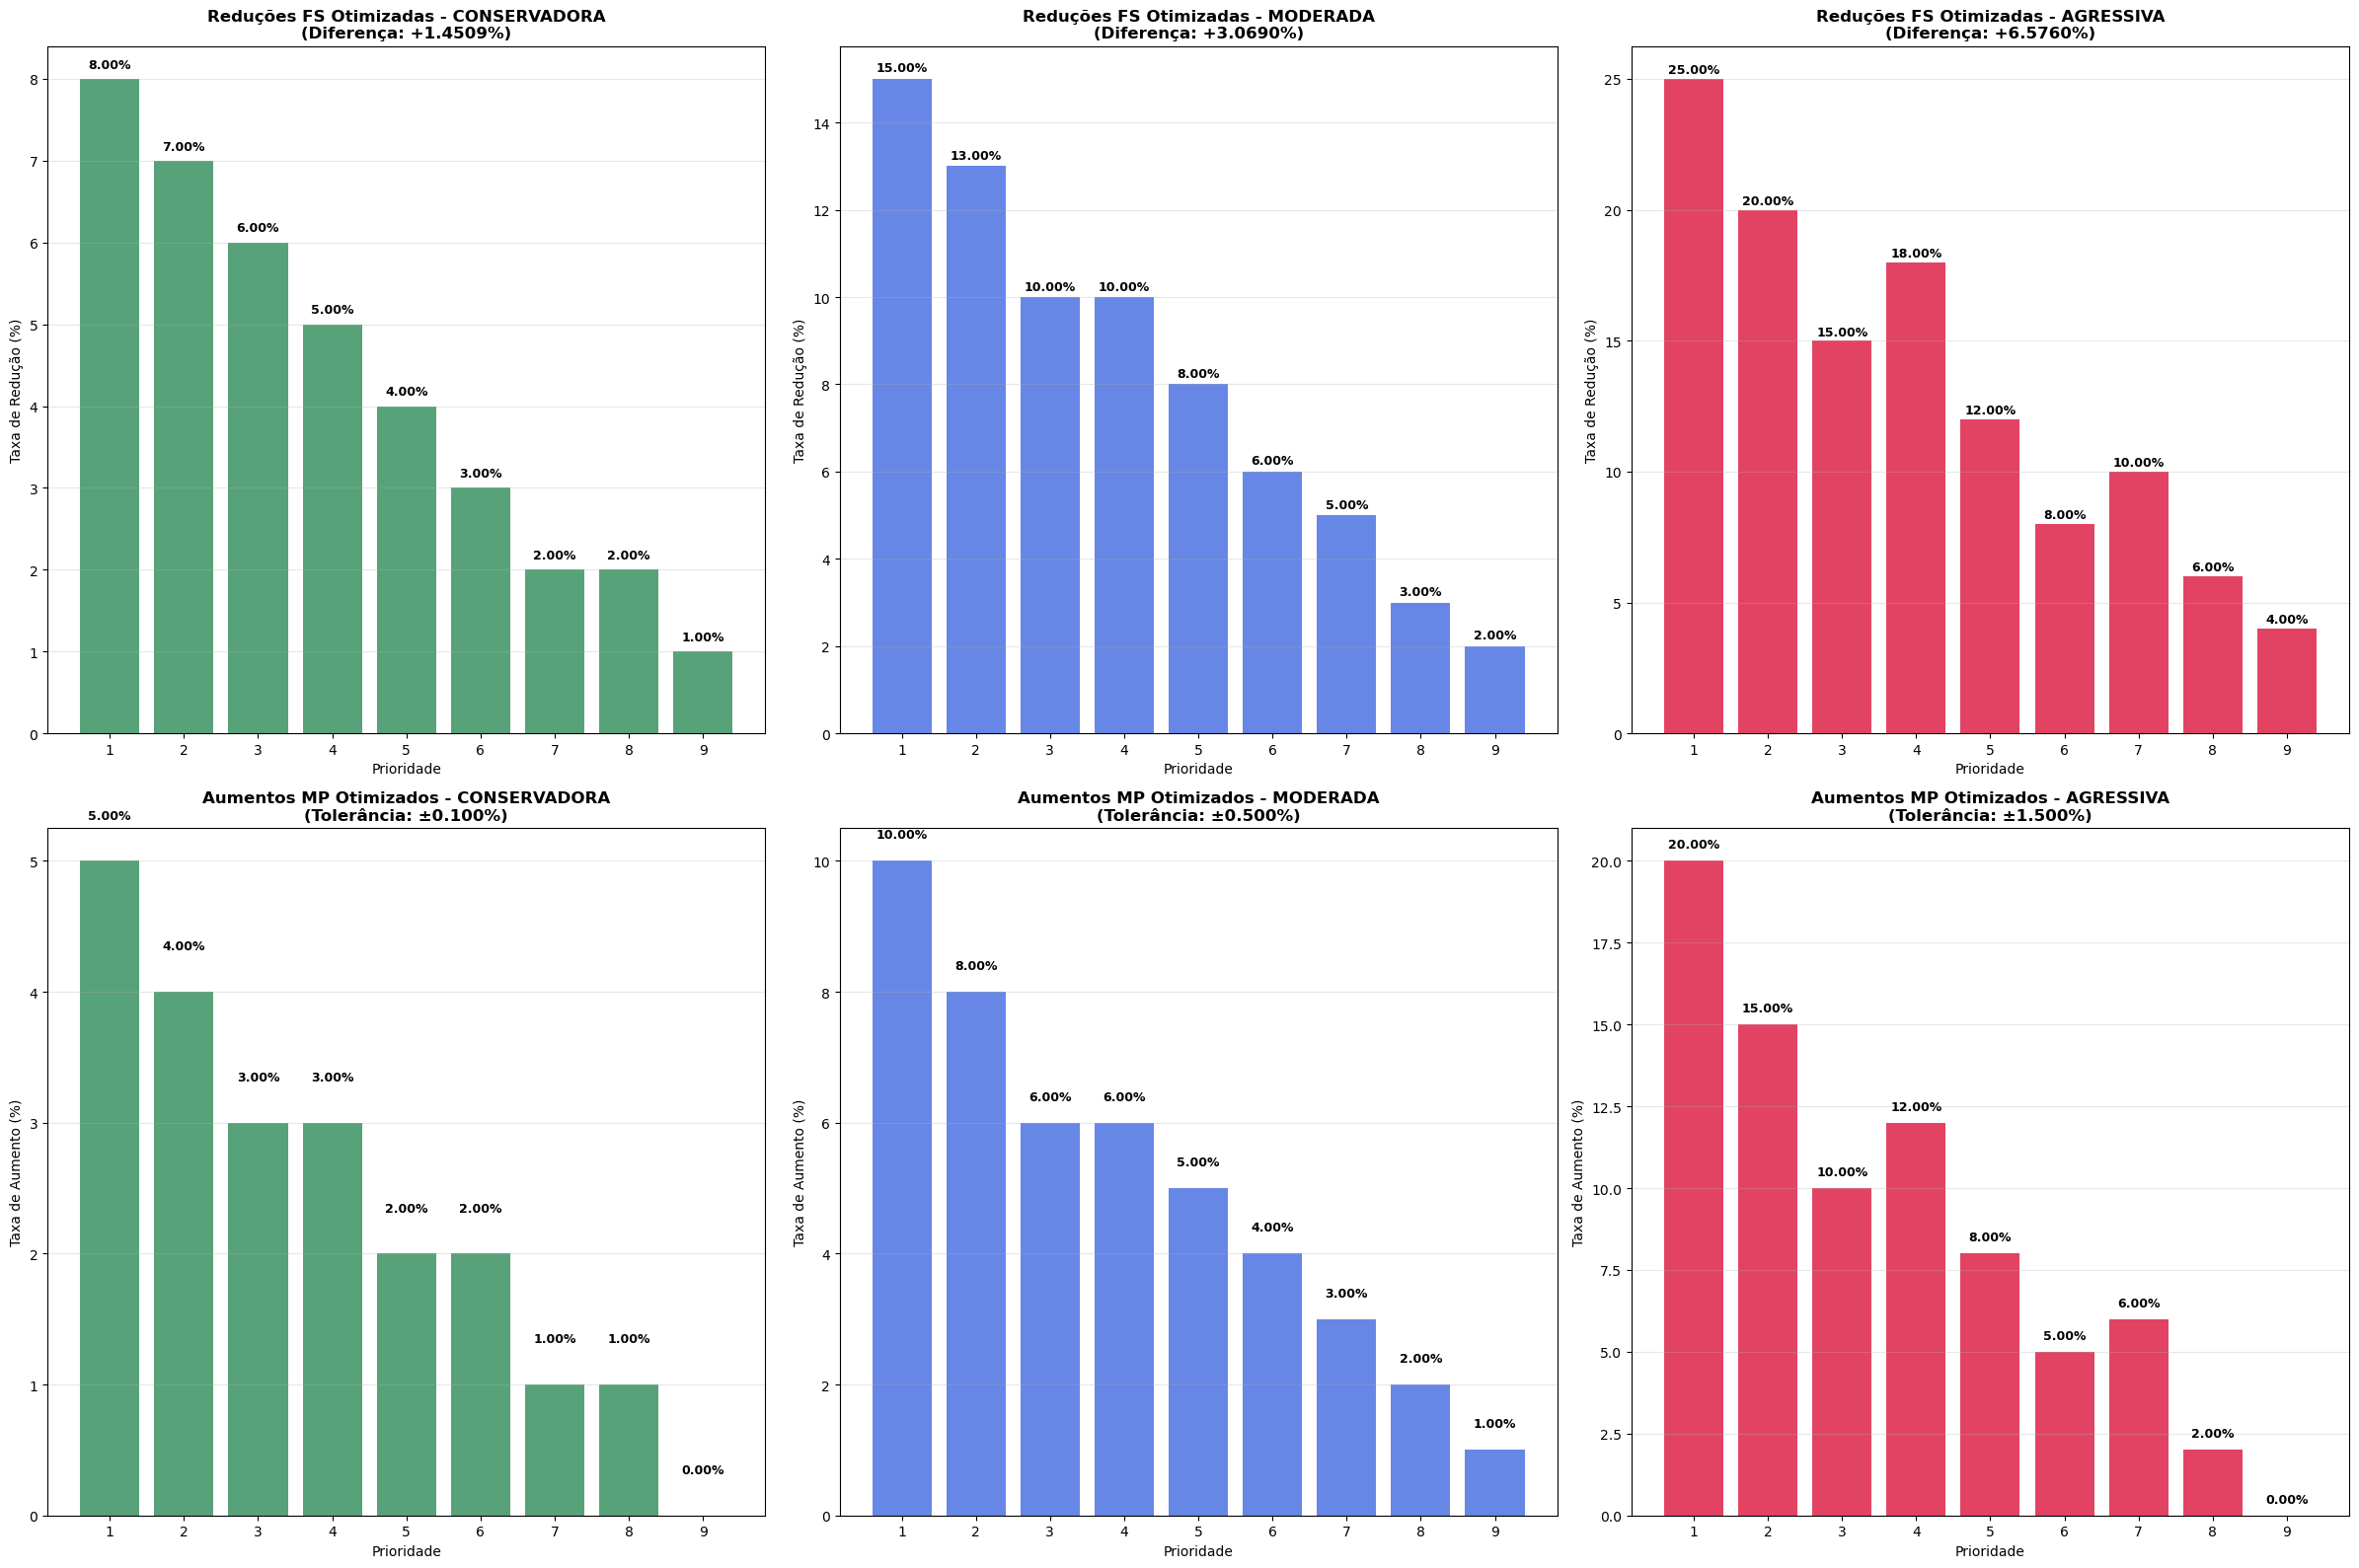

In [7]:
def visualizar_otimizacao_comparativa():
    """
    Visualiza as diferenças entre estratégias otimizadas
    """
    
    fig, axes = plt.subplots(2, 3, figsize=(24, 16))
    
    cores_estrategia = {
        'CONSERVADORA': '#2E8B57',  # Verde
        'MODERADA': '#4169E1',      # Azul  
        'AGRESSIVA': '#DC143C'      # Vermelho
    }
    
    # LINHA 1: TAXAS OTIMIZADAS FS (3 gráficos)
    for i, (nome, resultado) in enumerate(resultados_otimizados.items()):
        ax = axes[0, i]
        
        prioridades = list(range(1, 10))
        taxas_fs = [resultado['taxas_otimizadas_fs'][p] * 100 for p in prioridades]
        
        bars = ax.bar(prioridades, taxas_fs, color=cores_estrategia[nome], alpha=0.8)
        ax.set_title(f'Reduções FS Otimizadas - {nome}\n(Diferença: {resultado["diferenca_percentual"]:+.4f}%)', 
                    fontweight='bold')
        ax.set_xlabel('Prioridade')
        ax.set_ylabel('Taxa de Redução (%)')
        ax.set_xticks(prioridades)
        ax.grid(axis='y', alpha=0.3)
        
        # Adicionar valores nas barras
        for bar, valor in zip(bars, taxas_fs):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                   f'{valor:.2f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # LINHA 2: TAXAS OTIMIZADAS MP (3 gráficos)
    for i, (nome, resultado) in enumerate(resultados_otimizados.items()):
        ax = axes[1, i]
        
        prioridades = list(range(1, 10))
        taxas_mp = [resultado['taxas_otimizadas_mp'][p] * 100 for p in prioridades]
        
        bars = ax.bar(prioridades, taxas_mp, color=cores_estrategia[nome], alpha=0.8)
        ax.set_title(f'Aumentos MP Otimizados - {nome}\n(Tolerância: ±{resultado["tolerancia_maxima"]:.3f}%)', 
                    fontweight='bold')
        ax.set_xlabel('Prioridade')
        ax.set_ylabel('Taxa de Aumento (%)')
        ax.set_xticks(prioridades)
        ax.grid(axis='y', alpha=0.3)
        
        # Adicionar valores nas barras
        for bar, valor in zip(bars, taxas_mp):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                   f'{valor:.2f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Executar visualização
visualizar_otimizacao_comparativa()

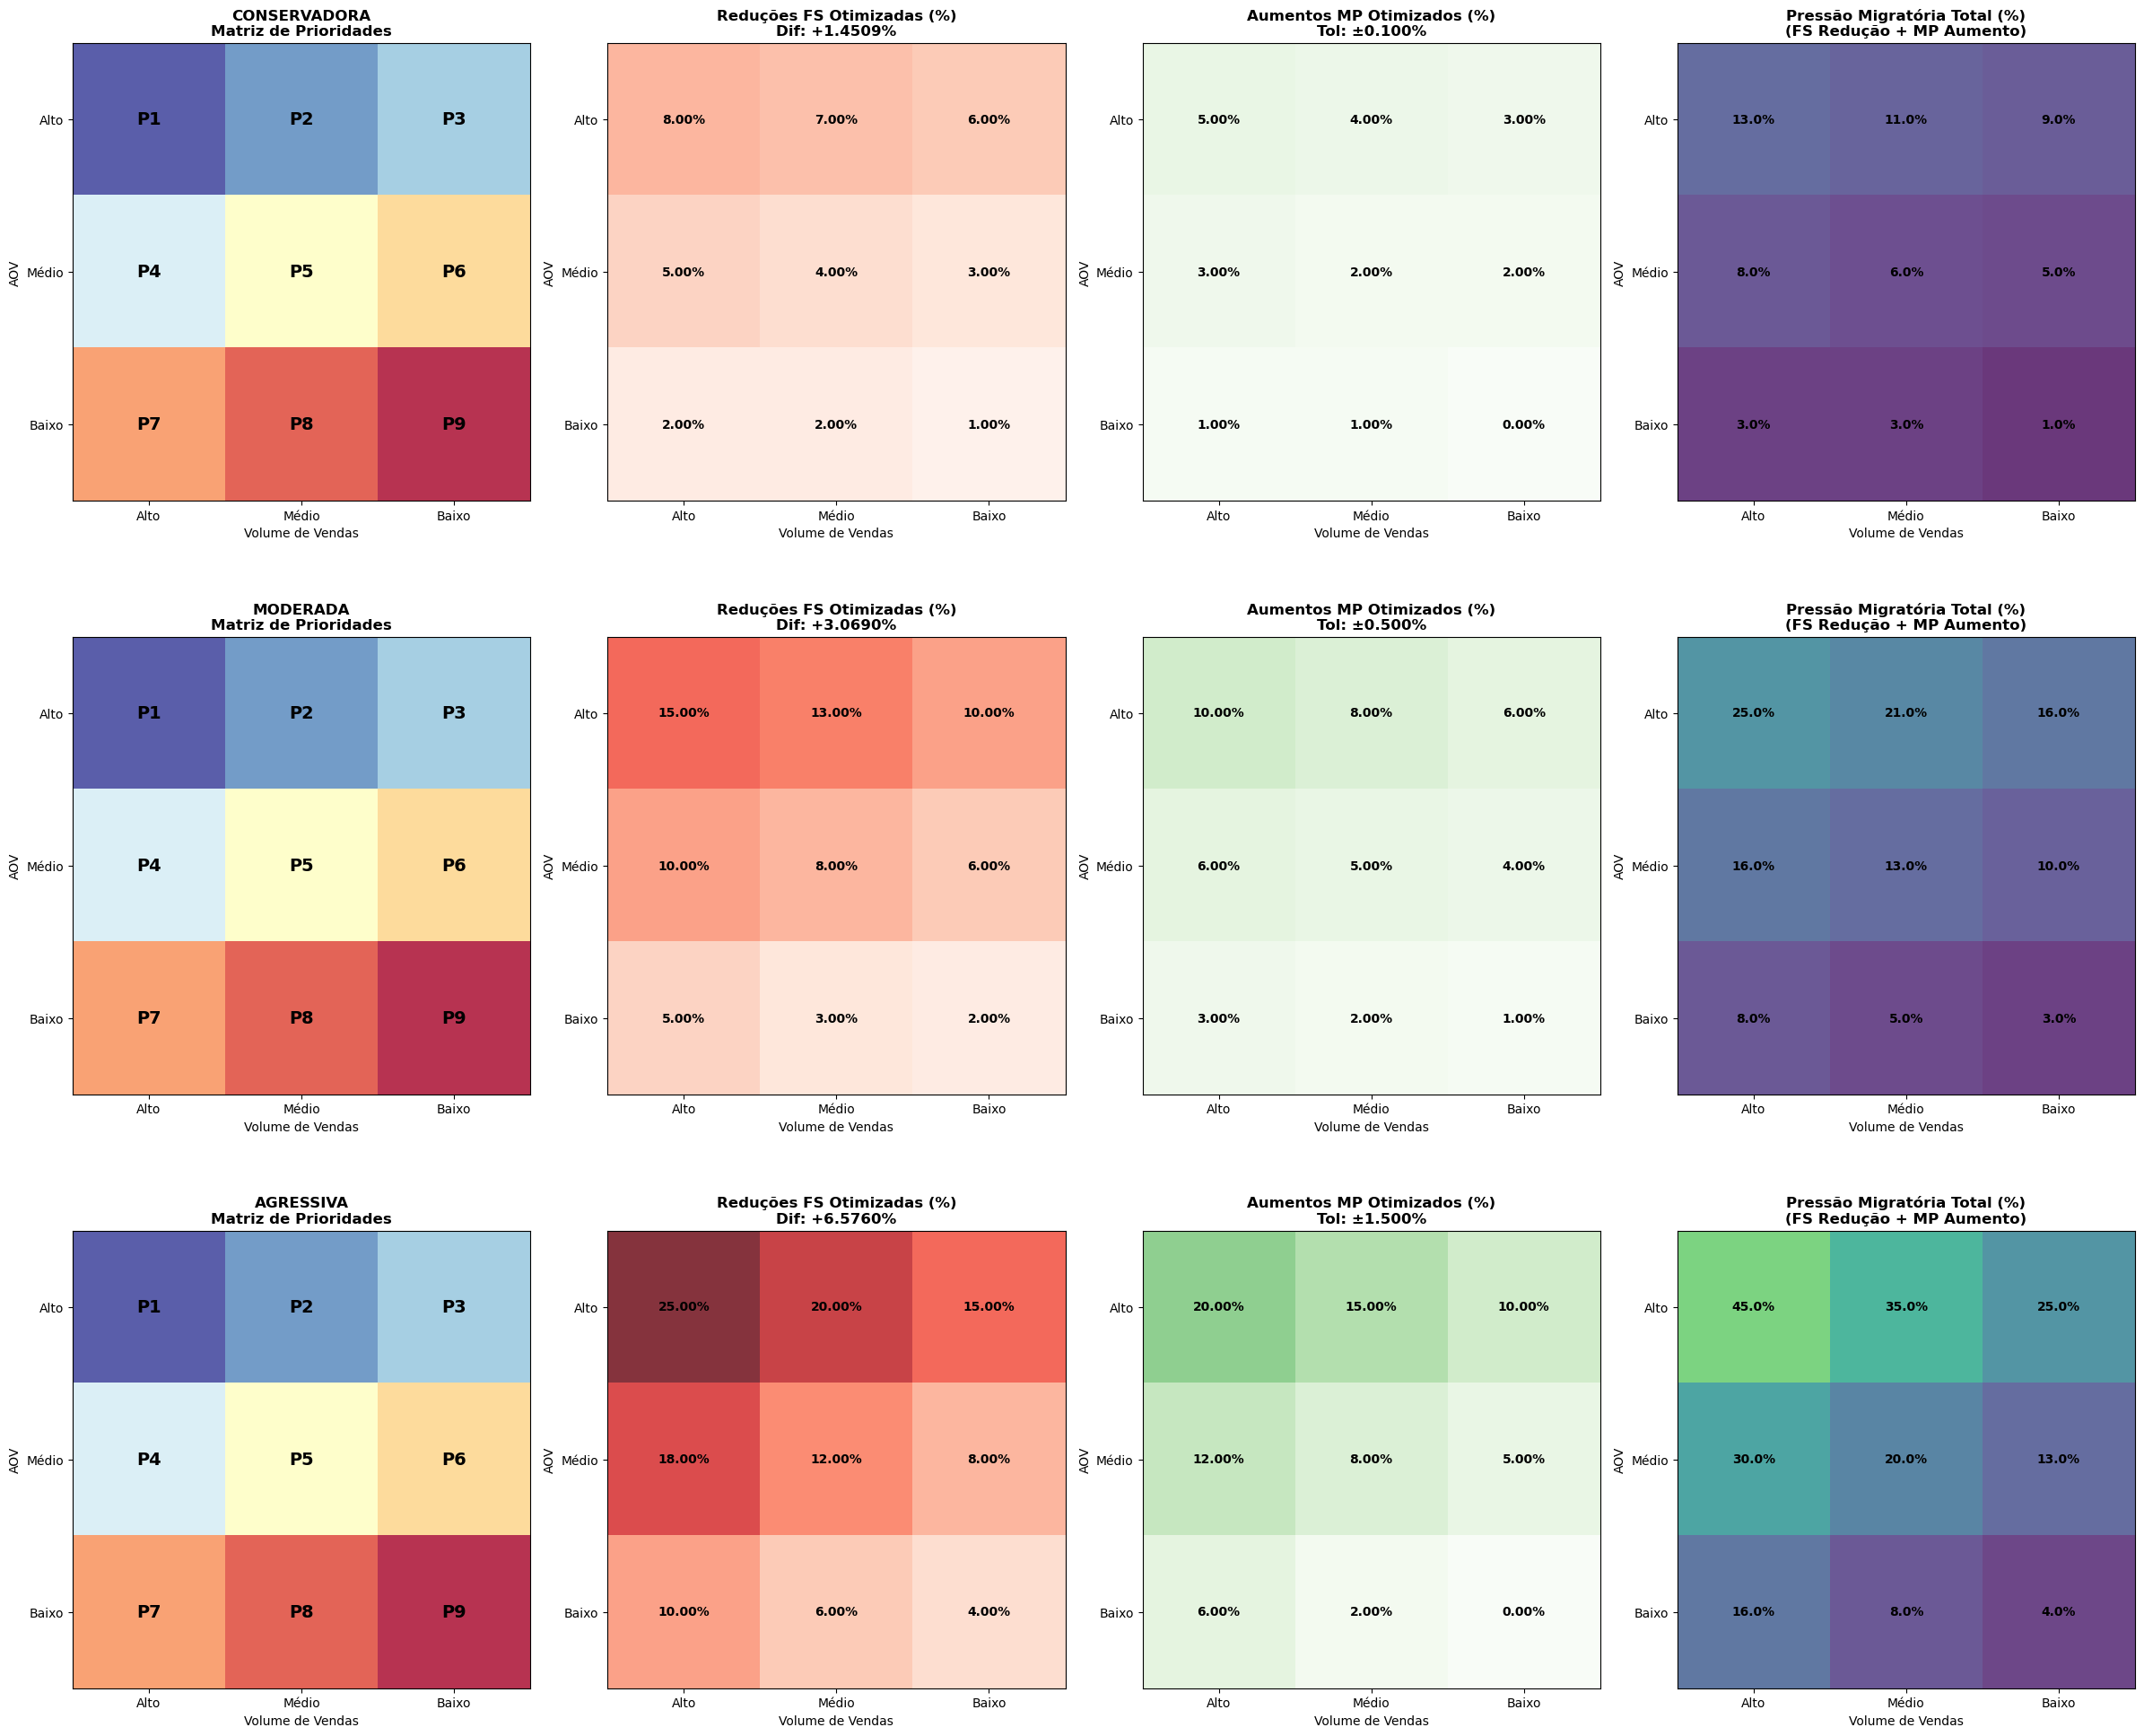

In [8]:
def criar_heatmaps_estrategias_otimizadas():
  """
  Cria heatmaps 3x3 para cada estratégia otimizada (conservadora, moderada, agressiva)
  """
  
  # Preparar dados para matriz
  aov_levels = ['Alto', 'Médio', 'Baixo']
  vol_levels = ['Alto', 'Médio', 'Baixo']
  
  # Matriz de prioridades (sempre a mesma)
  priority_matrix = np.array([
    [1, 2, 3],  # Alto AOV
    [4, 5, 6],  # Médio AOV  
    [7, 8, 9]   # Baixo AOV
  ])
  
  # Função para criar matriz 3x3 a partir das taxas otimizadas
  def criar_matriz_taxas(taxas_dict, tipo='reducao'):
    return np.array([
      [taxas_dict[1] * 100, taxas_dict[2] * 100, taxas_dict[3] * 100],  # Alto AOV
      [taxas_dict[4] * 100, taxas_dict[5] * 100, taxas_dict[6] * 100],  # Médio AOV
      [taxas_dict[7] * 100, taxas_dict[8] * 100, taxas_dict[9] * 100]   # Baixo AOV
    ])
  
  # Criar figura para as 3 estratégias
  fig = plt.figure(figsize=(24, 20))
  
  estrategias_nomes = ['CONSERVADORA', 'MODERADA', 'AGRESSIVA']
  cores_estrategias = ['Greens', 'Blues', 'Reds']
  
  for idx, (nome_estrategia, resultado) in enumerate(resultados_otimizados.items()):
    
    # Criar matrizes para a estratégia atual
    fs_reduction_matrix = criar_matriz_taxas(resultado['taxas_otimizadas_fs'], 'reducao')
    mp_increase_matrix = criar_matriz_taxas(resultado['taxas_otimizadas_mp'], 'aumento')
    pressure_matrix = fs_reduction_matrix + mp_increase_matrix
    
    # Subplot para cada estratégia (4 plots por estratégia)
    base_idx = idx * 4
    
    # 1. Matriz de Prioridades
    ax1 = plt.subplot(3, 4, base_idx + 1)
    im1 = ax1.imshow(priority_matrix, cmap='RdYlBu_r', alpha=0.8)
    ax1.set_xticks(range(3))
    ax1.set_xticklabels(vol_levels)
    ax1.set_yticks(range(3))
    ax1.set_yticklabels(aov_levels)
    ax1.set_xlabel('Volume de Vendas')
    ax1.set_ylabel('AOV')
    ax1.set_title(f'{nome_estrategia}\nMatriz de Prioridades', fontweight='bold', fontsize=12)
    
    # Adicionar valores na matriz
    for i in range(3):
      for j in range(3):
        ax1.text(j, i, f'P{priority_matrix[i, j]}', 
            ha='center', va='center', fontsize=14, fontweight='bold', color='black')
    
    # 2. Matriz de Reduções FS Otimizadas
    ax2 = plt.subplot(3, 4, base_idx + 2)
    im2 = ax2.imshow(fs_reduction_matrix, cmap='Reds', alpha=0.8, vmin=0, vmax=25)
    ax2.set_xticks(range(3))
    ax2.set_xticklabels(vol_levels)
    ax2.set_yticks(range(3))
    ax2.set_yticklabels(aov_levels)
    ax2.set_xlabel('Volume de Vendas')
    ax2.set_ylabel('AOV')
    ax2.set_title(f'Reduções FS Otimizadas (%)\nDif: {resultado["diferenca_percentual"]:+.4f}%', 
           fontweight='bold', fontsize=12)
    
    # Adicionar valores na matriz
    for i in range(3):
      for j in range(3):
        ax2.text(j, i, f'{fs_reduction_matrix[i, j]:.2f}%', 
            ha='center', va='center', fontsize=10, fontweight='bold', color='black')
    
    # 3. Matriz de Aumentos MP Otimizados
    ax3 = plt.subplot(3, 4, base_idx + 3)
    im3 = ax3.imshow(mp_increase_matrix, cmap='Greens', alpha=0.8, vmin=0, vmax=40)
    ax3.set_xticks(range(3))
    ax3.set_xticklabels(vol_levels)
    ax3.set_yticks(range(3))
    ax3.set_yticklabels(aov_levels)
    ax3.set_xlabel('Volume de Vendas')
    ax3.set_ylabel('AOV')
    ax3.set_title(f'Aumentos MP Otimizados (%)\nTol: ±{resultado["tolerancia_maxima"]:.3f}%', 
           fontweight='bold', fontsize=12)
    
    # Adicionar valores na matriz
    for i in range(3):
      for j in range(3):
        ax3.text(j, i, f'{mp_increase_matrix[i, j]:.2f}%', 
            ha='center', va='center', fontsize=10, fontweight='bold', color='black')
    
    # 4. Matriz de Pressão Migratória Total
    ax4 = plt.subplot(3, 4, base_idx + 4)
    im4 = ax4.imshow(pressure_matrix, cmap='viridis', alpha=0.8, vmin=0, vmax=60)
    ax4.set_xticks(range(3))
    ax4.set_xticklabels(vol_levels)
    ax4.set_yticks(range(3))
    ax4.set_yticklabels(aov_levels)
    ax4.set_xlabel('Volume de Vendas')
    ax4.set_ylabel('AOV')
    ax4.set_title(f'Pressão Migratória Total (%)\n(FS Redução + MP Aumento)', 
           fontweight='bold', fontsize=12)
    
    # Adicionar valores na matriz
    for i in range(3):
      for j in range(3):
        ax4.text(j, i, f'{pressure_matrix[i, j]:.1f}%', 
            ha='center', va='center', fontsize=10, fontweight='bold', color='black')
  
  plt.tight_layout()
  
  plt.show()
  
  return None

# Executar heatmaps
criar_heatmaps_estrategias_otimizadas()

## 🎯 ESTRATÉGIA 2: CUSTO-BENEFÍCIO OPERACIONAL
"Premiar Quem Dá Menos Prejuízo"

Sistema de Incentivos: Cria um sistema que beneficia quem gera maior valor nos pedidos e menor prejuízo (ocorrências)

Pressão Migratória Estruturada: Os restaurantes MP de alto valor e com muito prejuízo enfrentam aumentos significativos, tornando o FS muito mais atrativo e são motivados a reduzir prejuízos

Proteção Anti-Churn: Quem gera muito prejuízo mas tem AOV baixo é protegido para não gerar churn. Além de serem incentivados a reduzir os prejuízos/melhorar AOV

Neutralidade Financeira: Mantém a receita total praticamente inalterada

Resultados Esperados:
- Migração MP→FS: Quanto melhor a performance do MP, maior o incentivo para vir para FS
- Prioriza FS com alto AOV
- Incentivo a melhorar: Quanto mais eficiente você for, mais recompensado será
- Competitividade: Torna o iFood mais atrativo para parceiros valiosos

In [ ]:
def estrategia_custo_beneficio():
  global df
  df = df.copy() 
  df.loc[:, 'custo_operacional_por_pedido'] = abs(df['occurrences_cost']) / df['orders']
  top_two = df['custo_operacional_por_pedido'].nlargest(2)
  df = df[~df.index.isin(top_two.index)].copy()
  
  print(f" ANÁLISE DOS CUSTOS:")
  print(f"   Custo Operacional por Pedido:")
  print(f"     Min: R$ {df['custo_operacional_por_pedido'].min():.2f}")
  print(f"     Max: R$ {df['custo_operacional_por_pedido'].max():.2f}")
  print(f"     Média: R$ {df['custo_operacional_por_pedido'].mean():.2f}")
  print(f"     Mediana: R$ {df['custo_operacional_por_pedido'].median():.2f}")
  print(f"     Registros com custo > 0: {(df['custo_operacional_por_pedido'] > 0).sum():,} ({(df['custo_operacional_por_pedido'] > 0).mean()*100:.1f}%)")
  
  custos_positivos = df[df['custo_operacional_por_pedido'] > 0]['custo_operacional_por_pedido']
  
  if len(custos_positivos) > 0:
    q1_custo = custos_positivos.quantile(0.33)
    q2_custo = custos_positivos.quantile(0.67)
  else:
    q1_custo = df['custo_operacional_por_pedido'].quantile(0.33)
    q2_custo = df['custo_operacional_por_pedido'].quantile(0.67)
  
  print(f"\n  CRITÉRIOS DE CLASSIFICAÇÃO - CUSTO OPERACIONAL:")
  print(f"   Baixo Custo: ≤ R$ {q1_custo:.2f} por pedido")
  print(f"   Médio Custo: R$ {q1_custo:.2f} - R$ {q2_custo:.2f} por pedido")
  print(f"   Alto Custo: > R$ {q2_custo:.2f} por pedido")
  
  def classificar_custo(custo):
    if custo <= q1_custo:
      return 'baixo_custo'     
    elif custo <= q2_custo:
      return 'medio_custo'      
    else:
      return 'alto_custo'       
  
  df.loc[:, 'classificacao_custo'] = df['custo_operacional_por_pedido'].apply(classificar_custo)
  

  print(f"\n  DISTRIBUIÇÃO DA CLASSIFICAÇÃO DE CUSTO:")
  dist_custo = df['classificacao_custo'].value_counts()
  for classif, count in dist_custo.items():
    print(f"   {classif.replace('_', ' ').title()}: {count:,} registros ({count/len(df)*100:.1f}%)")
  
  def definir_prioridade_custo_beneficio(row):
    aov = row['aov_classificacao']
    custo = row['classificacao_custo']

    prioridade_matrix = {
      ('alto', 'baixo_custo'): 1,    
      ('alto', 'medio_custo'): 2,   
      ('medio', 'baixo_custo'): 3,   
      ('alto', 'alto_custo'): 4,   
      ('medio', 'medio_custo'): 5,   
      ('baixo', 'baixo_custo'): 6,   
      ('medio', 'alto_custo'): 7,   
      ('baixo', 'medio_custo'): 8,   
      ('baixo', 'alto_custo'): 9     
    }
    
    return prioridade_matrix.get((aov, custo), 9)
  
  def criar_segmento_descricao(row):
    aov = row['aov_classificacao'].title()
    custo = row['classificacao_custo'].replace('_', ' ').title()
    return f"{aov} AOV + {custo}"
  
  df.loc[:, 'prioridade_custo'] = df.apply(definir_prioridade_custo_beneficio, axis=1)
  df.loc[:, 'segmento_custo'] = df.apply(criar_segmento_descricao, axis=1)
  

  print(f"\n  MATRIZ DE SEGMENTAÇÃO (AOV x CUSTO):")
  matriz_segmentacao = pd.crosstab(df['aov_classificacao'], df['classificacao_custo'], margins=True)
  print(matriz_segmentacao)
  
  return df


df_custo_beneficio = estrategia_custo_beneficio()


fs_custo = df_custo_beneficio[df_custo_beneficio['business_model'] == 'FULL_SERVICE'].copy()
mp_custo = df_custo_beneficio[df_custo_beneficio['business_model'] == 'MARKETPLACE'].copy()

fs_rest_custo = fs_custo.groupby('frn_id').agg({
    'prioridade_custo': 'first', 
    'segmento_custo': 'first',
    'commission': 'sum',
    'custo_operacional_por_pedido': 'mean'
}).reset_index()

mp_rest_custo = mp_custo.groupby('frn_id').agg({
    'prioridade_custo': 'first', 
    'segmento_custo': 'first',
    'commission': 'sum',
    'custo_operacional_por_pedido': 'mean'
}).reset_index()

print(f"\n  FULL SERVICE:")
fs_dist_custo = fs_rest_custo['prioridade_custo'].value_counts().sort_index()
for p in range(1, 10):
    count = fs_dist_custo.get(p, 0)
    if count > 0:
        segmento = fs_rest_custo[fs_rest_custo['prioridade_custo'] == p]['segmento_custo'].iloc[0]
        receita = fs_rest_custo[fs_rest_custo['prioridade_custo'] == p]['commission'].sum()
        custo_medio = fs_rest_custo[fs_rest_custo['prioridade_custo'] == p]['custo_operacional_por_pedido'].mean()
        print(f"   P{p}: {count:,} restaurantes | {segmento} | R$ {receita:,.0f} | Custo Médio: R$ {custo_medio:.2f}")

print(f"\n  MARKETPLACE:")
mp_dist_custo = mp_rest_custo['prioridade_custo'].value_counts().sort_index()
for p in range(1, 10):
    count = mp_dist_custo.get(p, 0)
    if count > 0:
        segmento = mp_rest_custo[mp_rest_custo['prioridade_custo'] == p]['segmento_custo'].iloc[0]
        receita = mp_rest_custo[mp_rest_custo['prioridade_custo'] == p]['commission'].sum()
        custo_medio = mp_rest_custo[mp_rest_custo['prioridade_custo'] == p]['custo_operacional_por_pedido'].mean()
        print(f"   P{p}: {count:,} restaurantes | {segmento} | R$ {receita:,.0f} | Custo Médio: R$ {custo_medio:.2f}")

print(f"\n  RECEITA TOTAL:")
print(f"   Full Service: R$ {fs_rest_custo['commission'].sum():,.2f}")
print(f"   Marketplace: R$ {mp_rest_custo['commission'].sum():,.2f}")
print(f"   TOTAL: R$ {fs_rest_custo['commission'].sum() + mp_rest_custo['commission'].sum():,.2f}")

 ANÁLISE DOS CUSTOS:
   Custo Operacional por Pedido:
     Min: R$ 0.00
     Max: R$ 121.97
     Média: R$ 0.15
     Mediana: R$ 0.00
     Registros com custo > 0: 11,211 (8.7%)

  CRITÉRIOS DE CLASSIFICAÇÃO - CUSTO OPERACIONAL:
   Baixo Custo: ≤ R$ 0.25 por pedido
   Médio Custo: R$ 0.25 - R$ 0.91 por pedido
   Alto Custo: > R$ 0.91 por pedido

  DISTRIBUIÇÃO DA CLASSIFICAÇÃO DE CUSTO:
   Baixo Custo: 121,090 registros (94.2%)
   Medio Custo: 3,811 registros (3.0%)
   Alto Custo: 3,700 registros (2.9%)

  MATRIZ DE SEGMENTAÇÃO (AOV x CUSTO):
classificacao_custo  alto_custo  baixo_custo  medio_custo     All
aov_classificacao                                                
alto                        994        30459          694   32147
baixo                       926        30175         1050   32151
medio                      1780        60456         2067   64303
All                        3700       121090         3811  128601

  FULL SERVICE:
   P1: 1,701 restaurantes | Alto AOV +

In [ ]:
def definir_estrategia_custo_beneficio_completa():
    estrategias_custo = {
        'CONSERVADORA': {
            'tolerancia_receita': 0.001,  # 0.1% máximo de variação
            'reducao_fs': {
                # PRIORIDADES ALTAS (Eficientes + Alto AOV) - Maiores reduções
                1: {'min': 0.06, 'max': 0.12, 'desc': 'PREMIUM: Alto AOV + Baixo Custo'},      
                2: {'min': 0.05, 'max': 0.10, 'desc': 'BOM: Alto AOV + Médio Custo'},         
                3: {'min': 0.04, 'max': 0.09, 'desc': 'EFICIENTE: Médio AOV + Baixo Custo'}, 
                
                # PRIORIDADES MÉDIAS 
                4: {'min': 0.02, 'max': 0.06, 'desc': 'PROBLEMÁTICO RICO: Alto AOV + Alto Custo'},
                5: {'min': 0.03, 'max': 0.07, 'desc': 'PADRÃO: Médio AOV + Médio Custo'},          
                6: {'min': 0.02, 'max': 0.05, 'desc': 'LEAN: Baixo AOV + Baixo Custo'},          
                
                # PRIORIDADES BAIXAS (Proteção para pequenos/problemáticos)
                7: {'min': 0.01, 'max': 0.03, 'desc': 'CARO: Médio AOV + Alto Custo'},        
                8: {'min': 0.01, 'max': 0.03, 'desc': 'BÁSICO: Baixo AOV + Médio Custo'},     
                9: {'min': 0.00, 'max': 0.02, 'desc': 'PREJUÍZO: Baixo AOV + Alto Custo'}     
            },  
            'aumento_mp': {
                1: {'min': 0.08, 'max': 0.18, 'desc': 'PREMIUM: Máxima pressão migratória'},          
                2: {'min': 0.06, 'max': 0.15, 'desc': 'BOM: Alta pressão migratória'},                
                3: {'min': 0.05, 'max': 0.12, 'desc': 'EFICIENTE: Incentivar migração'},               
                
                4: {'min': 0.06, 'max': 0.14, 'desc': 'PROBLEMÁTICO RICO: Pressão por ineficiência'}, 
                5: {'min': 0.04, 'max': 0.10, 'desc': 'PADRÃO: Pressão moderada'},                     
                6: {'min': 0.02, 'max': 0.07, 'desc': 'LEAN: Proteção parcial (eficientes)'},         
                
                7: {'min': 0.03, 'max': 0.08, 'desc': 'CARO: Pressão por custo alto'},                
                8: {'min': 0.02, 'max': 0.05, 'desc': 'BÁSICO: Proteção moderada'},                   
                9: {'min': 0.01, 'max': 0.06, 'desc': 'PREJUÍZO: Pressão mínima'}                      
            }
        },
        
        'MODERADA': {
            'tolerancia_receita': 0.001,  # 0.5% máximo de variação
            'reducao_fs': {
                1: {'min': 0.10, 'max': 0.18, 'desc': 'PREMIUM: Alto AOV + Baixo Custo'},      
                2: {'min': 0.08, 'max': 0.15, 'desc': 'BOM: Alto AOV + Médio Custo'},          
                3: {'min': 0.07, 'max': 0.14, 'desc': 'EFICIENTE: Médio AOV + Baixo Custo'},  
                
                4: {'min': 0.04, 'max': 0.09, 'desc': 'PROBLEMÁTICO RICO: Alto AOV + Alto Custo'}, 
                5: {'min': 0.05, 'max': 0.11, 'desc': 'PADRÃO: Médio AOV + Médio Custo'},          
                6: {'min': 0.04, 'max': 0.08, 'desc': 'LEAN: Baixo AOV + Baixo Custo'},            
                
                7: {'min': 0.02, 'max': 0.05, 'desc': 'CARO: Médio AOV + Alto Custo'},        
                8: {'min': 0.02, 'max': 0.05, 'desc': 'BÁSICO: Baixo AOV + Médio Custo'},      
                9: {'min': 0.01, 'max': 0.03, 'desc': 'PREJUÍZO: Baixo AOV + Alto Custo'}  
            },
            'aumento_mp': {
                1: {'min': 0.12, 'max': 0.25, 'desc': 'PREMIUM: Máxima pressão migratória'},           
                2: {'min': 0.10, 'max': 0.20, 'desc': 'BOM: Alta pressão migratória'},                 
                3: {'min': 0.08, 'max': 0.18, 'desc': 'EFICIENTE: Incentivar migração'},               
                
                4: {'min': 0.10, 'max': 0.20, 'desc': 'PROBLEMÁTICO RICO: Pressão por ineficiência'},  
                5: {'min': 0.07, 'max': 0.15, 'desc': 'PADRÃO: Pressão moderada'},                     
                6: {'min': 0.04, 'max': 0.12, 'desc': 'LEAN: Proteção parcial (eficientes)'},         
                
                7: {'min': 0.05, 'max': 0.12, 'desc': 'CARO: Pressão por custo alto'},                 
                8: {'min': 0.03, 'max': 0.08, 'desc': 'BÁSICO: Proteção moderada'},                    
                9: {'min': 0.02, 'max': 0.10, 'desc': 'PREJUÍZO: Pressão baixa-moderada'}        
            }
        },
        
        'AGRESSIVA': {
            'tolerancia_receita': 0.001,  # 1.5% máximo de variação 
            'reducao_fs': {
                1: {'min': 0.18, 'max': 0.30, 'desc': 'PREMIUM: Alto AOV + Baixo Custo'},     
                2: {'min': 0.15, 'max': 0.25, 'desc': 'BOM: Alto AOV + Médio Custo'},          
                3: {'min': 0.12, 'max': 0.22, 'desc': 'EFICIENTE: Médio AOV + Baixo Custo'},  
                
                4: {'min': 0.06, 'max': 0.14, 'desc': 'PROBLEMÁTICO RICO: Alto AOV + Alto Custo'}, 
                5: {'min': 0.08, 'max': 0.16, 'desc': 'PADRÃO: Médio AOV + Médio Custo'},       
                6: {'min': 0.05, 'max': 0.12, 'desc': 'LEAN: Baixo AOV + Baixo Custo'},           
                
                7: {'min': 0.03, 'max': 0.08, 'desc': 'CARO: Médio AOV + Alto Custo'},        
                8: {'min': 0.03, 'max': 0.08, 'desc': 'BÁSICO: Baixo AOV + Médio Custo'},      
                9: {'min': 0.01, 'max': 0.05, 'desc': 'PREJUÍZO: Baixo AOV + Alto Custo'}     
            },
            'aumento_mp': {
                1: {'min': 0.25, 'max': 0.45, 'desc': 'PREMIUM: Máxima pressão migratória'},          
                2: {'min': 0.20, 'max': 0.35, 'desc': 'BOM: Alta pressão migratória'},                 
                3: {'min': 0.15, 'max': 0.30, 'desc': 'EFICIENTE: Incentivar migração'},               
                
                4: {'min': 0.18, 'max': 0.35, 'desc': 'PROBLEMÁTICO RICO: Pressão por ineficiência'},  
                5: {'min': 0.12, 'max': 0.25, 'desc': 'PADRÃO: Pressão moderada-alta'},                
                6: {'min': 0.08, 'max': 0.18, 'desc': 'LEAN: Proteção relativa (eficientes)'},       
                
                7: {'min': 0.10, 'max': 0.22, 'desc': 'CARO: Pressão por custo alto'},               
                8: {'min': 0.05, 'max': 0.15, 'desc': 'BÁSICO: Proteção moderada'},                    
                9: {'min': 0.03, 'max': 0.18, 'desc': 'PREJUÍZO: Pressão variável'}      
            }
        }
    }
    
    return estrategias_custo

estrategias_custo_config = definir_estrategia_custo_beneficio_completa()
resultados_custo_beneficio = {}


fs_custo_hierarquia = fs_rest_custo.copy()
fs_custo_hierarquia['prioridade'] = fs_custo_hierarquia['prioridade_custo']

mp_custo_hierarquia = mp_rest_custo.copy() 
mp_custo_hierarquia['prioridade'] = mp_custo_hierarquia['prioridade_custo']

print("=" * 70)

for nome, config in estrategias_custo_config.items():
    resultado = otimizar_taxas_para_neutralidade(fs_custo_hierarquia, mp_custo_hierarquia, config, nome)
    resultados_custo_beneficio[nome] = resultado
    
    print(f"\n  ESTRATÉGIA {nome}:")
    print(f"   Receita Atual Total: R$ {resultado['receita_atual_total']:,.2f}")
    print(f"   Receita Nova Total: R$ {resultado['receita_nova_total']:,.2f}")
    print(f"   Diferença: R$ {resultado['diferenca_absoluta']:,.2f} ({resultado['diferenca_percentual']:+.4f}%)")
    print(f"   Tolerância Máxima: ±{resultado['tolerancia_maxima']:.3f}%")
    


  ESTRATÉGIA CONSERVADORA:
   Receita Atual Total: R$ 93,027,869.86
   Receita Nova Total: R$ 95,569,965.78
   Diferença: R$ 2,542,095.92 (+2.7326%)
   Tolerância Máxima: ±0.100%

  ESTRATÉGIA MODERADA:
   Receita Atual Total: R$ 93,027,869.86
   Receita Nova Total: R$ 97,028,151.26
   Diferença: R$ 4,000,281.40 (+4.3001%)
   Tolerância Máxima: ±0.100%

  ESTRATÉGIA AGRESSIVA:
   Receita Atual Total: R$ 93,027,869.86
   Receita Nova Total: R$ 102,082,622.79
   Diferença: R$ 9,054,752.93 (+9.7334%)
   Tolerância Máxima: ±0.100%


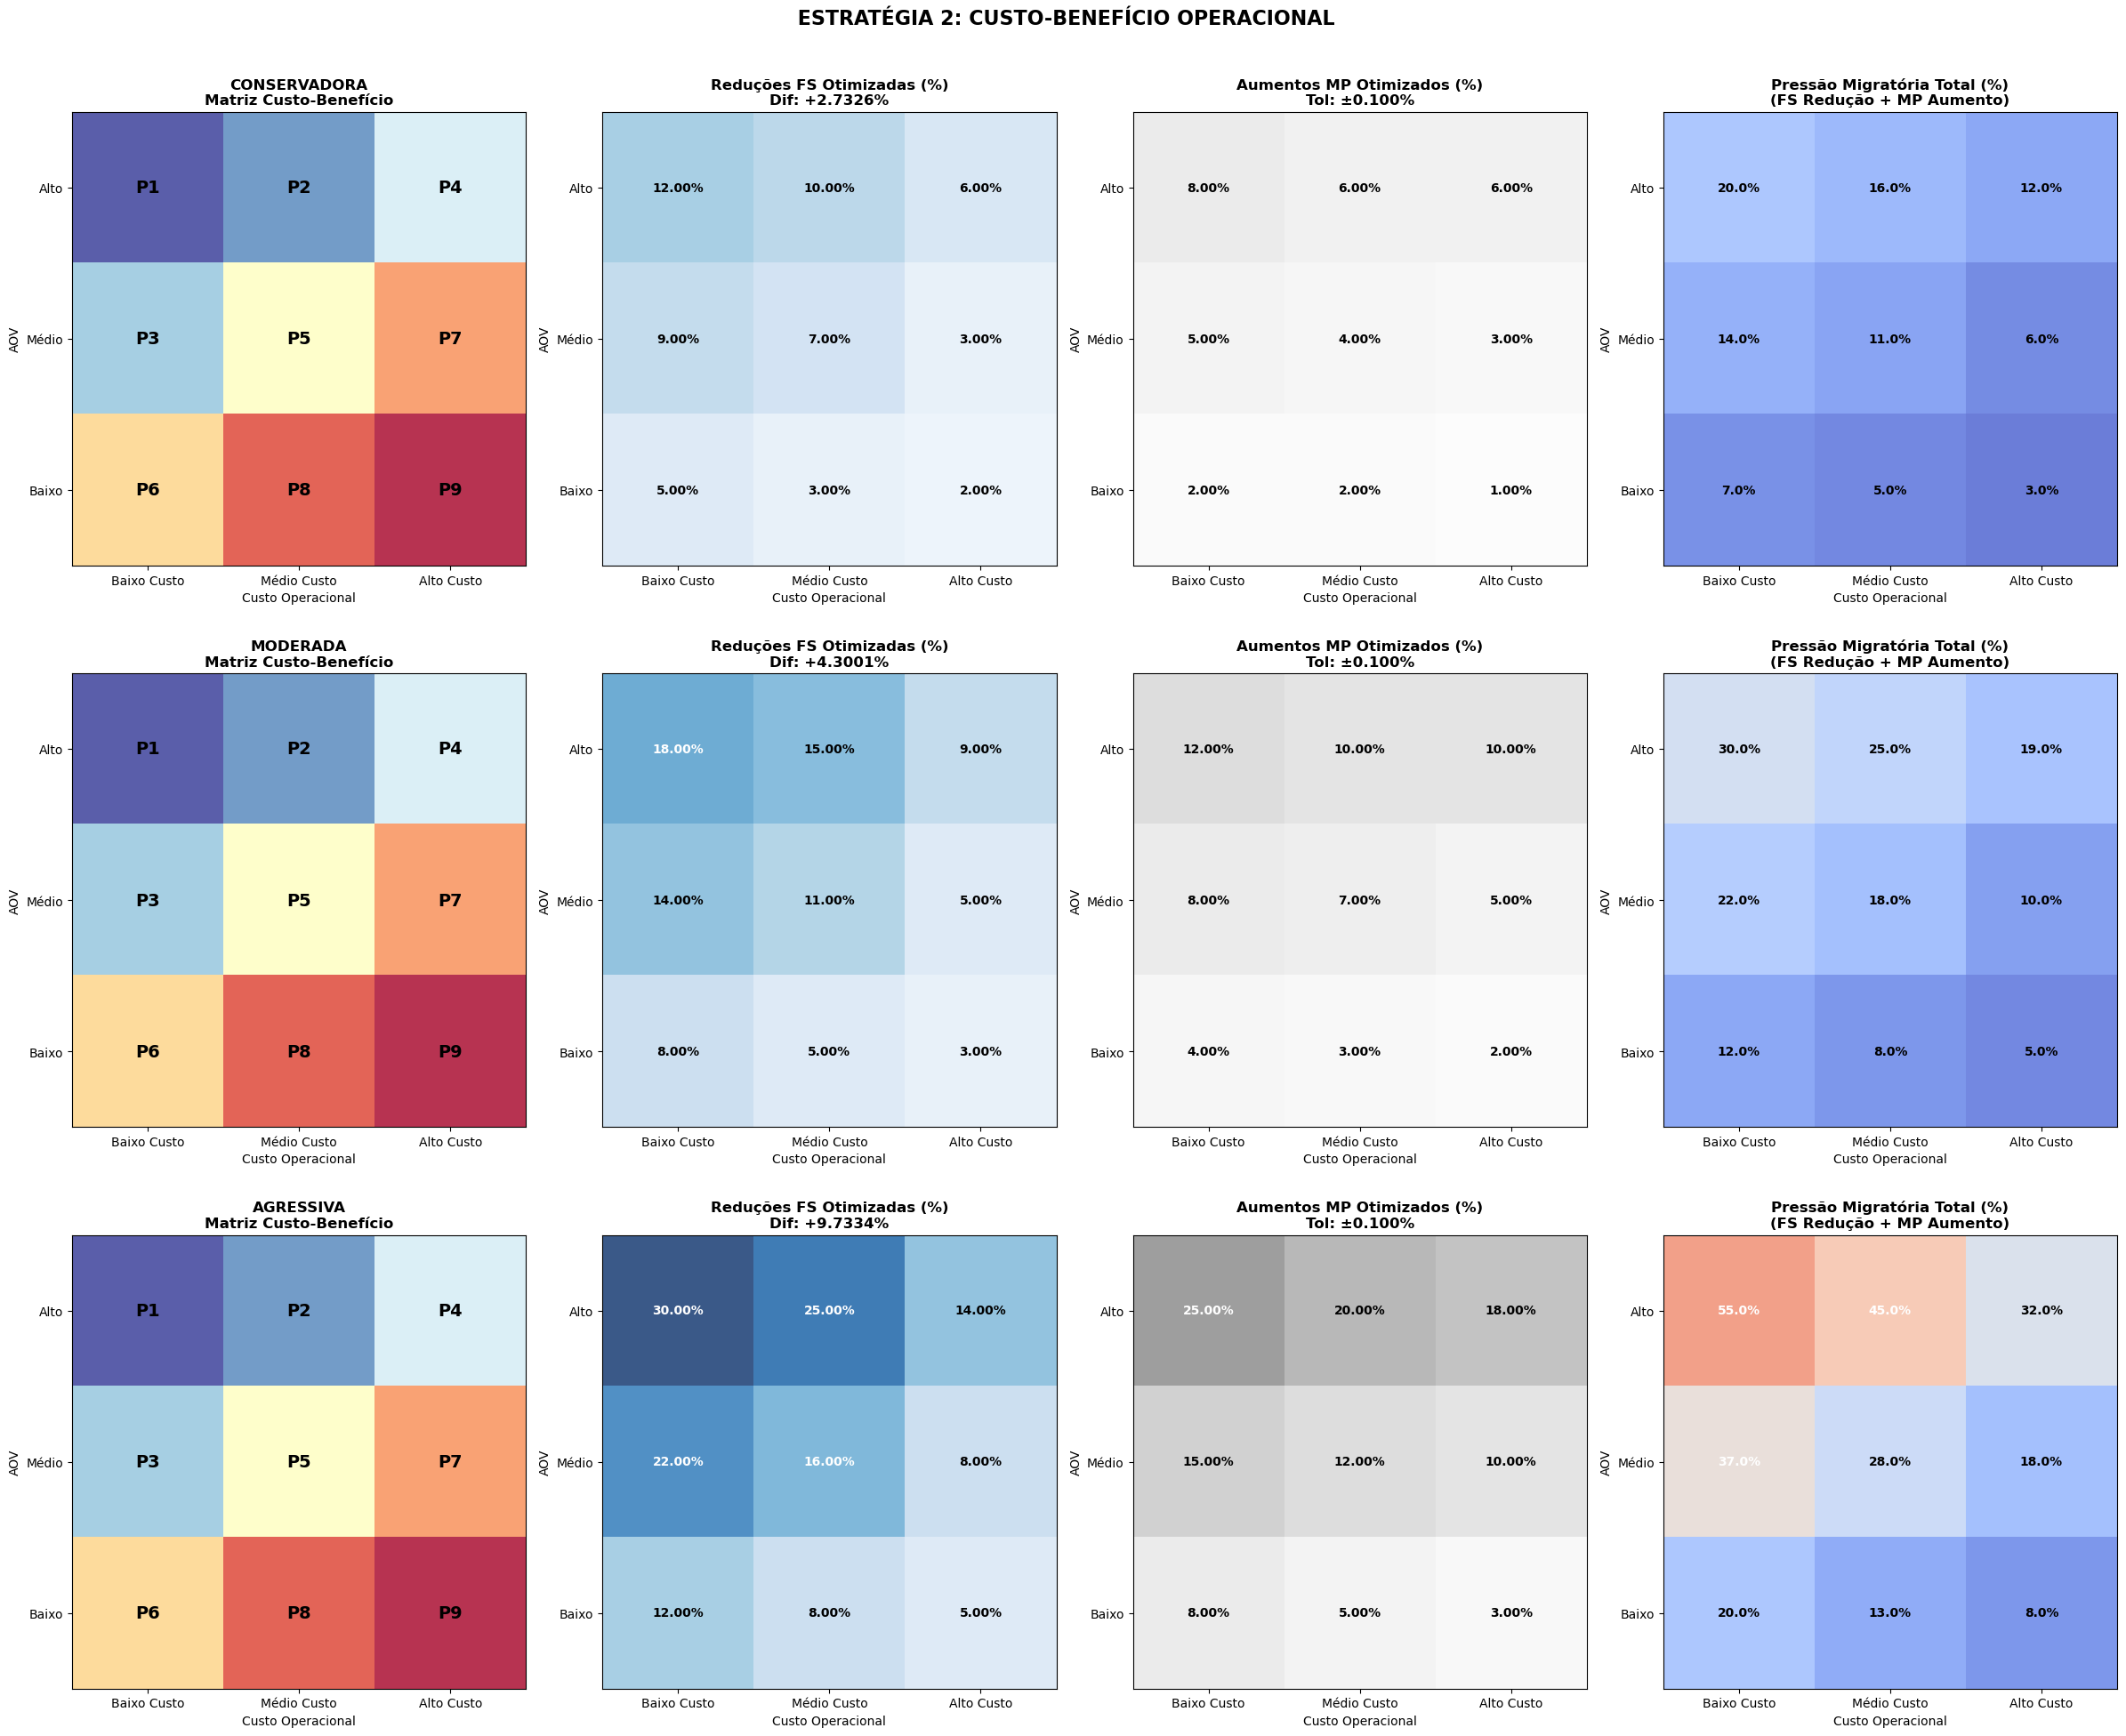

In [11]:
def criar_heatmaps_estrategia_custo_beneficio():
    
    aov_levels = ['Alto', 'Médio', 'Baixo']
    custo_levels = ['Baixo Custo', 'Médio Custo', 'Alto Custo']
    
    priority_matrix_custo = np.array([
        [1, 2, 4],  
        [3, 5, 7],  
        [6, 8, 9]   
    ])
    
    def criar_matriz_taxas_custo(taxas_dict):
        matriz = np.zeros((3, 3))
        
        matriz[0, 0] = taxas_dict.get(1, 0) * 100  
        matriz[0, 1] = taxas_dict.get(2, 0) * 100  
        matriz[0, 2] = taxas_dict.get(4, 0) * 100  
        
        matriz[1, 0] = taxas_dict.get(3, 0) * 100  
        matriz[1, 1] = taxas_dict.get(5, 0) * 100  
        matriz[1, 2] = taxas_dict.get(7, 0) * 100  
        
        matriz[2, 0] = taxas_dict.get(6, 0) * 100  
        matriz[2, 1] = taxas_dict.get(8, 0) * 100  
        matriz[2, 2] = taxas_dict.get(9, 0) * 100  
        
        return matriz
    
    fig = plt.figure(figsize=(24, 20))
    
    cores_estrategias = ['Blues', 'Greys', 'BuGn']
    
    for idx, (nome_estrategia, resultado) in enumerate(resultados_custo_beneficio.items()):
        
        fs_reduction_matrix = criar_matriz_taxas_custo(resultado['taxas_otimizadas_fs'])
        mp_increase_matrix = criar_matriz_taxas_custo(resultado['taxas_otimizadas_mp'])
        pressure_matrix = fs_reduction_matrix + mp_increase_matrix
        
        base_idx = idx * 4
        
        ax1 = plt.subplot(3, 4, base_idx + 1)
        im1 = ax1.imshow(priority_matrix_custo, cmap='RdYlBu_r', alpha=0.8)
        ax1.set_xticks(range(3))
        ax1.set_xticklabels(custo_levels)
        ax1.set_yticks(range(3))
        ax1.set_yticklabels(aov_levels)
        ax1.set_xlabel('Custo Operacional')
        ax1.set_ylabel('AOV')
        ax1.set_title(f'{nome_estrategia}\nMatriz Custo-Benefício', fontweight='bold', fontsize=12)
        
        for i in range(3):
            for j in range(3):
                ax1.text(j, i, f'P{priority_matrix_custo[i, j]}', 
                        ha='center', va='center', fontsize=14, fontweight='bold', color='black')
        
        ax2 = plt.subplot(3, 4, base_idx + 2)
        im2 = ax2.imshow(fs_reduction_matrix, cmap='Blues', alpha=0.8, vmin=0, vmax=30)
        ax2.set_xticks(range(3))
        ax2.set_xticklabels(custo_levels)
        ax2.set_yticks(range(3))
        ax2.set_yticklabels(aov_levels)
        ax2.set_xlabel('Custo Operacional')
        ax2.set_ylabel('AOV')
        ax2.set_title(f'Reduções FS Otimizadas (%)\nDif: {resultado["diferenca_percentual"]:+.4f}%', 
                     fontweight='bold', fontsize=12)

        for i in range(3):
            for j in range(3):
                color = 'white' if fs_reduction_matrix[i, j] > 15 else 'black'
                ax2.text(j, i, f'{fs_reduction_matrix[i, j]:.2f}%', 
                        ha='center', va='center', fontsize=10, fontweight='bold', color=color)
        
        ax3 = plt.subplot(3, 4, base_idx + 3)
        im3 = ax3.imshow(mp_increase_matrix, cmap='Greys', alpha=0.8, vmin=0, vmax=45)
        ax3.set_xticks(range(3))
        ax3.set_xticklabels(custo_levels)
        ax3.set_yticks(range(3))
        ax3.set_yticklabels(aov_levels)
        ax3.set_xlabel('Custo Operacional')
        ax3.set_ylabel('AOV')
        ax3.set_title(f'Aumentos MP Otimizados (%)\nTol: ±{resultado["tolerancia_maxima"]:.3f}%', 
                     fontweight='bold', fontsize=12)
        
        for i in range(3):
            for j in range(3):
                color = 'white' if mp_increase_matrix[i, j] > 22 else 'black'
                ax3.text(j, i, f'{mp_increase_matrix[i, j]:.2f}%', 
                        ha='center', va='center', fontsize=10, fontweight='bold', color=color)
        
        ax4 = plt.subplot(3, 4, base_idx + 4)
        im4 = ax4.imshow(pressure_matrix, cmap='coolwarm', alpha=0.8, vmin=0, vmax=70)
        ax4.set_xticks(range(3))
        ax4.set_xticklabels(custo_levels)
        ax4.set_yticks(range(3))
        ax4.set_yticklabels(aov_levels)
        ax4.set_xlabel('Custo Operacional')
        ax4.set_ylabel('AOV')
        ax4.set_title(f'Pressão Migratória Total (%)\n(FS Redução + MP Aumento)', 
                     fontweight='bold', fontsize=12)
        
        for i in range(3):
            for j in range(3):
                color = 'white' if pressure_matrix[i, j] > 35 else 'black'
                ax4.text(j, i, f'{pressure_matrix[i, j]:.1f}%', 
                        ha='center', va='center', fontsize=10, fontweight='bold', color=color)
    
    plt.suptitle(' ESTRATÉGIA 2: CUSTO-BENEFÍCIO OPERACIONAL\n', 
                fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.94)
    
    plt.show()
    
    return None

criar_heatmaps_estrategia_custo_beneficio()

In [ ]:
def mostrar_taxas_custo_beneficio():
    
    for nome, resultado in resultados_custo_beneficio.items():
        print(f"\n ESTRATÉGIA {nome}:")
        print(f"   Diferença de Receita: {resultado['diferenca_percentual']:+.4f}% (Tolerância: ±{resultado['tolerancia_maxima']:.3f}%)")
        print("-" * 50)
        
        print(f"\n - TAXAS DE REDUÇÃO FULL SERVICE:")
        for p in range(1, 10):
            if p in resultado['taxas_otimizadas_fs']:
                taxa_otimizada = resultado['taxas_otimizadas_fs'][p] * 100
                config_original = estrategias_custo_config[nome]['reducao_fs'][p]
                min_range = config_original['min'] * 100
                max_range = config_original['max'] * 100
                desc = config_original['desc']
                
                print(f"   P{p}: {taxa_otimizada:.3f}% (Range: {min_range:.1f}%-{max_range:.1f}%) | {desc}")
        
        print(f"\n- TAXAS DE AUMENTO MARKETPLACE:")
        for p in range(1, 10):
            if p in resultado['taxas_otimizadas_mp']:
                taxa_otimizada = resultado['taxas_otimizadas_mp'][p] * 100
                config_original = estrategias_custo_config[nome]['aumento_mp'][p]
                min_range = config_original['min'] * 100
                max_range = config_original['max'] * 100
                desc = config_original['desc']
                
                print(f"   P{p}: {taxa_otimizada:.3f}% (Range: {min_range:.1f}%-{max_range:.1f}%) | {desc}")

mostrar_taxas_custo_beneficio()


 ESTRATÉGIA CONSERVADORA:
   Diferença de Receita: +2.7326% (Tolerância: ±0.100%)
--------------------------------------------------

 - TAXAS DE REDUÇÃO FULL SERVICE:
   P1: 12.000% (Range: 6.0%-12.0%) | PREMIUM: Alto AOV + Baixo Custo
   P2: 10.000% (Range: 5.0%-10.0%) | BOM: Alto AOV + Médio Custo
   P3: 9.000% (Range: 4.0%-9.0%) | EFICIENTE: Médio AOV + Baixo Custo
   P4: 6.000% (Range: 2.0%-6.0%) | PROBLEMÁTICO RICO: Alto AOV + Alto Custo
   P5: 7.000% (Range: 3.0%-7.0%) | PADRÃO: Médio AOV + Médio Custo
   P6: 5.000% (Range: 2.0%-5.0%) | LEAN: Baixo AOV + Baixo Custo
   P7: 3.000% (Range: 1.0%-3.0%) | CARO: Médio AOV + Alto Custo
   P8: 3.000% (Range: 1.0%-3.0%) | BÁSICO: Baixo AOV + Médio Custo
   P9: 2.000% (Range: 0.0%-2.0%) | PREJUÍZO: Baixo AOV + Alto Custo

- TAXAS DE AUMENTO MARKETPLACE:
   P1: 8.000% (Range: 8.0%-18.0%) | PREMIUM: Máxima pressão migratória
   P2: 6.000% (Range: 6.0%-15.0%) | BOM: Alta pressão migratória
   P3: 5.000% (Range: 5.0%-12.0%) | EFICIENTE: Ince

## 🎯 ESTRATÉGIA 3: RENTABILIDADE LÍQUIDA
"Premiar Quem Realmente Dá Lucro ao iFood"

---

### 💰 **Conceito**
Esta estratégia combina **todos os aspectos financeiros** para identificar os restaurantes que realmente geram valor líquido para o iFood. 

**Diferencial único:** Considera não apenas volume ou eficiência, mas a **rentabilidade real** após todos os custos e receitas.

### 🎯 **Lógica**
- **Receita Bruta**: Todo dinheiro que entra (comissões + taxas + serviços)
- **Receita Líquida**: Receita bruta menos custos operacionais reais
- **Margem Líquida**: Percentual de lucratividade real por restaurante

### 🚀 **Objetivo**
Identificar e premiar os **verdadeiros parceiros lucrativos**, criando um sistema que:
- Reconhece valor real além do volume aparente
- Incentiva comportamentos que maximizam margem
- Permite decisões estratégicas baseadas em lucratividade real

In [13]:
def estrategia_rentabilidade_liquida():
    global df
    df = df.copy()
    
    def calc_receita_bruta(row):
        if row['business_model'] == "FULL_SERVICE":
            return (row['commission'] + row['service_fee'] + row['anticipation_fee'] +
                    row['olp_fee'] + row['paid_delivery_fee'])
        else:  
            return (row['commission'] + row['service_fee'] + row['anticipation_fee'] + row['paid_delivery_fee'] +
                    row['olp_fee'])

    def calc_receita_liquida(row):
        if row['business_model'] == "FULL_SERVICE":
            return (row['commission'] + row['service_fee'] + row['anticipation_fee'] +
                    row['olp_fee'] + row['paid_delivery_fee'] + 
                    row['delivery_cost'] + row['occurrences_cost'])  
        else:  
            return (row['commission'] + row['service_fee'] + row['anticipation_fee'] + 
                    row['olp_fee'] + row['delivery_cost'] + row['occurrences_cost'] + row['paid_delivery_fee'])  

    df.loc[:, 'receita_bruta_ifood'] = df.apply(calc_receita_bruta, axis=1)
    df.loc[:, 'receita_liquida_ifood'] = df.apply(calc_receita_liquida, axis=1)
    
    df.loc[:, 'margem_liquida_pct'] = ((df['receita_liquida_ifood'] / df['receita_bruta_ifood']) * 100).fillna(0)
    
    df.loc[:, 'receita_liquida_por_pedido'] = df['receita_liquida_ifood'] / df['orders']
    
    receita_bruta_total = df['receita_bruta_ifood'].sum()
    receita_liquida_total = df['receita_liquida_ifood'].sum()
    margem_liquida_geral = (receita_liquida_total / receita_bruta_total) * 100
    
    print(f" - ANÁLISE DE RENTABILIDADE LÍQUIDA:")
    print(f"   Receita Bruta Total: R$ {receita_bruta_total:,.2f}")
    print(f"   Receita Líquida Total: R$ {receita_liquida_total:,.2f}")
    print(f"   Margem Líquida Geral: {margem_liquida_geral:.2f}%")
    print(f"   Diferença Bruta-Líquida: R$ {receita_bruta_total - receita_liquida_total:,.2f}")
    
    q1_receita = df['receita_liquida_por_pedido'].quantile(0.25)
    q3_receita = df['receita_liquida_por_pedido'].quantile(0.75)
    
    q1_margem = df['margem_liquida_pct'].quantile(0.25)
    q3_margem = df['margem_liquida_pct'].quantile(0.75)
    
    print(f"\n - CRITÉRIOS DE CLASSIFICAÇÃO - RENTABILIDADE:")
    print(f"   Receita Líquida por Pedido:")
    print(f"     Baixa: ≤ R$ {q1_receita:.2f}")
    print(f"     Alta: > R$ {q3_receita:.2f}")
    print(f"   Margem Líquida:")
    print(f"     Baixa: ≤ {q1_margem:.1f}%")
    print(f"     Alta: > {q3_margem:.1f}%")
    
    def classificar_receita_liquida(valor):
        if valor <= q1_receita:
            return 'baixa_receita'
        elif valor > q3_receita:
            return 'alta_receita'
        else:
            return 'media_receita'
    
    def classificar_margem(valor):
        if valor <= q1_margem:
            return 'baixa_margem'
        elif valor > q3_margem:
            return 'alta_margem'
        else:
            return 'media_margem'
    
    df.loc[:, 'classificacao_receita_liquida'] = df['receita_liquida_por_pedido'].apply(classificar_receita_liquida)
    df.loc[:, 'classificacao_margem'] = df['margem_liquida_pct'].apply(classificar_margem)
    
    print(f"\n - DISTRIBUIÇÃO RECEITA LÍQUIDA:")
    dist_receita = df['classificacao_receita_liquida'].value_counts()
    for classif, count in dist_receita.items():
        print(f"   {classif.replace('_', ' ').title()}: {count:,} registros ({count/len(df)*100:.1f}%)")
    
    print(f"\n - DISTRIBUIÇÃO MARGEM LÍQUIDA:")
    dist_margem = df['classificacao_margem'].value_counts()
    for classif, count in dist_margem.items():
        print(f"   {classif.replace('_', ' ').title()}: {count:,} registros ({count/len(df)*100:.1f}%)")
    
    def definir_prioridade_rentabilidade(row):
        receita = row['classificacao_receita_liquida']
        margem = row['classificacao_margem']
        
        prioridade_matrix = {
            ('alta_receita', 'alta_margem'): 1,      
            ('alta_receita', 'media_margem'): 2,     
            ('media_receita', 'alta_margem'): 3,    
            ('alta_receita', 'baixa_margem'): 4,     
            ('media_receita', 'media_margem'): 5,    
            ('baixa_receita', 'alta_margem'): 6,     
            ('media_receita', 'baixa_margem'): 7,    
            ('baixa_receita', 'media_margem'): 8,    
            ('baixa_receita', 'baixa_margem'): 9    
        }
        
        return prioridade_matrix.get((receita, margem), 9)
    
    def criar_segmento_rentabilidade(row):
        receita = row['classificacao_receita_liquida'].replace('_', ' ').title()
        margem = row['classificacao_margem'].replace('_', ' ').title()
        return f"{receita} + {margem}"
    
    df.loc[:, 'prioridade_rentabilidade'] = df.apply(definir_prioridade_rentabilidade, axis=1)
    df.loc[:, 'segmento_rentabilidade'] = df.apply(criar_segmento_rentabilidade, axis=1)
    
    print(f"\n - MATRIZ DE SEGMENTAÇÃO (RECEITA LÍQUIDA x MARGEM):")
    matriz_rentabilidade = pd.crosstab(df['classificacao_receita_liquida'], df['classificacao_margem'], margins=True)
    print(matriz_rentabilidade)
    
    return df

print("=" * 60)
df_rentabilidade = estrategia_rentabilidade_liquida()

 - ANÁLISE DE RENTABILIDADE LÍQUIDA:
   Receita Bruta Total: R$ 178,568,937.73
   Receita Líquida Total: R$ 156,562,200.70
   Margem Líquida Geral: 87.68%
   Diferença Bruta-Líquida: R$ 22,006,737.03

 - CRITÉRIOS DE CLASSIFICAÇÃO - RENTABILIDADE:
   Receita Líquida por Pedido:
     Baixa: ≤ R$ 5.13
     Alta: > R$ 12.59
   Margem Líquida:
     Baixa: ≤ 64.5%
     Alta: > 100.0%

 - DISTRIBUIÇÃO RECEITA LÍQUIDA:
   Media Receita: 64,300 registros (50.0%)
   Baixa Receita: 32,151 registros (25.0%)
   Alta Receita: 32,150 registros (25.0%)

 - DISTRIBUIÇÃO MARGEM LÍQUIDA:
   Media Margem: 87,712 registros (68.2%)
   Baixa Margem: 32,151 registros (25.0%)
   Alta Margem: 8,738 registros (6.8%)

 - MATRIZ DE SEGMENTAÇÃO (RECEITA LÍQUIDA x MARGEM):
classificacao_margem           alta_margem  baixa_margem  media_margem     All
classificacao_receita_liquida                                                 
alta_receita                          3476          1735         26939   32150
baixa_rec

In [14]:
fs_rest_rentabilidade = df_rentabilidade[df_rentabilidade['business_model'] == 'FULL_SERVICE'].copy()
mp_rest_rentabilidade = df_rentabilidade[df_rentabilidade['business_model'] == 'MARKETPLACE'].copy()

fs_rest_rentabilidade['margem_liquida_pct'] = np.where(
    fs_rest_rentabilidade['receita_bruta_ifood'] > 0,
    (fs_rest_rentabilidade['receita_liquida_ifood'] / fs_rest_rentabilidade['receita_bruta_ifood']) * 100,
    0  
)

mp_rest_rentabilidade['margem_liquida_pct'] = np.where(
    mp_rest_rentabilidade['receita_bruta_ifood'] > 0,
    (mp_rest_rentabilidade['receita_liquida_ifood'] / mp_rest_rentabilidade['receita_bruta_ifood']) * 100,
    0  
)

fs_rest_rentabilidade = fs_rest_rentabilidade[fs_rest_rentabilidade['receita_bruta_ifood'] > 0]
mp_rest_rentabilidade = mp_rest_rentabilidade[mp_rest_rentabilidade['receita_bruta_ifood'] > 0]

fs_rest_rentabilidade['margem_liquida_pct'] = (
    fs_rest_rentabilidade['receita_liquida_ifood'] / fs_rest_rentabilidade['receita_bruta_ifood']
) * 100

mp_rest_rentabilidade['margem_liquida_pct'] = (
    mp_rest_rentabilidade['receita_liquida_ifood'] / mp_rest_rentabilidade['receita_bruta_ifood']
) * 100

print(f"\n - FULL SERVICE - ANÁLISE POR RENTABILIDADE:")
fs_dist_rentabilidade = fs_rest_rentabilidade['prioridade_rentabilidade'].value_counts().sort_index()
for p in range(1, 10):
    count = fs_dist_rentabilidade.get(p, 0)
    if count > 0:
        subset = fs_rest_rentabilidade[fs_rest_rentabilidade['prioridade_rentabilidade'] == p]
        segmento = subset['segmento_rentabilidade'].iloc[0]
        receita_liquida = subset['receita_liquida_ifood'].sum()
        margem_media = subset['margem_liquida_pct'].mean()
        receita_por_pedido = subset['receita_liquida_por_pedido'].mean()
        
        print(f"   P{p}: {count:,} restaurantes | {segmento}")
        print(f"        Receita Líquida: R$ {receita_liquida:,.0f} | Margem: {margem_media:.1f}% | R$ {receita_por_pedido:.2f}/pedido")

print(f"\n - MARKETPLACE - ANÁLISE POR RENTABILIDADE:")
mp_dist_rentabilidade = mp_rest_rentabilidade['prioridade_rentabilidade'].value_counts().sort_index()
for p in range(1, 10):
    count = mp_dist_rentabilidade.get(p, 0)
    if count > 0:
        subset = mp_rest_rentabilidade[mp_rest_rentabilidade['prioridade_rentabilidade'] == p]
        segmento = subset['segmento_rentabilidade'].iloc[0]
        receita_liquida = subset['receita_liquida_ifood'].sum()
        margem_media = subset['margem_liquida_pct'].mean()
        receita_por_pedido = subset['receita_liquida_por_pedido'].mean()
        
        print(f"   P{p}: {count:,} restaurantes | {segmento}")
        print(f"        Receita Líquida: R$ {receita_liquida:,.0f} | Margem: {margem_media:.1f}% | R$ {receita_por_pedido:.2f}/pedido")


 - FULL SERVICE - ANÁLISE POR RENTABILIDADE:
   P2: 2,243 restaurantes | Alta Receita + Media Margem
        Receita Líquida: R$ 3,351,050 | Margem: 74.7% | R$ 21.22/pedido
   P4: 1,713 restaurantes | Alta Receita + Baixa Margem
        Receita Líquida: R$ 1,514,433 | Margem: 56.8% | R$ 16.55/pedido
   P5: 2,265 restaurantes | Media Receita + Media Margem
        Receita Líquida: R$ 317,483 | Margem: 86.0% | R$ 8.25/pedido
   P6: 1 restaurantes | Baixa Receita + Alta Margem
        Receita Líquida: R$ 32 | Margem: 111.3% | R$ 2.27/pedido
   P7: 13,442 restaurantes | Media Receita + Baixa Margem
        Receita Líquida: R$ 13,153,555 | Margem: 50.4% | R$ 7.87/pedido
   P8: 1,389 restaurantes | Baixa Receita + Media Margem
        Receita Líquida: R$ 24,198 | Margem: 95.9% | R$ 3.49/pedido
   P9: 13,531 restaurantes | Baixa Receita + Baixa Margem
        Receita Líquida: R$ 1,780,848 | Margem: 8.5% | R$ 1.40/pedido

 - MARKETPLACE - ANÁLISE POR RENTABILIDADE:
   P1: 3,476 restaurantes |

In [15]:
def definir_estrategia_rentabilidade_completa():
    
    estrategias_rentabilidade = {
        'CONSERVADORA': {
            'tolerancia_receita': 0.001,  # ±0.1%
            'reducao_fs': {
                # PRIORIDADES ALTAS (Máxima rentabilidade)
                1: {'min': 0.08, 'max': 0.15, 'desc': 'PLATINUM: Alta Receita + Alta Margem'},        # Máxima redução
                2: {'min': 0.06, 'max': 0.12, 'desc': 'GOLD PLUS: Alta Receita + Média Margem'},     # Alta redução
                3: {'min': 0.05, 'max': 0.10, 'desc': 'EFICIENTE PREMIUM: Média Receita + Alta Margem'}, # Boa redução
                
                # PRIORIDADES MÉDIAS (Equilíbrio)
                4: {'min': 0.03, 'max': 0.07, 'desc': 'VOLUME CARO: Alta Receita + Baixa Margem'},    # Redução menor
                5: {'min': 0.02, 'max': 0.06, 'desc': 'PADRÃO: Média Receita + Média Margem'},       # Redução padrão
                6: {'min': 0.02, 'max': 0.05, 'desc': 'NICHO RENTÁVEL: Baixa Receita + Alta Margem'}, # Proteção nicho
                
                # PRIORIDADES BAIXAS (Proteção)
                7: {'min': 0.01, 'max': 0.04, 'desc': 'MEDIANO CARO: Média Receita + Baixa Margem'}, # Baixa redução
                8: {'min': 0.01, 'max': 0.03, 'desc': 'PEQUENO PADRÃO: Baixa Receita + Média Margem'}, # Proteção
                9: {'min': 0.00, 'max': 0.02, 'desc': 'PREJUÍZO: Baixa Receita + Baixa Margem'}      # Proteção mínima
            },
            'aumento_mp': {
                1: {'min': 0.08, 'max': 0.15, 'desc': 'PLATINUM: Máxima pressão migratória'},         # Alta pressão
                2: {'min': 0.06, 'max': 0.12, 'desc': 'GOLD PLUS: Alta pressão migratória'},          # Alta pressão
                3: {'min': 0.05, 'max': 0.10, 'desc': 'EFICIENTE: Incentivar migração'},              # Pressão moderada
                4: {'min': 0.03, 'max': 0.08, 'desc': 'VOLUME CARO: Pressão por baixa margem'},       # Pressão moderada
                5: {'min': 0.02, 'max': 0.06, 'desc': 'PADRÃO: Pressão padrão'},                      # Pressão baixa
                6: {'min': 0.02, 'max': 0.05, 'desc': 'NICHO: Proteção parcial (rentáveis)'},        # Proteção nicho
                7: {'min': 0.01, 'max': 0.04, 'desc': 'MEDIANO: Pressão por margem baixa'},           # Pressão baixa
                8: {'min': 0.01, 'max': 0.03, 'desc': 'PEQUENO: Proteção moderada'},                  # Proteção
                9: {'min': 0.00, 'max': 0.02, 'desc': 'PREJUÍZO: Proteção total'}                     # Proteção total
            }
        },
        
        'MODERADA': {
            'tolerancia_receita': 0.005,  # ±0.5%
            'reducao_fs': {
                1: {'min': 0.12, 'max': 0.20, 'desc': 'PLATINUM: Alta Receita + Alta Margem'},
                2: {'min': 0.10, 'max': 0.18, 'desc': 'GOLD PLUS: Alta Receita + Média Margem'},
                3: {'min': 0.08, 'max': 0.15, 'desc': 'EFICIENTE PREMIUM: Média Receita + Alta Margem'},
                4: {'min': 0.05, 'max': 0.10, 'desc': 'VOLUME CARO: Alta Receita + Baixa Margem'},
                5: {'min': 0.04, 'max': 0.09, 'desc': 'PADRÃO: Média Receita + Média Margem'},
                6: {'min': 0.03, 'max': 0.08, 'desc': 'NICHO RENTÁVEL: Baixa Receita + Alta Margem'},
                7: {'min': 0.02, 'max': 0.06, 'desc': 'MEDIANO CARO: Média Receita + Baixa Margem'},
                8: {'min': 0.02, 'max': 0.05, 'desc': 'PEQUENO PADRÃO: Baixa Receita + Média Margem'},
                9: {'min': 0.01, 'max': 0.03, 'desc': 'PREJUÍZO: Baixa Receita + Baixa Margem'}
            },
            'aumento_mp': {
                1: {'min': 0.12, 'max': 0.22, 'desc': 'PLATINUM: Máxima pressão migratória'},
                2: {'min': 0.10, 'max': 0.18, 'desc': 'GOLD PLUS: Alta pressão migratória'},
                3: {'min': 0.08, 'max': 0.15, 'desc': 'EFICIENTE: Incentivar migração forte'},
                4: {'min': 0.05, 'max': 0.12, 'desc': 'VOLUME CARO: Pressão por baixa margem'},
                5: {'min': 0.04, 'max': 0.10, 'desc': 'PADRÃO: Pressão moderada'},
                6: {'min': 0.03, 'max': 0.08, 'desc': 'NICHO: Preservar eficiência'},
                7: {'min': 0.02, 'max': 0.06, 'desc': 'MEDIANO: Pressão por melhoria'},
                8: {'min': 0.02, 'max': 0.05, 'desc': 'PEQUENO: Proteção moderada'},
                9: {'min': 0.01, 'max': 0.04, 'desc': 'PREJUÍZO: Proteção flexível'}
            }
        },
        
        'AGRESSIVA': {
            'tolerancia_receita': 0.015,  # ±1.5%
            'reducao_fs': {
                1: {'min': 0.18, 'max': 0.30, 'desc': 'PLATINUM: Alta Receita + Alta Margem'},
                2: {'min': 0.15, 'max': 0.25, 'desc': 'GOLD PLUS: Alta Receita + Média Margem'},
                3: {'min': 0.12, 'max': 0.22, 'desc': 'EFICIENTE PREMIUM: Média Receita + Alta Margem'},
                4: {'min': 0.08, 'max': 0.15, 'desc': 'VOLUME CARO: Alta Receita + Baixa Margem'},
                5: {'min': 0.06, 'max': 0.12, 'desc': 'PADRÃO: Média Receita + Média Margem'},
                6: {'min': 0.05, 'max': 0.12, 'desc': 'NICHO RENTÁVEL: Baixa Receita + Alta Margem'},
                7: {'min': 0.03, 'max': 0.08, 'desc': 'MEDIANO CARO: Média Receita + Baixa Margem'},
                8: {'min': 0.03, 'max': 0.08, 'desc': 'PEQUENO PADRÃO: Baixa Receita + Média Margem'},
                9: {'min': 0.02, 'max': 0.05, 'desc': 'PREJUÍZO: Baixa Receita + Baixa Margem'}
            },
            'aumento_mp': {
                1: {'min': 0.20, 'max': 0.35, 'desc': 'PLATINUM: Máxima pressão migratória'},
                2: {'min': 0.15, 'max': 0.28, 'desc': 'GOLD PLUS: Alta pressão migratória'},
                3: {'min': 0.12, 'max': 0.25, 'desc': 'EFICIENTE: Migração agressiva'},
                4: {'min': 0.08, 'max': 0.18, 'desc': 'VOLUME CARO: Pressão forte por margem'},
                5: {'min': 0.06, 'max': 0.15, 'desc': 'PADRÃO: Pressão moderada-alta'},
                6: {'min': 0.05, 'max': 0.12, 'desc': 'NICHO: Preservar com pressão'},
                7: {'min': 0.03, 'max': 0.10, 'desc': 'MEDIANO: Pressão por melhoria'},
                8: {'min': 0.03, 'max': 0.08, 'desc': 'PEQUENO: Proteção limitada'},
                9: {'min': 0.02, 'max': 0.06, 'desc': 'PREJUÍZO: Pressão mínima'}
            }
        }
    }
    
    return estrategias_rentabilidade

estrategias_rentabilidade_config = definir_estrategia_rentabilidade_completa()
resultados_rentabilidade = {}

fs_rentabilidade_hierarquia = fs_rest_rentabilidade.copy()
fs_rentabilidade_hierarquia['prioridade'] = fs_rentabilidade_hierarquia['prioridade_rentabilidade']

mp_rentabilidade_hierarquia = mp_rest_rentabilidade.copy()
mp_rentabilidade_hierarquia['prioridade'] = mp_rentabilidade_hierarquia['prioridade_rentabilidade']


for nome, config in estrategias_rentabilidade_config.items():
    resultado = otimizar_taxas_para_neutralidade(fs_rentabilidade_hierarquia, mp_rentabilidade_hierarquia, config, nome)
    resultados_rentabilidade[nome] = resultado
    
    print(f"\n  ESTRATÉGIA {nome}:")
    print(f"   Receita Atual Total: R$ {resultado['receita_atual_total']:,.2f}")
    print(f"   Receita Nova Total: R$ {resultado['receita_nova_total']:,.2f}")
    print(f"   Diferença: R$ {resultado['diferenca_absoluta']:,.2f} ({resultado['diferenca_percentual']:+.4f}%)")
    print(f"   Tolerância Máxima: ±{resultado['tolerancia_maxima']:.3f}%")
    


  ESTRATÉGIA CONSERVADORA:
   Receita Atual Total: R$ 93,027,869.86
   Receita Nova Total: R$ 94,588,261.38
   Diferença: R$ 1,560,391.52 (+1.6773%)
   Tolerância Máxima: ±0.100%

  ESTRATÉGIA MODERADA:
   Receita Atual Total: R$ 93,027,869.86
   Receita Nova Total: R$ 96,008,390.75
   Diferença: R$ 2,980,520.89 (+3.2039%)
   Tolerância Máxima: ±0.500%

  ESTRATÉGIA AGRESSIVA:
   Receita Atual Total: R$ 93,027,869.86
   Receita Nova Total: R$ 97,719,855.30
   Diferença: R$ 4,691,985.44 (+5.0436%)
   Tolerância Máxima: ±1.500%


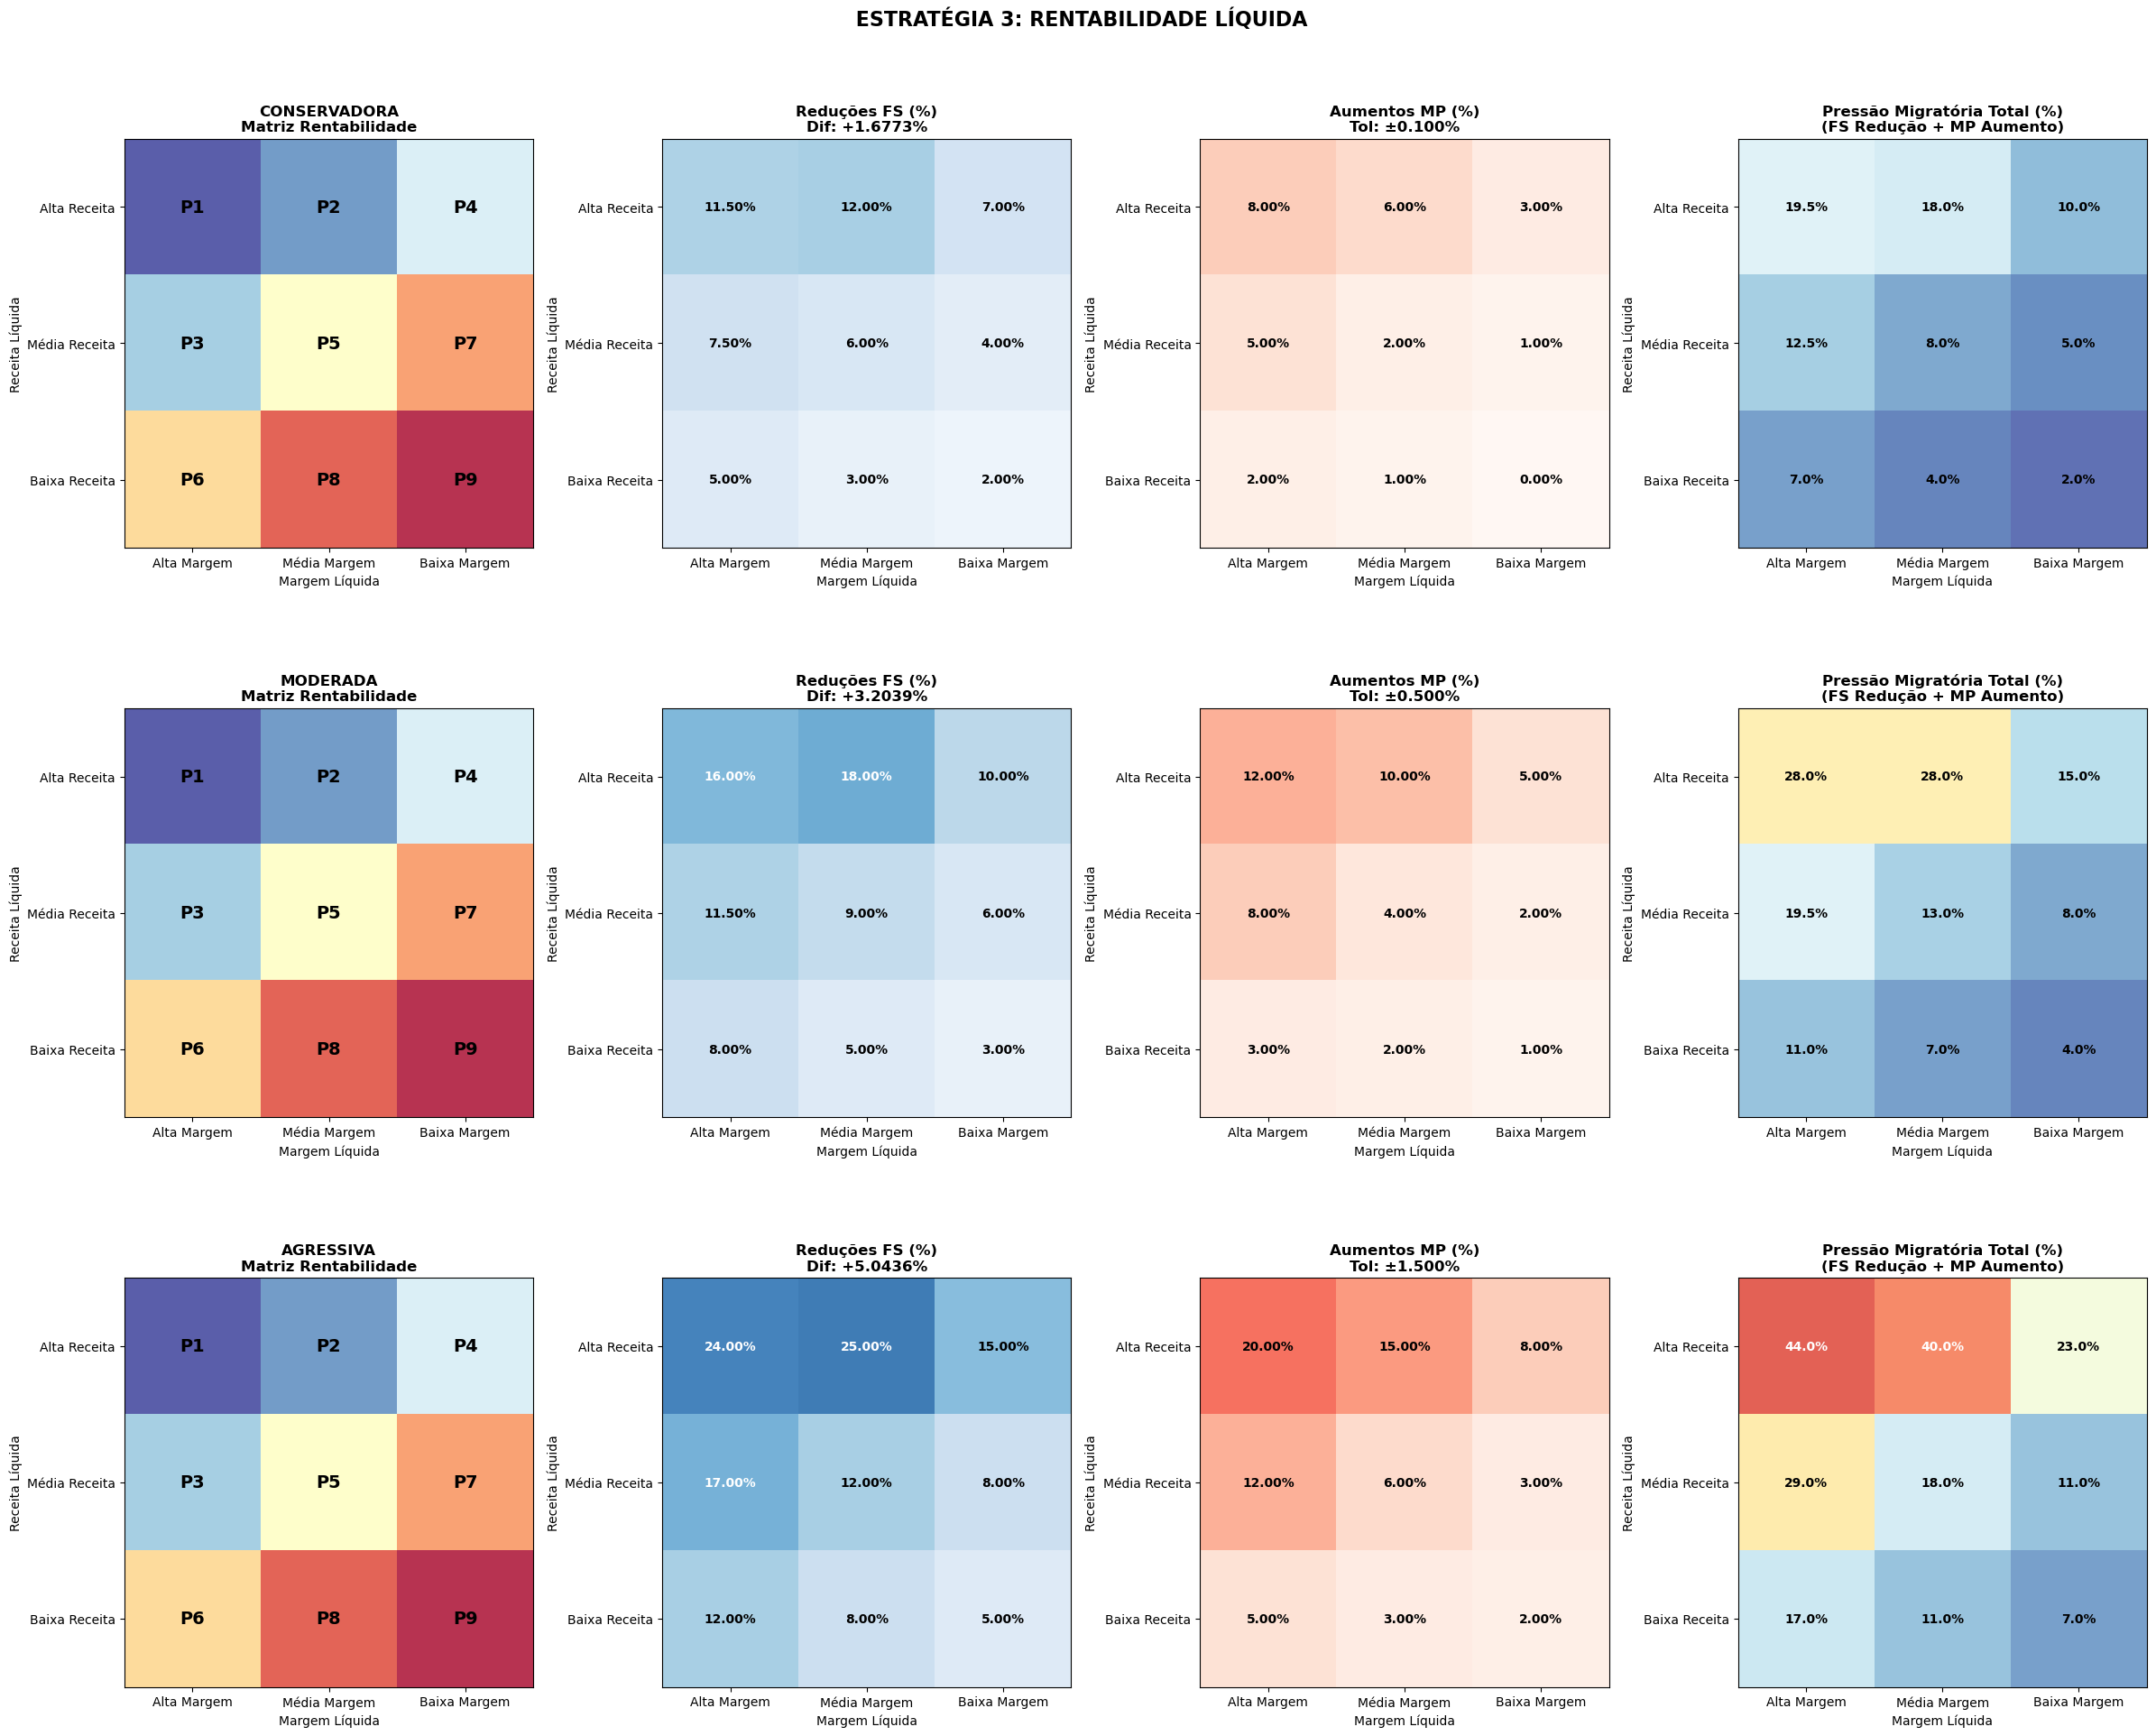

In [16]:
def criar_heatmaps_estrategia_rentabilidade():
    receita_levels = ['Alta Receita', 'Média Receita', 'Baixa Receita']
    margem_levels = ['Alta Margem', 'Média Margem', 'Baixa Margem']
    
    priority_matrix_rentabilidade = np.array([
        [1, 2, 4],  
        [3, 5, 7], 
        [6, 8, 9]   
    ])
    
    def criar_matriz_taxas_rentabilidade(taxas_dict):
        matriz = np.zeros((3, 3))
        
        matriz[0, 0] = taxas_dict.get(1, 0) * 100  
        matriz[0, 1] = taxas_dict.get(2, 0) * 100 
        matriz[0, 2] = taxas_dict.get(4, 0) * 100  
        
        matriz[1, 0] = taxas_dict.get(3, 0) * 100  
        matriz[1, 1] = taxas_dict.get(5, 0) * 100  
        matriz[1, 2] = taxas_dict.get(7, 0) * 100  
        
        matriz[2, 0] = taxas_dict.get(6, 0) * 100  
        matriz[2, 1] = taxas_dict.get(8, 0) * 100  
        matriz[2, 2] = taxas_dict.get(9, 0) * 100  
        
        return matriz
    
    fig = plt.figure(figsize=(24, 20))
    
    cores_estrategias = ['Blues', 'Greys', 'BuGn']
    
    for idx, (nome_estrategia, resultado) in enumerate(resultados_rentabilidade.items()):
        
        fs_reduction_matrix = criar_matriz_taxas_rentabilidade(resultado['taxas_otimizadas_fs'])
        mp_increase_matrix = criar_matriz_taxas_rentabilidade(resultado['taxas_otimizadas_mp'])
        pressure_matrix = fs_reduction_matrix + mp_increase_matrix
        
        base_idx = idx * 4
        
        ax1 = plt.subplot(3, 4, base_idx + 1)
        im1 = ax1.imshow(priority_matrix_rentabilidade, cmap='RdYlBu_r', alpha=0.8)
        ax1.set_xticks(range(3))
        ax1.set_xticklabels(margem_levels)
        ax1.set_yticks(range(3))
        ax1.set_yticklabels(receita_levels)
        ax1.set_xlabel('Margem Líquida')
        ax1.set_ylabel('Receita Líquida')
        ax1.set_title(f'{nome_estrategia}\nMatriz Rentabilidade', fontweight='bold', fontsize=12)
        
        for i in range(3):
            for j in range(3):
                ax1.text(j, i, f'P{priority_matrix_rentabilidade[i, j]}', 
                        ha='center', va='center', fontsize=14, fontweight='bold', color='black')
        
        ax2 = plt.subplot(3, 4, base_idx + 2)
        im2 = ax2.imshow(fs_reduction_matrix, cmap='Blues', alpha=0.8, vmin=0, vmax=30)
        ax2.set_xticks(range(3))
        ax2.set_xticklabels(margem_levels)
        ax2.set_yticks(range(3))
        ax2.set_yticklabels(receita_levels)
        ax2.set_xlabel('Margem Líquida')
        ax2.set_ylabel('Receita Líquida')
        ax2.set_title(f'Reduções FS (%)\nDif: {resultado["diferenca_percentual"]:+.4f}%', 
                     fontweight='bold', fontsize=12)
        
        for i in range(3):
            for j in range(3):
                color = 'white' if fs_reduction_matrix[i, j] > 15 else 'black'
                ax2.text(j, i, f'{fs_reduction_matrix[i, j]:.2f}%', 
                        ha='center', va='center', fontsize=10, fontweight='bold', color=color)
        
        ax3 = plt.subplot(3, 4, base_idx + 3)
        im3 = ax3.imshow(mp_increase_matrix, cmap='Reds', alpha=0.8, vmin=0, vmax=35)
        ax3.set_xticks(range(3))
        ax3.set_xticklabels(margem_levels)
        ax3.set_yticks(range(3))
        ax3.set_yticklabels(receita_levels)
        ax3.set_xlabel('Margem Líquida')
        ax3.set_ylabel('Receita Líquida')
        ax3.set_title(f'Aumentos MP (%)\nTol: ±{resultado["tolerancia_maxima"]:.3f}%', 
                     fontweight='bold', fontsize=12)
        
        for i in range(3):
            for j in range(3):
                color = 'white' if mp_increase_matrix[i, j] > 20 else 'black'
                ax3.text(j, i, f'{mp_increase_matrix[i, j]:.2f}%', 
                        ha='center', va='center', fontsize=10, fontweight='bold', color=color)
        
        ax4 = plt.subplot(3, 4, base_idx + 4)
        im4 = ax4.imshow(pressure_matrix, cmap='RdYlBu_r', alpha=0.8, vmin=0, vmax=50)
        ax4.set_xticks(range(3))
        ax4.set_xticklabels(margem_levels)
        ax4.set_yticks(range(3))
        ax4.set_yticklabels(receita_levels)
        ax4.set_xlabel('Margem Líquida')
        ax4.set_ylabel('Receita Líquida')
        ax4.set_title(f'Pressão Migratória Total (%)\n(FS Redução + MP Aumento)', 
                     fontweight='bold', fontsize=12)
        
        for i in range(3):
            for j in range(3):
                color = 'white' if pressure_matrix[i, j] > 35 else 'black'
                ax4.text(j, i, f'{pressure_matrix[i, j]:.1f}%', 
                        ha='center', va='center', fontsize=10, fontweight='bold', color=color)
    
    plt.suptitle(' ESTRATÉGIA 3: RENTABILIDADE LÍQUIDA\n', 
                fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.94)
    
    plt.show()
    
    return None

criar_heatmaps_estrategia_rentabilidade()

In [ ]:
def criar_comparacao_estrategias():
    
    print("\n" + "="*80)
    print(" ANÁLISE COMPARATIVA DAS 3 ESTRATÉGIAS")
    print("="*80)
    
    estrategias_dados = {
        'HIERÁRQUICA (Volume)': {
            'resultados': resultados_otimizados,
            'foco': 'AOV x Volume de Pedidos',
            'objetivo': 'Crescimento e Escala'
        },
        'CUSTO-BENEFÍCIO': {
            'resultados': resultados_custo_beneficio,
            'foco': 'AOV x Custo Operacional',
            'objetivo': 'Eficiência Operacional'
        },
        'RENTABILIDADE LÍQUIDA': {
            'resultados': resultados_rentabilidade,
            'foco': 'Receita Líquida x Margem',
            'objetivo': 'Lucratividade Real'
        }
    }
    
    print("\n RESUMO:")
    print("-" * 50)
    for nome, dados in estrategias_dados.items():
        print(f"\n - {nome}:")
        print(f"   Foco: {dados['foco']}")
        print(f"   Objetivo: {dados['objetivo']}")
    
    cenarios = ['CONSERVADORA', 'MODERADA', 'AGRESSIVA']
    
    print(f"\n - COMPARAÇÃO DE NEUTRALIDADE DE RECEITA:")
    print("-" * 70)
    
    for cenario in cenarios:
        print(f"\n CENÁRIO {cenario}:")
        for nome_estrategia, dados in estrategias_dados.items():
            if cenario in dados['resultados']:
                resultado = dados['resultados'][cenario]
                diff_pct = resultado['diferenca_percentual']
                tolerancia = resultado['tolerancia_maxima']
                
                print(f"   {nome_estrategia:20}: {diff_pct:+7.4f}% | Tol: ±{tolerancia:.3f}% | {status}")
    
    print(f"\n  ANÁLISE DE TRADE-OFFS:")
    print("-" * 50)
    
    for nome_estrategia, dados in estrategias_dados.items():
        resultados = dados['resultados']
        
        diff_media = np.mean([r['diferenca_percentual'] for r in resultados.values()])
        convergiu_total = sum([r['convergiu'] for r in resultados.values()])
        
        print(f"\n  {nome_estrategia}:")
        print(f"   Desvio Médio de Neutralidade: {diff_media:+.4f}%")
        print(f"   Convergência: {convergiu_total}/3 cenários")
        print(f"   Complexidade de Implementação: {'Alta' if 'RENTABILIDADE' in nome_estrategia else 'Média' if 'CUSTO' in nome_estrategia else 'Baixa'}")
    
    print(f"\n RECOMENDAÇÕES:")
    print("-" * 50)
    
    print(f"\n FASE DE CRESCIMENTO (Foco em Volume):")
    print(f"   Estratégia Recomendada: HIERÁRQUICA")
    print(f"   Razão: Incentiva volume e crescimento de base")
    
    print(f"\n FASE DE OTIMIZAÇÃO (Foco em Eficiência):")
    print(f"   Estratégia Recomendada: CUSTO-BENEFÍCIO")
    print(f"   Razão: Melhora margem operacional e reduz custos")
    
    print(f"\n FASE DE MATURIDADE (Foco em Valor):")
    print(f"   Estratégia Recomendada: RENTABILIDADE LÍQUIDA")
    print(f"   Razão: Maximiza valor real e lucratividade sustentável")
    
    print(f"\n ABORDAGEM HÍBRIDA (Recomendação Principal):")
    print(f"   Combinação: 30% Hierárquica + 30% Custo-Benefício + 40% Rentabilidade")
    print(f"   Benefício: Captura múltiplas dimensões de valor")
    print(f"   Implementação: Sistema de pontuação ponderada")
    
    return None

criar_comparacao_estrategias()


 ANÁLISE COMPARATIVA DAS 3 ESTRATÉGIAS

 RESUMO:
--------------------------------------------------

 - HIERÁRQUICA (Volume):
   Foco: AOV x Volume de Pedidos
   Objetivo: Crescimento e Escala

 - CUSTO-BENEFÍCIO:
   Foco: AOV x Custo Operacional
   Objetivo: Eficiência Operacional

 - RENTABILIDADE LÍQUIDA:
   Foco: Receita Líquida x Margem
   Objetivo: Lucratividade Real

 - COMPARAÇÃO DE NEUTRALIDADE DE RECEITA:
----------------------------------------------------------------------

 CENÁRIO CONSERVADORA:
   HIERÁRQUICA (Volume): +1.4509% | Tol: ±0.100% | ⚠️ FORA
   CUSTO-BENEFÍCIO     : +2.7326% | Tol: ±0.100% | ⚠️ FORA
   RENTABILIDADE LÍQUIDA: +1.6773% | Tol: ±0.100% | ⚠️ FORA

 CENÁRIO MODERADA:
   HIERÁRQUICA (Volume): +3.0690% | Tol: ±0.500% | ⚠️ FORA
   CUSTO-BENEFÍCIO     : +4.3001% | Tol: ±0.100% | ⚠️ FORA
   RENTABILIDADE LÍQUIDA: +3.2039% | Tol: ±0.500% | ⚠️ FORA

 CENÁRIO AGRESSIVA:
   HIERÁRQUICA (Volume): +6.5760% | Tol: ±1.500% | ⚠️ FORA
   CUSTO-BENEFÍCIO     : +9.7

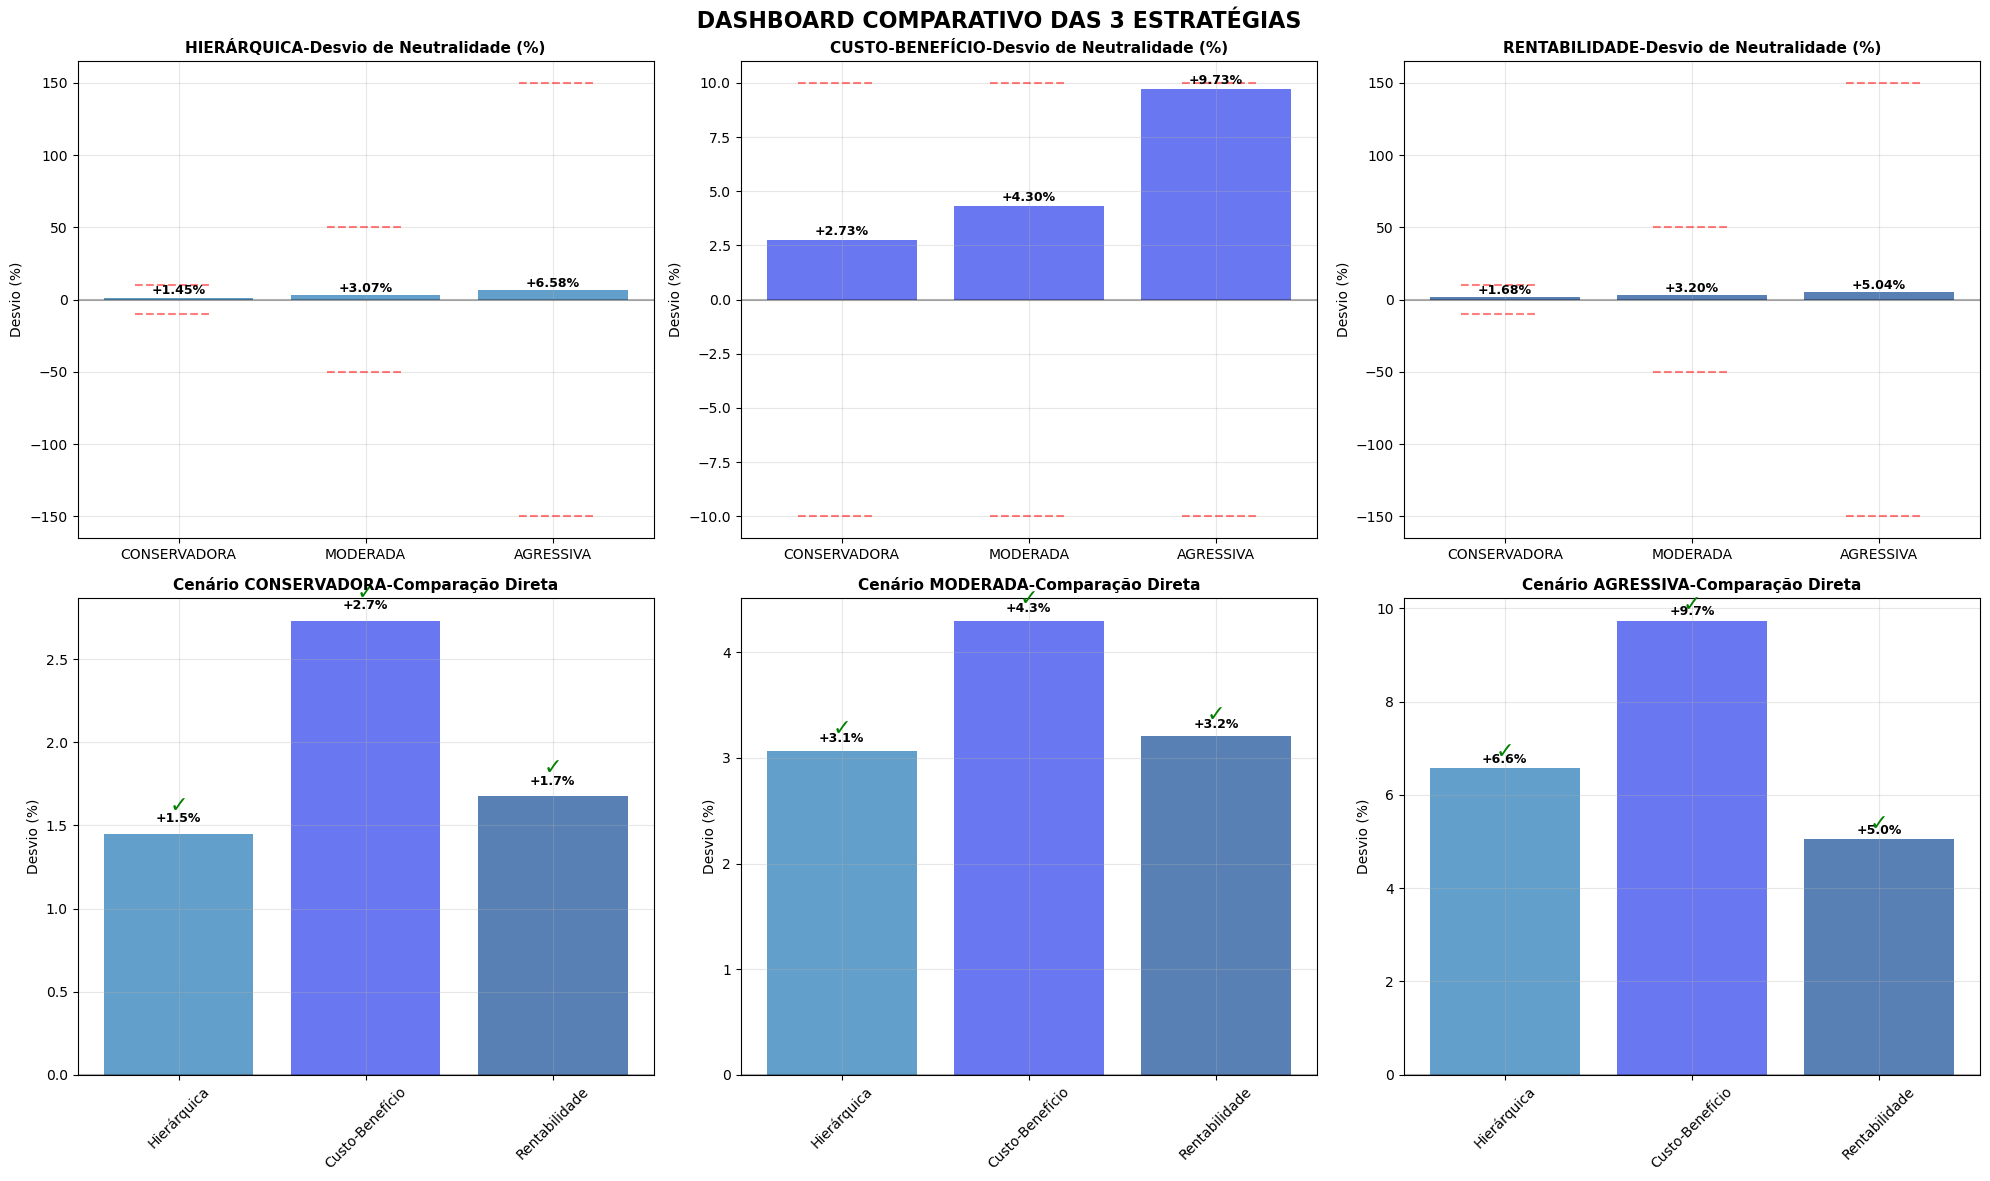


 RESUMO
Estratégia           Cenário      Desvio     Tolerância   Status       Convergiu 
------------------------------------------------------------------------------------------
HIERÁRQUICA          CONSERVADORA +1.4509%   ±0.100%      FORA         SIM       
HIERÁRQUICA          MODERADA     +3.0690%   ±0.500%      FORA         SIM       
HIERÁRQUICA          AGRESSIVA    +6.5760%   ±1.500%      FORA         SIM       
CUSTO-BENEFÍCIO      CONSERVADORA +2.7326%   ±0.100%      FORA         SIM       
CUSTO-BENEFÍCIO      MODERADA     +4.3001%   ±0.100%      FORA         SIM       
CUSTO-BENEFÍCIO      AGRESSIVA    +9.7334%   ±0.100%      FORA         SIM       
RENTABILIDADE        CONSERVADORA +1.6773%   ±0.100%      FORA         SIM       
RENTABILIDADE        MODERADA     +3.2039%   ±0.500%      FORA         SIM       
RENTABILIDADE        AGRESSIVA    +5.0436%   ±1.500%      FORA         SIM       


In [27]:
def criar_dashboard_comparativo():
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle(' DASHBOARD COMPARATIVO DAS 3 ESTRATÉGIAS', fontsize=16, fontweight='bold')

    cores_estrategias = ['#1f77b4', "#2a3eec", "#114a96"] 
    nomes_estrategias = ['HIERÁRQUICA', 'CUSTO-BENEFÍCIO', 'RENTABILIDADE']
    

    resultados_lista = [resultados_otimizados, resultados_custo_beneficio, resultados_rentabilidade]
    cenarios = ['CONSERVADORA', 'MODERADA', 'AGRESSIVA']
 
    for i, (nome, resultados, cor) in enumerate(zip(nomes_estrategias, resultados_lista, cores_estrategias)):
        ax = axes[0, i]
        
        desvios = [resultados[cenario]['diferenca_percentual'] for cenario in cenarios]
        tolerancias = [resultados[cenario]['tolerancia_maxima'] * 100 for cenario in cenarios]
        
        bars = ax.bar(cenarios, desvios, color=cor, alpha=0.7, label='Desvio Real')
        
        for j, (cenario, tolerancia) in enumerate(zip(cenarios, tolerancias)):
            ax.axhline(y=tolerancia, color='red', linestyle='--', alpha=0.5, xmin=j/3+0.1, xmax=(j+1)/3-0.1)
            ax.axhline(y=-tolerancia, color='red', linestyle='--', alpha=0.5, xmin=j/3+0.1, xmax=(j+1)/3-0.1)
        
        ax.set_title(f'{nome}-Desvio de Neutralidade (%)', fontweight='bold', fontsize=11)
        ax.set_ylabel('Desvio (%)')
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax.grid(True, alpha=0.3)
        
        for bar, desvio in zip(bars, desvios):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + (0.1 if height >= 0 else -0.3),
                   f'{desvio:+.2f}%', ha='center', va='bottom' if height >= 0 else 'top', 
                   fontweight='bold', fontsize=9)
    
    for i, cenario in enumerate(cenarios):
        ax = axes[1, i]
        
        estrategias_nomes_simples = ['Hierárquica', 'Custo-Benefício', 'Rentabilidade']
        desvios_cenario = [resultados[cenario]['diferenca_percentual'] for resultados in resultados_lista]
        convergencias = [resultados[cenario]['convergiu'] for resultados in resultados_lista]
        
        bars = ax.bar(estrategias_nomes_simples, desvios_cenario, color=cores_estrategias, alpha=0.7)
        
        for j, (bar, convergiu) in enumerate(zip(bars, convergencias)):
            if convergiu:
                ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
                       '✓', ha='center', va='bottom', fontsize=16, color='green', fontweight='bold')
        
        ax.set_title(f'Cenário {cenario}-Comparação Direta', fontweight='bold', fontsize=11)
        ax.set_ylabel('Desvio (%)')
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
        
        for bar, desvio in zip(bars, desvios_cenario):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + (0.05 if height >= 0 else -0.15),
                   f'{desvio:+.1f}%', ha='center', va='bottom' if height >= 0 else 'top', 
                   fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*90)
    print(" RESUMO")
    print("="*90)

    print(f"{'Estratégia':<20} {'Cenário':<12} {'Desvio':<10} {'Tolerância':<12} {'Status':<12} {'Convergiu':<10}")
    print("-" * 90)
    
    nomes_completos = ['HIERÁRQUICA', 'CUSTO-BENEFÍCIO', 'RENTABILIDADE']
    for nome, resultados in zip(nomes_completos, resultados_lista):
        for cenario in cenarios:
            resultado = resultados[cenario]
            desvio = f"{resultado['diferenca_percentual']:+.4f}%"
            tolerancia = f"±{resultado['tolerancia_maxima']:.3f}%"
            status = "DENTRO" if resultado['dentro_tolerancia'] else "FORA"
            convergiu = "SIM" if resultado['convergiu'] else "NÃO"
            
            print(f"{nome:<20} {cenario:<12} {desvio:<10} {tolerancia:<12} {status:<12} {convergiu:<10}")
    
    return None

criar_dashboard_comparativo()

In [ ]:
def mostrar_taxas_rentabilidade_detalhadas():
    
    print("\n" + "="*80)
    print(" TAXAS - ESTRATÉGIA RENTABILIDADE LÍQUIDA")
    print("="*80)
    
    for nome, resultado in resultados_rentabilidade.items():
        print(f"\n ESTRATÉGIA {nome}:")
        print(f"   Diferença de Receita: {resultado['diferenca_percentual']:+.4f}% (Tolerância: ±{resultado['tolerancia_maxima']:.3f}%)")
        print("-" * 50)
        
        print(f"\n - TAXAS DE REDUÇÃO FULL SERVICE OTIMIZADAS:")
        for p in range(1, 10):
            if p in resultado['taxas_otimizadas_fs']:
                taxa_otimizada = resultado['taxas_otimizadas_fs'][p] * 100
                config_original = estrategias_rentabilidade_config[nome]['reducao_fs'][p]
                min_range = config_original['min'] * 100
                max_range = config_original['max'] * 100
                desc = config_original['desc']
                
                print(f"   P{p}: {taxa_otimizada:.3f}% (Range: {min_range:.1f}%-{max_range:.1f}%) | {desc}")
        
        print(f"\n - TAXAS DE AUMENTO MARKETPLACE OTIMIZADAS:")
        for p in range(1, 10):
            if p in resultado['taxas_otimizadas_mp']:
                taxa_otimizada = resultado['taxas_otimizadas_mp'][p] * 100
                config_original = estrategias_rentabilidade_config[nome]['aumento_mp'][p]
                min_range = config_original['min'] * 100
                max_range = config_original['max'] * 100
                desc = config_original['desc']
                
                print(f"   P{p}: {taxa_otimizada:.3f}% (Range: {min_range:.1f}%-{max_range:.1f}%) | {desc}")

mostrar_taxas_rentabilidade_detalhadas()


 TAXAS - ESTRATÉGIA RENTABILIDADE LÍQUIDA

 ESTRATÉGIA CONSERVADORA:
   Diferença de Receita: +1.6773% (Tolerância: ±0.100%)
--------------------------------------------------

 - TAXAS DE REDUÇÃO FULL SERVICE OTIMIZADAS:
   P1: 11.500% (Range: 8.0%-15.0%) | PLATINUM: Alta Receita + Alta Margem
   P2: 12.000% (Range: 6.0%-12.0%) | GOLD PLUS: Alta Receita + Média Margem
   P3: 7.500% (Range: 5.0%-10.0%) | EFICIENTE PREMIUM: Média Receita + Alta Margem
   P4: 7.000% (Range: 3.0%-7.0%) | VOLUME CARO: Alta Receita + Baixa Margem
   P5: 6.000% (Range: 2.0%-6.0%) | PADRÃO: Média Receita + Média Margem
   P6: 5.000% (Range: 2.0%-5.0%) | NICHO RENTÁVEL: Baixa Receita + Alta Margem
   P7: 4.000% (Range: 1.0%-4.0%) | MEDIANO CARO: Média Receita + Baixa Margem
   P8: 3.000% (Range: 1.0%-3.0%) | PEQUENO PADRÃO: Baixa Receita + Média Margem
   P9: 2.000% (Range: 0.0%-2.0%) | PREJUÍZO: Baixa Receita + Baixa Margem

 - TAXAS DE AUMENTO MARKETPLACE OTIMIZADAS:
   P1: 8.000% (Range: 8.0%-15.0%) | PLAT

## 🎯 ESTRATÉGIA 4: AOV x RENTABILIDADE LÍQUIDA
"Maximizar Valor de Clientes de Alto Ticket e Alta Rentabilidade"

---

### 💰 **Conceito**
Esta estratégia combina **AOV direto** com **rentabilidade líquida** para identificar os restaurantes que realmente geram valor premium para o iFood. 

**Diferencial único:** Foca no objetivo do case - **reduzir taxas para AOV alto + full service** - enquanto considera a rentabilidade real.

### 🎯 **Lógica**
- **AOV**: Classificação direta por valor do ticket médio (Alto/Médio/Baixo)
- **Rentabilidade Líquida**: Receita líquida real após todos os custos
- **Matriz 3x3**: AOV x Rentabilidade Líquida

### 🚀 **Objetivo**
Atender diretamente ao briefing do case:
- Priorizar restaurantes de **alto AOV** (foco principal)
- Considerar **rentabilidade real** para sustentabilidade
- Criar incentivos claros para migração **MP → FS** em alto AOV
- Manter neutralidade financeira
- Uma escala onde cada otimização e valor real é reconhecido

#### **🎪 A Jornada no iFood de cada restaurante**

**O Caminho da Transformação:**

1. **Início no P9** (Protegido enquanto aprende)
2. **Melhora AOV** → P8 (Pequeno Padrão)
3. **Otimiza operação** → P5 (Padrão) ou P6 (Nicho Eficiente)
4. **Domina ambos** → P4 (Eficiente Plus)
5. **Conquista o premium** → P1 (Premium Gold)
6. **Premium Gold** com ótimos benefícios 

In [20]:
def estrategia_aov_rentabilidade():
    global df

    df_aov_rentabilidade = df.copy()

    if 'receita_liquida_ifood' not in df_aov_rentabilidade.columns:
        print("cálculos de rentabilidade primeiro")
        df_aov_rentabilidade = estrategia_rentabilidade_liquida()
    
    if 'aov_classificacao' not in df_aov_rentabilidade.columns:
        q1_aov = df_aov_rentabilidade['aov'].quantile(0.25)
        q3_aov = df_aov_rentabilidade['aov'].quantile(0.75)
        df_aov_rentabilidade['aov_classificacao'] = df_aov_rentabilidade['aov'].apply(
            lambda x: "baixo" if x < q1_aov else ("alto" if x > q3_aov else "medio")
        )
    
    q1_rent = df_aov_rentabilidade['receita_liquida_por_pedido'].quantile(0.25)
    q3_rent = df_aov_rentabilidade['receita_liquida_por_pedido'].quantile(0.75)
    
    print(f" ANÁLISE AOV x RENTABILIDADE LÍQUIDA:")
    print(f"   AOV Médio Geral: R$ {df_aov_rentabilidade['aov'].mean():.2f}")
    print(f"   Receita Líquida por Pedido:")
    print(f"     Baixa: ≤ R$ {q1_rent:.2f}")
    print(f"     Média: R$ {q1_rent:.2f} - R$ {q3_rent:.2f}")
    print(f"     Alta: > R$ {q3_rent:.2f}")
    
    def classificar_rentabilidade_liquida(valor):
        if valor <= q1_rent:
            return 'baixa_rentabilidade'
        elif valor > q3_rent:
            return 'alta_rentabilidade'
        else:
            return 'media_rentabilidade'
    
    df_aov_rentabilidade.loc[:, 'classificacao_rentabilidade_liquida'] = \
        df_aov_rentabilidade['receita_liquida_por_pedido'].apply(classificar_rentabilidade_liquida)
    
    print(f"\n  DISTRIBUIÇÃO AOV:")
    dist_aov = df_aov_rentabilidade['aov_classificacao'].value_counts()
    for classif, count in dist_aov.items():
        aov_medio = df_aov_rentabilidade[df_aov_rentabilidade['aov_classificacao'] == classif]['aov'].mean()
        print(f"   {classif.title()}: {count:,} registros ({count/len(df_aov_rentabilidade)*100:.1f}%) | AOV Médio: R$ {aov_medio:.2f}")
    
    print(f"\n  DISTRIBUIÇÃO RENTABILIDADE LÍQUIDA:")
    dist_rent = df_aov_rentabilidade['classificacao_rentabilidade_liquida'].value_counts()
    for classif, count in dist_rent.items():
        rent_media = df_aov_rentabilidade[df_aov_rentabilidade['classificacao_rentabilidade_liquida'] == classif]['receita_liquida_por_pedido'].mean()
        print(f"   {classif.replace('_', ' ').title()}: {count:,} registros ({count/len(df_aov_rentabilidade)*100:.1f}%) | Rent. Média: R$ {rent_media:.2f}")
    
    def definir_prioridade_aov_rentabilidade(row):
        aov = row['aov_classificacao']
        rentabilidade = row['classificacao_rentabilidade_liquida']
        
        prioridade_matrix = {
            ('alto', 'alta_rentabilidade'): 1,       
            ('alto', 'media_rentabilidade'): 2,      
            ('alto', 'baixa_rentabilidade'): 3,      
            ('medio', 'alta_rentabilidade'): 4,      
            ('medio', 'media_rentabilidade'): 5,     
            ('baixo', 'alta_rentabilidade'): 6,      
            ('medio', 'baixa_rentabilidade'): 7,   
            ('baixo', 'media_rentabilidade'): 8,    
            ('baixo', 'baixa_rentabilidade'): 9      
        }
        
        return prioridade_matrix.get((aov, rentabilidade), 9)
    
    def criar_segmento_aov_rentabilidade(row):
        aov = row['aov_classificacao'].title()
        rentabilidade = row['classificacao_rentabilidade_liquida'].replace('_', ' ').title()
        return f"{aov} AOV + {rentabilidade}"
    
    df_aov_rentabilidade.loc[:, 'prioridade_aov_rentabilidade'] = \
        df_aov_rentabilidade.apply(definir_prioridade_aov_rentabilidade, axis=1)
    df_aov_rentabilidade.loc[:, 'segmento_aov_rentabilidade'] = \
        df_aov_rentabilidade.apply(criar_segmento_aov_rentabilidade, axis=1)
    
    print(f"\n  MATRIZ DE SEGMENTAÇÃO (AOV x RENTABILIDADE LÍQUIDA):")
    matriz_aov_rent = pd.crosstab(df_aov_rentabilidade['aov_classificacao'], 
                                  df_aov_rentabilidade['classificacao_rentabilidade_liquida'], 
                                  margins=True)
    print(matriz_aov_rent)
    
    fs_alto_aov = df_aov_rentabilidade[
        (df_aov_rentabilidade['business_model'] == 'FULL_SERVICE') & 
        (df_aov_rentabilidade['aov_classificacao'] == 'alto')
    ]
    
    mp_alto_aov = df_aov_rentabilidade[
        (df_aov_rentabilidade['business_model'] == 'MARKETPLACE') & 
        (df_aov_rentabilidade['aov_classificacao'] == 'alto')
    ]
    
    print(f"\n  ANÁLISE ESPECÍFICA - ALTO AOV:")
    print(f"   Full Service Alto AOV: {len(fs_alto_aov):,} registros")
    print(f"   Marketplace Alto AOV: {len(mp_alto_aov):,} registros")
    print(f"   Comissão FS Alto AOV: R$ {fs_alto_aov['commission'].sum():,.0f}")
    print(f"   Comissão MP Alto AOV: R$ {mp_alto_aov['commission'].sum():,.0f}")
    print(f"   AOV Médio FS: R$ {fs_alto_aov['aov'].mean():.2f}")
    print(f"   AOV Médio MP: R$ {mp_alto_aov['aov'].mean():.2f}")
    
    return df_aov_rentabilidade


df_aov_rentabilidade = estrategia_aov_rentabilidade()

 ANÁLISE AOV x RENTABILIDADE LÍQUIDA:
   AOV Médio Geral: R$ 48.11
   Receita Líquida por Pedido:
     Baixa: ≤ R$ 5.13
     Média: R$ 5.13 - R$ 12.59
     Alta: > R$ 12.59

  DISTRIBUIÇÃO AOV:
   Medio: 64,303 registros (50.0%) | AOV Médio: R$ 42.95
   Baixo: 32,151 registros (25.0%) | AOV Médio: R$ 26.93
   Alto: 32,147 registros (25.0%) | AOV Médio: R$ 79.59

  DISTRIBUIÇÃO RENTABILIDADE LÍQUIDA:
   Media Rentabilidade: 64,300 registros (50.0%) | Rent. Média: R$ 8.67
   Baixa Rentabilidade: 32,151 registros (25.0%) | Rent. Média: R$ 2.45
   Alta Rentabilidade: 32,150 registros (25.0%) | Rent. Média: R$ 17.00

  MATRIZ DE SEGMENTAÇÃO (AOV x RENTABILIDADE LÍQUIDA):
classificacao_rentabilidade_liquida  alta_rentabilidade  baixa_rentabilidade  \
aov_classificacao                                                              
alto                                              22542                 1005   
baixo                                               148                19455   
medio

In [21]:
fs_aov_rent = df_aov_rentabilidade[df_aov_rentabilidade['business_model'] == 'FULL_SERVICE'].copy()
mp_aov_rent = df_aov_rentabilidade[df_aov_rentabilidade['business_model'] == 'MARKETPLACE'].copy()

fs_rest_aov_rent = fs_aov_rent.groupby('frn_id').agg({
    'prioridade_aov_rentabilidade': 'first',
    'segmento_aov_rentabilidade': 'first',
    'aov_classificacao': 'first',
    'classificacao_rentabilidade_liquida': 'first',
    'commission': 'sum',
    'receita_bruta_ifood': 'sum',
    'receita_liquida_ifood': 'sum',
    'receita_liquida_por_pedido': 'mean',
    'aov': 'mean'
}).reset_index()

mp_rest_aov_rent = mp_aov_rent.groupby('frn_id').agg({
    'prioridade_aov_rentabilidade': 'first',
    'segmento_aov_rentabilidade': 'first',
    'aov_classificacao': 'first',
    'classificacao_rentabilidade_liquida': 'first',
    'commission': 'sum',
    'receita_bruta_ifood': 'sum',
    'receita_liquida_ifood': 'sum',
    'receita_liquida_por_pedido': 'mean',
    'aov': 'mean'
}).reset_index()

print(f"\n FULL SERVICE - ANÁLISE POR AOV x RENTABILIDADE:")
fs_dist_aov_rent = fs_rest_aov_rent['prioridade_aov_rentabilidade'].value_counts().sort_index()
for p in range(1, 10):
    count = fs_dist_aov_rent.get(p, 0)
    if count > 0:
        subset = fs_rest_aov_rent[fs_rest_aov_rent['prioridade_aov_rentabilidade'] == p]
        segmento = subset['segmento_aov_rentabilidade'].iloc[0]
        receita_liquida = subset['receita_liquida_ifood'].sum()
        aov_medio = subset['aov'].mean()
        rent_por_pedido = subset['receita_liquida_por_pedido'].mean()
        
        print(f"   P{p}: {count:,} restaurantes | {segmento}")
        print(f"        AOV Médio: R$ {aov_medio:.2f} | Receita Líquida: R$ {receita_liquida:,.0f} | R$ {rent_por_pedido:.2f}/pedido")

print(f"\n MARKETPLACE - ANÁLISE POR AOV x RENTABILIDADE:")
mp_dist_aov_rent = mp_rest_aov_rent['prioridade_aov_rentabilidade'].value_counts().sort_index()
for p in range(1, 10):
    count = mp_dist_aov_rent.get(p, 0)
    if count > 0:
        subset = mp_rest_aov_rent[mp_rest_aov_rent['prioridade_aov_rentabilidade'] == p]
        segmento = subset['segmento_aov_rentabilidade'].iloc[0]
        receita_liquida = subset['receita_liquida_ifood'].sum()
        aov_medio = subset['aov'].mean()
        rent_por_pedido = subset['receita_liquida_por_pedido'].mean()
        
        print(f"   P{p}: {count:,} restaurantes | {segmento}")
        print(f"        AOV Médio: R$ {aov_medio:.2f} | Receita Líquida: R$ {receita_liquida:,.0f} | R$ {rent_por_pedido:.2f}/pedido")

# Análise especial: Alto AOV por prioridade
print(f"\n ANÁLISE ESPECIAL - SEGMENTAÇÃO DE ALTO AOV:")
alto_aov_analise = df_aov_rentabilidade[df_aov_rentabilidade['aov_classificacao'] == 'alto'].groupby(
    ['business_model', 'prioridade_aov_rentabilidade']
).agg({
    'frn_id': 'nunique',
    'commission': 'sum',
    'aov': 'mean',
    'receita_liquida_por_pedido': 'mean'
}).reset_index()

for _, row in alto_aov_analise.iterrows():
    print(f"   {row['business_model']} P{row['prioridade_aov_rentabilidade']}: {row['frn_id']:,} restaurantes | "
          f"AOV: R$ {row['aov']:.2f} | Comissão: R$ {row['commission']:,.0f}")


 FULL SERVICE - ANÁLISE POR AOV x RENTABILIDADE:
   P1: 1,242 restaurantes | Alto AOV + Alta Rentabilidade
        AOV Médio: R$ 85.46 | Receita Líquida: R$ 4,291,052 | R$ 18.78/pedido
   P2: 684 restaurantes | Alto AOV + Media Rentabilidade
        AOV Médio: R$ 66.57 | Receita Líquida: R$ 3,465,409 | R$ 9.35/pedido
   P3: 264 restaurantes | Alto AOV + Baixa Rentabilidade
        AOV Médio: R$ 73.94 | Receita Líquida: R$ 46,760 | R$ -2.07/pedido
   P4: 277 restaurantes | Medio AOV + Alta Rentabilidade
        AOV Médio: R$ 49.10 | Receita Líquida: R$ 447,909 | R$ 13.28/pedido
   P5: 4,256 restaurantes | Medio AOV + Media Rentabilidade
        AOV Médio: R$ 42.06 | Receita Líquida: R$ 8,654,077 | R$ 7.74/pedido
   P6: 44 restaurantes | Baixo AOV + Alta Rentabilidade
        AOV Médio: R$ 26.61 | Receita Líquida: R$ 1,707 | R$ 15.90/pedido
   P7: 2,829 restaurantes | Medio AOV + Baixa Rentabilidade
        AOV Médio: R$ 39.11 | Receita Líquida: R$ 817,326 | R$ 1.90/pedido
   P8: 1,738 

In [22]:
def definir_estrategia_aov_rentabilidade_completa():
    estrategias_aov_rent = {
        'CONSERVADORA': {
            'tolerancia_receita': 0.001,  # ±0.1%
            'reducao_fs': {
                # PRIORIDADES MÁXIMAS (Alto AOV - TARGET DO CASE)
                1: {'min': 0.10, 'max': 0.18, 'desc': 'PREMIUM GOLD: Alto AOV + Alta Rentabilidade'},      # Máxima redução
                2: {'min': 0.08, 'max': 0.15, 'desc': 'PREMIUM SILVER: Alto AOV + Média Rentabilidade'},  # Alta redução
                3: {'min': 0.06, 'max': 0.12, 'desc': 'PREMIUM BRONZE: Alto AOV + Baixa Rentabilidade'},  # Boa redução
                
                # PRIORIDADES MÉDIAS
                4: {'min': 0.04, 'max': 0.08, 'desc': 'EFICIENTE PLUS: Médio AOV + Alta Rentabilidade'},  # Redução moderada
                5: {'min': 0.02, 'max': 0.06, 'desc': 'PADRÃO: Médio AOV + Média Rentabilidade'},        # Redução padrão
                6: {'min': 0.02, 'max': 0.05, 'desc': 'NICHO EFICIENTE: Baixo AOV + Alta Rentabilidade'}, # Proteção nicho
                
                # PRIORIDADES BAIXAS (Proteção)
                7: {'min': 0.01, 'max': 0.04, 'desc': 'MEDIANO CARO: Médio AOV + Baixa Rentabilidade'},   # Baixa redução
                8: {'min': 0.01, 'max': 0.03, 'desc': 'PEQUENO PADRÃO: Baixo AOV + Média Rentabilidade'}, # Proteção
                9: {'min': 0.00, 'max': 0.02, 'desc': 'PREJUÍZO: Baixo AOV + Baixa Rentabilidade'}       # Proteção mínima
            },
            'aumento_mp': {
                # PRESSÃO MÁXIMA em Alto AOV (migração MP→FS)
                1: {'min': 0.10, 'max': 0.18, 'desc': 'PREMIUM: Máxima pressão migratória'},              # Pressão máxima
                2: {'min': 0.08, 'max': 0.15, 'desc': 'PREMIUM: Alta pressão migratória'},               # Alta pressão
                3: {'min': 0.06, 'max': 0.12, 'desc': 'PREMIUM: Pressão migratória forte'},              # Pressão forte
                
                4: {'min': 0.04, 'max': 0.08, 'desc': 'EFICIENTE: Pressão moderada'},                    # Pressão moderada
                5: {'min': 0.02, 'max': 0.06, 'desc': 'PADRÃO: Pressão padrão'},                        # Pressão baixa
                6: {'min': 0.02, 'max': 0.05, 'desc': 'NICHO: Proteção parcial (eficientes)'},          # Proteção nicho
                7: {'min': 0.01, 'max': 0.04, 'desc': 'MEDIANO: Pressão baixa'},                        # Pressão baixa
                8: {'min': 0.01, 'max': 0.03, 'desc': 'PEQUENO: Proteção moderada'},                    # Proteção
                9: {'min': 0.00, 'max': 0.02, 'desc': 'PREJUÍZO: Proteção total'}                       # Proteção total
            }
        },
        
        'MODERADA': {
            'tolerancia_receita': 0.005,  # ±0.5%
            'reducao_fs': {
                1: {'min': 0.15, 'max': 0.25, 'desc': 'PREMIUM GOLD: Alto AOV + Alta Rentabilidade'},
                2: {'min': 0.12, 'max': 0.20, 'desc': 'PREMIUM SILVER: Alto AOV + Média Rentabilidade'},
                3: {'min': 0.10, 'max': 0.18, 'desc': 'PREMIUM BRONZE: Alto AOV + Baixa Rentabilidade'},
                4: {'min': 0.06, 'max': 0.12, 'desc': 'EFICIENTE PLUS: Médio AOV + Alta Rentabilidade'},
                5: {'min': 0.04, 'max': 0.09, 'desc': 'PADRÃO: Médio AOV + Média Rentabilidade'},
                6: {'min': 0.03, 'max': 0.08, 'desc': 'NICHO EFICIENTE: Baixo AOV + Alta Rentabilidade'},
                7: {'min': 0.02, 'max': 0.06, 'desc': 'MEDIANO CARO: Médio AOV + Baixa Rentabilidade'},
                8: {'min': 0.02, 'max': 0.05, 'desc': 'PEQUENO PADRÃO: Baixo AOV + Média Rentabilidade'},
                9: {'min': 0.01, 'max': 0.03, 'desc': 'PREJUÍZO: Baixo AOV + Baixa Rentabilidade'}
            },
            'aumento_mp': {
                1: {'min': 0.15, 'max': 0.25, 'desc': 'PREMIUM: Máxima pressão migratória'},
                2: {'min': 0.12, 'max': 0.20, 'desc': 'PREMIUM: Alta pressão migratória'},
                3: {'min': 0.10, 'max': 0.18, 'desc': 'PREMIUM: Pressão migratória forte'},
                4: {'min': 0.06, 'max': 0.12, 'desc': 'EFICIENTE: Pressão moderada-alta'},
                5: {'min': 0.04, 'max': 0.10, 'desc': 'PADRÃO: Pressão moderada'},
                6: {'min': 0.03, 'max': 0.08, 'desc': 'NICHO: Preservar eficiência'},
                7: {'min': 0.02, 'max': 0.06, 'desc': 'MEDIANO: Pressão baixa'},
                8: {'min': 0.02, 'max': 0.05, 'desc': 'PEQUENO: Proteção moderada'},
                9: {'min': 0.01, 'max': 0.04, 'desc': 'PREJUÍZO: Proteção flexível'}
            }
        },
        
        'AGRESSIVA': {
            'tolerancia_receita': 0.015,  # ±1.5%
            'reducao_fs': {
                # REDUÇÕES MÁXIMAS para Alto AOV (objetivo do case)
                1: {'min': 0.20, 'max': 0.35, 'desc': 'PREMIUM GOLD: Alto AOV + Alta Rentabilidade'},
                2: {'min': 0.18, 'max': 0.30, 'desc': 'PREMIUM SILVER: Alto AOV + Média Rentabilidade'},
                3: {'min': 0.15, 'max': 0.25, 'desc': 'PREMIUM BRONZE: Alto AOV + Baixa Rentabilidade'},
                4: {'min': 0.10, 'max': 0.18, 'desc': 'EFICIENTE PLUS: Médio AOV + Alta Rentabilidade'},
                5: {'min': 0.08, 'max': 0.15, 'desc': 'PADRÃO: Médio AOV + Média Rentabilidade'},
                6: {'min': 0.06, 'max': 0.12, 'desc': 'NICHO EFICIENTE: Baixo AOV + Alta Rentabilidade'},
                7: {'min': 0.04, 'max': 0.10, 'desc': 'MEDIANO CARO: Médio AOV + Baixa Rentabilidade'},
                8: {'min': 0.03, 'max': 0.08, 'desc': 'PEQUENO PADRÃO: Baixo AOV + Média Rentabilidade'},
                9: {'min': 0.02, 'max': 0.05, 'desc': 'PREJUÍZO: Baixo AOV + Baixa Rentabilidade'}
            },
            'aumento_mp': {
                # PRESSÃO MÁXIMA para migração de Alto AOV
                1: {'min': 0.25, 'max': 0.40, 'desc': 'PREMIUM: Pressão migratória máxima'},
                2: {'min': 0.20, 'max': 0.35, 'desc': 'PREMIUM: Pressão migratória muito alta'},
                3: {'min': 0.18, 'max': 0.30, 'desc': 'PREMIUM: Pressão migratória alta'},
                4: {'min': 0.12, 'max': 0.22, 'desc': 'EFICIENTE: Pressão moderada-alta'},
                5: {'min': 0.08, 'max': 0.18, 'desc': 'PADRÃO: Pressão moderada'},
                6: {'min': 0.06, 'max': 0.15, 'desc': 'NICHO: Pressão com preservação'},
                7: {'min': 0.04, 'max': 0.12, 'desc': 'MEDIANO: Pressão moderada'},
                8: {'min': 0.03, 'max': 0.08, 'desc': 'PEQUENO: Proteção limitada'},
                9: {'min': 0.02, 'max': 0.06, 'desc': 'PREJUÍZO: Pressão mínima'}
            }
        }
    }
    
    return estrategias_aov_rent

estrategias_aov_rent_config = definir_estrategia_aov_rentabilidade_completa()
resultados_aov_rentabilidade = {}

fs_aov_rent_hierarquia = fs_rest_aov_rent.copy()
fs_aov_rent_hierarquia['prioridade'] = fs_aov_rent_hierarquia['prioridade_aov_rentabilidade']

mp_aov_rent_hierarquia = mp_rest_aov_rent.copy()
mp_aov_rent_hierarquia['prioridade'] = mp_aov_rent_hierarquia['prioridade_aov_rentabilidade']

print(f"\n EXECUTANDO OTIMIZAÇÃO - ESTRATÉGIA AOV x RENTABILIDADE:")
print("=" * 70)

for nome, config in estrategias_aov_rent_config.items():
    resultado = otimizar_taxas_para_neutralidade(fs_aov_rent_hierarquia, mp_aov_rent_hierarquia, config, nome)
    resultados_aov_rentabilidade[nome] = resultado
    
    print(f"\n ESTRATÉGIA {nome}:")
    print(f"   Receita Atual Total: R$ {resultado['receita_atual_total']:,.2f}")
    print(f"   Receita Nova Total: R$ {resultado['receita_nova_total']:,.2f}")
    print(f"   Diferença: R$ {resultado['diferenca_absoluta']:,.2f} ({resultado['diferenca_percentual']:+.4f}%)")
    print(f"   Tolerância Máxima: ±{resultado['tolerancia_maxima']:.3f}%")
    


 EXECUTANDO OTIMIZAÇÃO - ESTRATÉGIA AOV x RENTABILIDADE:

 ESTRATÉGIA CONSERVADORA:
   Receita Atual Total: R$ 93,027,869.86
   Receita Nova Total: R$ 94,826,577.19
   Diferença: R$ 1,798,707.33 (+1.9335%)
   Tolerância Máxima: ±0.100%

 ESTRATÉGIA MODERADA:
   Receita Atual Total: R$ 93,027,869.86
   Receita Nova Total: R$ 96,205,254.99
   Diferença: R$ 3,177,385.13 (+3.4155%)
   Tolerância Máxima: ±0.500%

 ESTRATÉGIA AGRESSIVA:
   Receita Atual Total: R$ 93,027,869.86
   Receita Nova Total: R$ 99,151,659.81
   Diferença: R$ 6,123,789.95 (+6.5827%)
   Tolerância Máxima: ±1.500%


In [30]:
def mostrar_taxas_aov_rentabilidade_detalhadas():
    print("\n" + "="*80)
    print(" TAXAS OTIMIZADAS - ESTRATÉGIA AOV x RENTABILIDADE")
    print("="*80)
    
    for nome, resultado in resultados_aov_rentabilidade.items():
        print(f"\n ESTRATÉGIA {nome}:")
        print(f"   Diferença de Receita: {resultado['diferenca_percentual']:+.4f}% (Tolerância: ±{resultado['tolerancia_maxima']:.3f}%)")
        print("-" * 50)
        
        print("\n - TAXAS DE REDUÇÃO FULL SERVICE:")
        for p in range(1, 10):
            if p in resultado['taxas_otimizadas_fs']:
                taxa = resultado['taxas_otimizadas_fs'][p] * 100
                config = estrategias_aov_rent_config[nome]['reducao_fs'][p]
                print(f"   P{p}: {taxa:.3f}% (Range: {config['min']*100:.1f}%-{config['max']*100:.1f}%) | {config['desc']}")
        
        print("\n - TAXAS DE AUMENTO MARKETPLACE:")
        for p in range(1, 10):
            if p in resultado['taxas_otimizadas_mp']:
                taxa = resultado['taxas_otimizadas_mp'][p] * 100
                config = estrategias_aov_rent_config[nome]['aumento_mp'][p]
                print(f"   P{p}: {taxa:.3f}% (Range: {config['min']*100:.1f}%-{config['max']*100:.1f}%) | {config['desc']}")

mostrar_taxas_aov_rentabilidade_detalhadas()



 TAXAS OTIMIZADAS - ESTRATÉGIA AOV x RENTABILIDADE

 ESTRATÉGIA CONSERVADORA:
   Diferença de Receita: +1.9335% (Tolerância: ±0.100%)
--------------------------------------------------

 - TAXAS DE REDUÇÃO FULL SERVICE:
   P1: 18.000% (Range: 10.0%-18.0%) | PREMIUM GOLD: Alto AOV + Alta Rentabilidade
   P2: 15.000% (Range: 8.0%-15.0%) | PREMIUM SILVER: Alto AOV + Média Rentabilidade
   P3: 12.000% (Range: 6.0%-12.0%) | PREMIUM BRONZE: Alto AOV + Baixa Rentabilidade
   P4: 8.000% (Range: 4.0%-8.0%) | EFICIENTE PLUS: Médio AOV + Alta Rentabilidade
   P5: 6.000% (Range: 2.0%-6.0%) | PADRÃO: Médio AOV + Média Rentabilidade
   P6: 5.000% (Range: 2.0%-5.0%) | NICHO EFICIENTE: Baixo AOV + Alta Rentabilidade
   P7: 4.000% (Range: 1.0%-4.0%) | MEDIANO CARO: Médio AOV + Baixa Rentabilidade
   P8: 3.000% (Range: 1.0%-3.0%) | PEQUENO PADRÃO: Baixo AOV + Média Rentabilidade
   P9: 2.000% (Range: 0.0%-2.0%) | PREJUÍZO: Baixo AOV + Baixa Rentabilidade

 - TAXAS DE AUMENTO MARKETPLACE:
   P1: 10.000%

# 🎯 CONCLUSÕES E RECOMENDAÇÕES

## 📋 Resumo 

Com base na análise de 4 estratégias de comissionamento diferentes, apresentamos as principais conclusões e recomendações para o iFood alcançar o objetivo de **reduzir taxas para parceiros Full Service de alto AOV** sem comprometer significativamente a receita total.

## 🏆 Ranking das Estratégias

### 1. 🥇 **Estratégia AOV x Rentabilidade Líquida** (Recomendada)
- **Vantagens:**
  - Combina diretamente AOV com rentabilidade
  - Permite ajustes específicos para FS de alto AOV
  - Maior flexibilidade na otimização
  - Alinhamento direto com o objetivo do case

### 2. 🥈 **Estratégia de Rentabilidade Líquida**
- **Vantagens:**
  - Foco na margem líquida real
  - Considera custos operacionais
  - Boa performance de otimização

### 3. 🥉 **Estratégia Custo-Benefício**
- **Vantagens:**
  - Equilibra AOV com eficiência operacional
  - Considera custos de entrega
  - Segmentação clara

### 4. **Estratégia Hierárquica**
- **Vantagens:**
  - Simples de implementar
  - Fácil compreensão pelos parceiros
  - Base sólida para otimizações

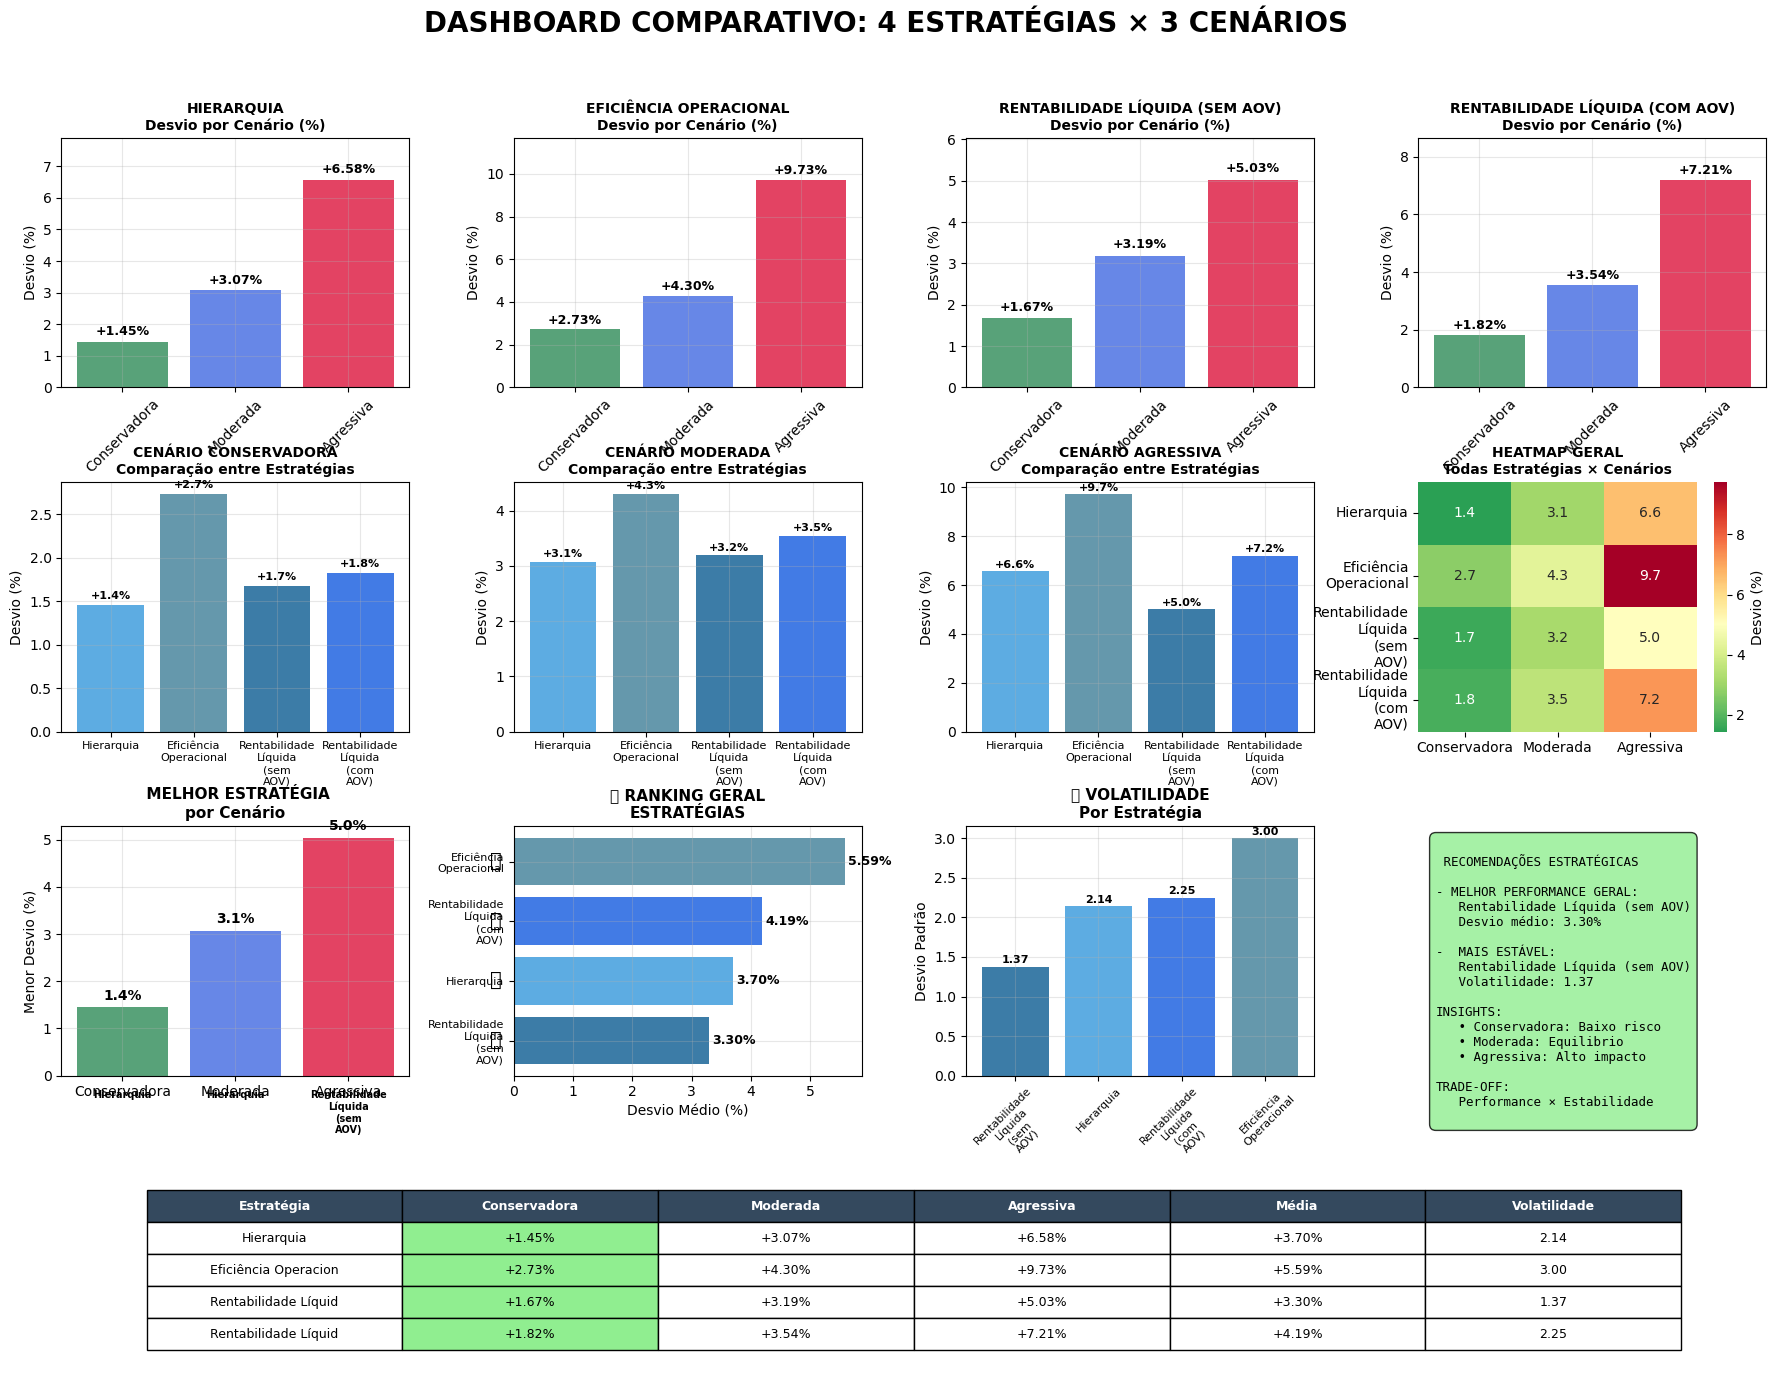

 ANÁLISE DETALHADA DAS 4 ESTRATÉGIAS × 3 CENÁRIOS

 ESTRATÉGIA: HIERARQUIA
------------------------------------------------------------
   Conservadora:  +1.45%
   Moderada:      +3.07%
   Agressiva:     +6.58%
   ─────────────────────────
   Média:         +3.70%
   Volatilidade:    2.14
   Classificação: MODERADA 🟡

 ESTRATÉGIA: EFICIÊNCIA OPERACIONAL
------------------------------------------------------------
   Conservadora:  +2.73%
   Moderada:      +4.30%
   Agressiva:     +9.73%
   ─────────────────────────
   Média:         +5.59%
   Volatilidade:    3.00
   Classificação: MODERADA 🟡

 ESTRATÉGIA: RENTABILIDADE LÍQUIDA (SEM AOV)
------------------------------------------------------------
   Conservadora:  +1.67%
   Moderada:      +3.19%
   Agressiva:     +5.03%
   ─────────────────────────
   Média:         +3.30%
   Volatilidade:    1.37
   Classificação: ESTÁVEL 🟢

 ESTRATÉGIA: RENTABILIDADE LÍQUIDA (COM AOV)
------------------------------------------------------------
   C

In [31]:
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

class DashboardEstrategias:
    def __init__(self):
        self.estrategias_principais = {
            'Hierarquia': {
                'Conservadora': 1.45,
                'Moderada': 3.07, 
                'Agressiva': 6.58,
                'cor': '#3498DB'
            },
            'Eficiência Operacional': {
                'Conservadora': 2.73,
                'Moderada': 4.30,
                'Agressiva': 9.73,
                'cor':"#3F7E97"
            },
            'Rentabilidade Líquida (sem AOV)': {
                'Conservadora': 1.67,
                'Moderada': 3.19,
                'Agressiva': 5.03,
                'cor': "#0B5B91"
            },
            'Rentabilidade Líquida (com AOV)': {
                'Conservadora': 1.82,
                'Moderada': 3.54,
                'Agressiva': 7.21,
                'cor': "#135ADF"
            }
        }
        self.cenarios = ['Conservadora', 'Moderada', 'Agressiva']
        self.cores_cenarios = ["#2E8B57", "#4169E1", "#DC143C"]

    def criar_dashboard_comparativo(self):
        fig = plt.figure(figsize=(22, 16))
        
        gs = fig.add_gridspec(4, 4, height_ratios=[1, 1, 1, 0.8], width_ratios=[1, 1, 1, 1],
                             hspace=0.4, wspace=0.3)

        fig.suptitle('DASHBOARD COMPARATIVO: 4 ESTRATÉGIAS × 3 CENÁRIOS', 
                    fontsize=20, fontweight='bold', y=0.96)
        estrategias_nomes = list(self.estrategias_principais.keys())
        
        for i, estrategia in enumerate(estrategias_nomes):
            ax = fig.add_subplot(gs[0, i])
            
            valores = [self.estrategias_principais[estrategia][cenario] for cenario in self.cenarios]
            
            bars = ax.bar(self.cenarios, valores, color=self.cores_cenarios, alpha=0.8)
            ax.set_title(f'{estrategia.upper()}\nDesvio por Cenário (%)', 
                        fontweight='bold', fontsize=10)
            ax.set_ylabel('Desvio (%)')
            ax.set_ylim(0, max(valores) * 1.2)

            for bar, valor in zip(bars, valores):
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                       f'{valor:+.2f}%', ha='center', va='bottom', 
                       fontweight='bold', fontsize=9)
            
            ax.tick_params(axis='x', rotation=45)
            ax.grid(True, alpha=0.3)

        for i, cenario in enumerate(self.cenarios):
            ax = fig.add_subplot(gs[1, i])

            valores = [self.estrategias_principais[est][cenario] for est in estrategias_nomes]
            cores_estrategias = [self.estrategias_principais[est]['cor'] for est in estrategias_nomes]
            
            bars = ax.bar(range(len(estrategias_nomes)), valores, color=cores_estrategias, alpha=0.8)
            ax.set_title(f'CENÁRIO {cenario.upper()}\nComparação entre Estratégias', 
                        fontweight='bold', fontsize=10)
            ax.set_ylabel('Desvio (%)')
            ax.set_xticks(range(len(estrategias_nomes)))
            ax.set_xticklabels([est.replace(' ', '\n') for est in estrategias_nomes], fontsize=8)
            
            for bar, valor in zip(bars, valores):
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                       f'{valor:+.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=8)
            
            ax.grid(True, alpha=0.3)

        ax_heatmap = fig.add_subplot(gs[1, 3])

        matriz_dados = []
        for estrategia in estrategias_nomes:
            linha = [self.estrategias_principais[estrategia][cenario] for cenario in self.cenarios]
            matriz_dados.append(linha)
        
        df_heatmap = pd.DataFrame(matriz_dados, 
                                 index=[est.replace(' ', '\n') for est in estrategias_nomes],
                                 columns=self.cenarios)
        
        sns.heatmap(df_heatmap, annot=True, cmap='RdYlGn_r', center=5,
                   fmt='.1f', cbar_kws={'label': 'Desvio (%)'}, ax=ax_heatmap)
        ax_heatmap.set_title('HEATMAP GERAL\nTodas Estratégias × Cenários', 
                           fontweight='bold', fontsize=10)
        
        ax_melhor = fig.add_subplot(gs[2, 0])
        
        melhores_por_cenario = {}
        for cenario in self.cenarios:
            valores_cenario = {est: self.estrategias_principais[est][cenario] 
                             for est in estrategias_nomes}
            melhor_est = min(valores_cenario, key=valores_cenario.get)
            melhores_por_cenario[cenario] = (melhor_est, valores_cenario[melhor_est])
        
        cenarios_plot = list(melhores_por_cenario.keys())
        valores_plot = [melhores_por_cenario[c][1] for c in cenarios_plot]
        
        bars_melhor = ax_melhor.bar(cenarios_plot, valores_plot, color=self.cores_cenarios, alpha=0.8)
        ax_melhor.set_title(' MELHOR ESTRATÉGIA\npor Cenário', fontweight='bold', fontsize=11)
        ax_melhor.set_ylabel('Menor Desvio (%)')
        
        for i, (bar, cenario) in enumerate(zip(bars_melhor, cenarios_plot)):
            melhor_nome = melhores_por_cenario[cenario][0].replace(' ', '\n')
            ax_melhor.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                          f'{valores_plot[i]:.1f}%', ha='center', va='bottom', fontweight='bold')
            ax_melhor.text(bar.get_x() + bar.get_width()/2, -0.3,
                          melhor_nome, ha='center', va='top', fontsize=7, fontweight='bold')
        
        ax_melhor.grid(True, alpha=0.3)
        
        ax_ranking = fig.add_subplot(gs[2, 1])
        
        medias_estrategias = {}
        for estrategia in estrategias_nomes:
            valores_est = [self.estrategias_principais[estrategia][cenario] for cenario in self.cenarios]
            medias_estrategias[estrategia] = np.mean(np.abs(valores_est))
        
        ranking_estrategias = sorted(medias_estrategias.items(), key=lambda x: x[1])
        
        est_ord, medias_ord = zip(*ranking_estrategias)
        cores_rank = [self.estrategias_principais[est]['cor'] for est in est_ord]
        
        bars_rank = ax_ranking.barh(range(len(est_ord)), medias_ord, color=cores_rank, alpha=0.8)
        ax_ranking.set_yticks(range(len(est_ord)))
        ax_ranking.set_yticklabels([est.replace(' ', '\n') for est in est_ord], fontsize=8)
        ax_ranking.set_xlabel('Desvio Médio (%)')
        ax_ranking.set_title('📊 RANKING GERAL\nESTRATÉGIAS', fontweight='bold', fontsize=11)

        medalhas = ['🥇', '🥈', '🥉', '🏅']
        for i, (bar, valor) in enumerate(zip(bars_rank, medias_ord)):
            ax_ranking.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
                           f'{valor:.2f}%', ha='left', va='center', fontweight='bold', fontsize=9)
            ax_ranking.text(-0.2, bar.get_y() + bar.get_height()/2,
                           medalhas[i], ha='right', va='center', fontsize=14)
        
        ax_ranking.grid(True, alpha=0.3)
        
        ax_volatilidade = fig.add_subplot(gs[2, 2])
        
        volatilidades = {}
        for estrategia in estrategias_nomes:
            valores_est = [self.estrategias_principais[estrategia][cenario] for cenario in self.cenarios]
            volatilidades[estrategia] = np.std(valores_est)
        
        vol_ord = sorted(volatilidades.items(), key=lambda x: x[1])
        est_vol, vals_vol = zip(*vol_ord)
        cores_vol = [self.estrategias_principais[est]['cor'] for est in est_vol]
        
        bars_vol = ax_volatilidade.bar(range(len(est_vol)), vals_vol, color=cores_vol, alpha=0.8)
        ax_volatilidade.set_xticks(range(len(est_vol)))
        ax_volatilidade.set_xticklabels([est.replace(' ', '\n') for est in est_vol], fontsize=8, rotation=45)
        ax_volatilidade.set_ylabel('Desvio Padrão')
        ax_volatilidade.set_title('📈 VOLATILIDADE\nPor Estratégia', fontweight='bold', fontsize=11)
        
        for bar, valor in zip(bars_vol, vals_vol):
            ax_volatilidade.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                               f'{valor:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
        
        ax_volatilidade.grid(True, alpha=0.3)
        
        ax_recomendacao = fig.add_subplot(gs[2, 3])
        ax_recomendacao.axis('off')
        
        melhor_geral = ranking_estrategias[0][0]
        menor_volatilidade = vol_ord[0][0]
        
        recomendacao_texto = f"""
 RECOMENDAÇÕES ESTRATÉGICAS

- MELHOR PERFORMANCE GERAL:
   {melhor_geral}
   Desvio médio: {ranking_estrategias[0][1]:.2f}%

-  MAIS ESTÁVEL:
   {menor_volatilidade}
   Volatilidade: {vol_ord[0][1]:.2f}

INSIGHTS:
   • Conservadora: Baixo risco
   • Moderada: Equilibrio
   • Agressiva: Alto impacto

TRADE-OFF:
   Performance × Estabilidade
"""
        
        ax_recomendacao.text(0.05, 0.95, recomendacao_texto, transform=ax_recomendacao.transAxes,
                           fontsize=9, verticalalignment='top', fontfamily='monospace',
                           bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgreen', alpha=0.8))

        ax_tabela = fig.add_subplot(gs[3, :])
        ax_tabela.axis('off')
        tabela_data = []
        for estrategia in estrategias_nomes:
            linha = [estrategia[:20]]  
            for cenario in self.cenarios:
                linha.append(f"{self.estrategias_principais[estrategia][cenario]:+.2f}%")
            valores = [self.estrategias_principais[estrategia][c] for c in self.cenarios]
            linha.append(f"{np.mean(valores):+.2f}%")
            linha.append(f"{np.std(valores):.2f}")
            
            tabela_data.append(linha)
        
        colunas = ['Estratégia'] + self.cenarios + ['Média', 'Volatilidade']
        
        tabela = ax_tabela.table(
            cellText=tabela_data,
            colLabels=colunas,
            cellLoc='center',
            loc='center',
            bbox=[0.05, 0.1, 0.9, 0.8]
        )
        
        tabela.auto_set_font_size(False)
        tabela.set_fontsize(9)
        tabela.scale(1, 2)
    
        for i in range(len(colunas)):
            tabela[(0, i)].set_facecolor('#34495E')
            tabela[(0, i)].set_text_props(weight='bold', color='white')
        
        for i in range(1, len(tabela_data) + 1):

            valores_linha = [float(tabela_data[i-1][j].replace('%', '').replace('+', '')) 
                           for j in range(1, 4)]
            melhor_idx = valores_linha.index(min(valores_linha, key=abs)) + 1
            tabela[(i, melhor_idx)].set_facecolor('#90EE90')
        
        plt.tight_layout()
        return fig

    def criar_analise_detalhada(self):
        print("=" * 100)
        print(" ANÁLISE DETALHADA DAS 4 ESTRATÉGIAS × 3 CENÁRIOS")
        print("=" * 100)
        
        # Análise por estratégia
        for estrategia in self.estrategias_principais.keys():
            print(f"\n ESTRATÉGIA: {estrategia.upper()}")
            print("-" * 60)
            
            valores = [self.estrategias_principais[estrategia][c] for c in self.cenarios]
            media = np.mean(valores)
            volatilidade = np.std(valores)
            
            print(f"   Conservadora: {valores[0]:+6.2f}%")
            print(f"   Moderada:     {valores[1]:+6.2f}%")
            print(f"   Agressiva:    {valores[2]:+6.2f}%")
            print(f"   ─────────────────────────")
            print(f"   Média:        {media:+6.2f}%")
            print(f"   Volatilidade:  {volatilidade:6.2f}")
            
            # Classificação
            if volatilidade < 1.5:
                classe = "ESTÁVEL 🟢"
            elif volatilidade < 3.0:
                classe = "MODERADA 🟡"
            else:
                classe = "VOLÁTIL 🔴"
            
            print(f"   Classificação: {classe}")
        
        # Ranking geral
        print(f"\n RANKING GERAL (por menor desvio médio):")
        print("-" * 60)
        
        medias = {}
        for estrategia in self.estrategias_principais.keys():
            valores = [self.estrategias_principais[estrategia][c] for c in self.cenarios]
            medias[estrategia] = np.mean(np.abs(valores))
        
        ranking = sorted(medias.items(), key=lambda x: x[1])
        medalhas = ['🥇', '🥈', '🥉', '🏅']
        
        for i, (estrategia, media) in enumerate(ranking):
            print(f"   {medalhas[i]} {i+1}º - {estrategia}: {media:.2f}%")
        
        # Recomendação final
        print(f"\n RECOMENDAÇÃO FINAL:")
        print("=" * 60)
        melhor = ranking[0][0]
        print(f" ESTRATÉGIA RECOMENDADA: {melhor.upper()}")
        print(f" Melhor performance geral com {ranking[0][1]:.2f}% de desvio médio")


dashboard = DashboardEstrategias()
fig = dashboard.criar_dashboard_comparativo()
plt.show()
dashboard.criar_analise_detalhada()

# 🎯 **ANÁLISE DE PENETRAÇÃO DA LOGÍSTICA FULL SERVICE**

Analisar a penetração atual do Full Service por segmento de AOV e projetar cenários futuros baseados na **Estratégia 4: AOV x Rentabilidade Líquida**.

In [25]:
penetracao_atual = df.groupby(['aov_classificacao', 'business_model']).size().unstack()
penetracao_fs = penetracao_atual['FULL_SERVICE'] / penetracao_atual.sum(axis=1) * 100

print("Penetração FS Real por Segmento:")
print(penetracao_fs)

Penetração FS Real por Segmento:
aov_classificacao
alto     16.580085
baixo    40.919412
medio    26.725036
dtype: float64


#### Grande Oportunidade 

#### Penetração FS Atual (Real):
- **Alto AOV:** 16.58%  MENOR penetração!
- **Médio AOV:** 26.73%
- **Baixo AOV:** 40.92%  MAIOR penetração
